In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import locale
from locale import atof
import seaborn as sns
locale.setlocale(locale.LC_NUMERIC, '')

In [ ]:
bem_candidato_2012 = pd.read_csv("/content/bem_candidato_2012_CE.txt", sep = ';', encoding = 'latin-1', header = None, names = ["DATA_GERACAO", "HORA_GERACAO", "ANO_ELEICAO", "DESCRICAO_ELEICAO", "SIGLA_UF", "SQ_CANDIDATO", "CD_TIPO_BEM_CANDIDATO", "DS_TIPO_BEM_CANDIDATO", "DETALHE_BEM", "VALOR_BEM", "DATA_ULTIMA_ATUALIZACAO", "HORA_ULTIMA_ATUALIZACAO"])
bem_candidato_2016 = pd.read_csv('/content/bem_candidato_2016_CE.csv',  error_bad_lines = False,  encoding = 'latin-1', sep = ';')
bem_candidato_2020 = pd.read_csv('/content/bem_candidato_2020_CE.csv',  error_bad_lines = False,  encoding = 'latin-1', sep = ';')

In [ ]:
bem_candidato_2016['VR_BEM_CANDIDATO'] = bem_candidato_2016['VR_BEM_CANDIDATO'].apply(lambda x: float(x.replace(',', '.')))

In [ ]:
bem_candidato_2020['VR_BEM_CANDIDATO'] = bem_candidato_2020['VR_BEM_CANDIDATO'].apply(lambda x: float(x.replace(',', '.')))

In [ ]:
bem_candidato_2012.head(3)

DATA_GERACAO HORA_GERACAO  ...  DATA_ULTIMA_ATUALIZACAO HORA_ULTIMA_ATUALIZACAO
0   15/07/2016     21:41:19  ...               05/07/2012                19:11:31
1   15/07/2016     21:41:19  ...               05/07/2012                19:11:10
2   15/07/2016     21:41:19  ...               05/07/2012                17:14:36

[3 rows x 12 columns]

In [ ]:
bem_candidato_2016.head(3)

DT_GERACAO HH_GERACAO  ...  DT_ULTIMA_ATUALIZACAO  HH_ULTIMA_ATUALIZACAO
0  11/09/2020   19:58:39  ...             12/07/2018               16:35:51
1  11/09/2020   19:58:39  ...             12/07/2018               16:35:51
2  11/09/2020   19:58:39  ...             12/07/2018               16:35:51

[3 rows x 19 columns]

In [ ]:
bem_candidato_2020.head(3)

DT_GERACAO HH_GERACAO  ...  DT_ULTIMA_ATUALIZACAO  HH_ULTIMA_ATUALIZACAO
0  29/11/2020   09:22:09  ...             15/11/2020               23:24:32
1  29/11/2020   09:22:09  ...             15/11/2020               23:24:32
2  29/11/2020   09:22:09  ...             15/11/2020               23:24:32

[3 rows x 19 columns]

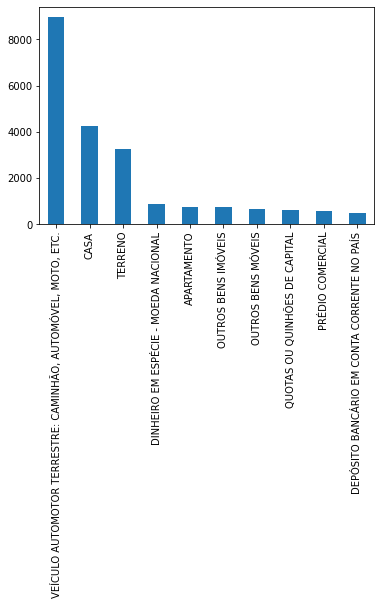

In [ ]:
bem_candidato_2012["DS_TIPO_BEM_CANDIDATO"].value_counts().head(10).plot.bar()

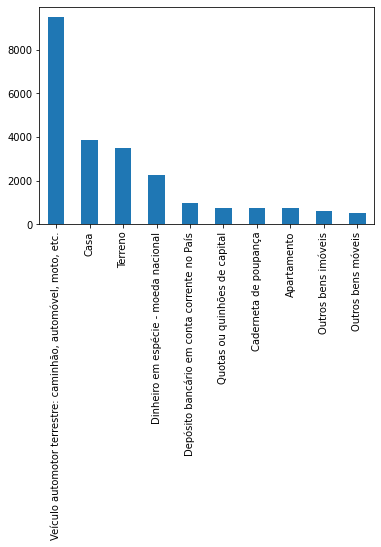

In [ ]:
bem_candidato_2016["DS_TIPO_BEM_CANDIDATO"].value_counts().head(10).plot.bar()

In [ ]:
bem_candidato_2016["DS_TIPO_BEM_CANDIDATO"].value_counts()

Veículo automotor terrestre: caminhão, automóvel, moto, etc.                    9488
Casa                                                                            3847
Terreno                                                                         3485
Dinheiro em espécie - moeda nacional                                            2248
Depósito bancário em conta corrente no País                                      968
Quotas ou quinhões de capital                                                    769
Caderneta de poupança                                                            763
Apartamento                                                                      730
Outros bens imóveis                                                              602
Outros bens móveis                                                               515
Prédio comercial                                                                 464
Outros fundos                                                    

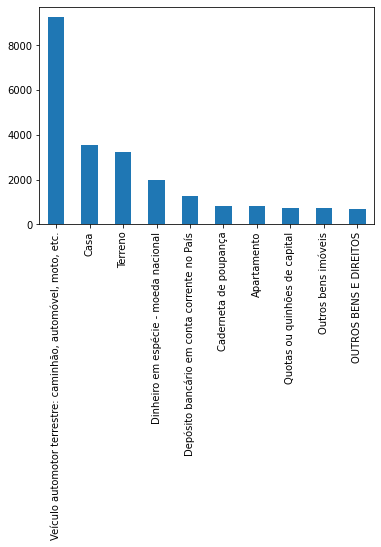

In [ ]:
bem_candidato_2020["DS_TIPO_BEM_CANDIDATO"].value_counts().head(10).plot.bar()

In [ ]:
ues_2020 = bem_candidato_2020["NM_UE"].values
ues_2020

array(['VIÇOSA DO CEARÁ', 'VIÇOSA DO CEARÁ', 'VIÇOSA DO CEARÁ', ...,
       'MARACANAÚ', 'JARDIM', 'CROATÁ'], dtype=object)

In [ ]:
# Dados gerais (incluindo eleito ou não)
consulta_cand_2012 = pd.read_csv("/content/consulta_cand_2012_CE.txt", sep = ';', encoding = 'latin-1', header = None, names = ["DATA_GERACAO", "HORA_GERACAO", "ANO_ELEICAO", "NUM_TURNO", "DESCRICAO_ELEICAO", "SIGLA_UF", "SIGLA_UE", "DESCRICAO_UE", "CODIGO_CARGO", "DESCRICAO_CARGO", "NOME_CANDIDATO", "SQ_CANDIDATO", "NUMERO_CANDIDATO", "CPF_CANDIDATO", "NOME_URNA_CANDIDATO", "COD_SITUACAO_CANDIDATURA", "DES_SITUACAO_CANDIDATURA", "NUMERO_PARTIDO", "SIGLA_PARTIDO", "NOME_PARTIDO", "CODIGO_LEGENDA", "SIGLA_LEGENDA", "COMPOSICAO_LEGENDA", "NOME_LEGENDA", "CODIGO_OCUPACAO", "DESCRICAO_OCUPACAO", "DATA_NASCIMENTO", "NUM_TITULO_ELEITORAL_CANDIDATO", "IDADE_DATA_ELEICAO", "CODIGO_SEXO", "DESCRICAO_SEXO", "COD_GRAU_INSTRUCAO", "DESCRICAO_GRAU_INSTRUCAO", "CODIGO_ESTADO_CIVIL", "DESCRICAO_ESTADO_CIVIL", "CODIGO_NACIONALIDADE", "DESCRICAO_NACIONALIDADE", "SIGLA_UF_NASCIMENTO", "CODIGO_MUNICIPIO_NASCIMENTO", "NOME_MUNICIPIO_NASCIMENTO", "DESPESA_MAX_CAMPANHA", "COD_SIT_TOT_TURNO", "DESC_SIT_TOT_TURNO", "NM_EMAIL"])
consulta_cand_2016 = pd.read_csv('/content/consulta_cand_2016_CE.csv',  error_bad_lines = False,  encoding = 'latin-1', sep = ';')
consulta_cand_2020 = pd.read_csv('/content/consulta_cand_2020_CE.csv',  error_bad_lines = False,  encoding = 'latin-1', sep = ';')

In [ ]:
consulta_cand_2012.head(3)

DATA_GERACAO HORA_GERACAO  ...  DESC_SIT_TOT_TURNO  NM_EMAIL
0   15/07/2016     19:21:53  ...          NÃO ELEITO    #NULO#
1   15/07/2016     19:21:53  ...          NÃO ELEITO    #NULO#
2   15/07/2016     19:21:53  ...          NÃO ELEITO    #NULO#

[3 rows x 44 columns]

In [ ]:
consulta_cand_2016.head(3)

DT_GERACAO HH_GERACAO  ...  DS_SITUACAO_CANDIDATO_URNA  ST_CANDIDATO_INSERIDO_URNA
0  11/09/2020   19:58:59  ...      INDEFERIDO COM RECURSO                         SIM
1  11/09/2020   19:58:59  ...        DEFERIDO COM RECURSO                         SIM
2  11/09/2020   19:58:59  ...                    DEFERIDO                         SIM

[3 rows x 63 columns]

In [ ]:
consulta_cand_2020.head(3)

DT_GERACAO HH_GERACAO  ...  DS_SITUACAO_CANDIDATO_URNA  ST_CANDIDATO_INSERIDO_URNA
0  04/01/2021   11:18:16  ...                    DEFERIDO                         SIM
1  04/01/2021   11:18:16  ...                    DEFERIDO                         SIM
2  04/01/2021   11:18:16  ...                    DEFERIDO                         SIM

[3 rows x 63 columns]

In [ ]:
# Definir situação dos candidatos nos datasets de bens

#2012
sq_candidato_2012 = bem_candidato_2012["SQ_CANDIDATO"]
sq_candidato_2012 = pd.array(sq_candidato_2012)

new_column = []
for i in sq_candidato_2012:
  if (consulta_cand_2012["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2012.loc[consulta_cand_2012.SQ_CANDIDATO == i, 'DESC_SIT_TOT_TURNO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2012['SIT_CANDIDATO'] = new_column

#2016
sq_candidato_2016 = bem_candidato_2016["SQ_CANDIDATO"]
sq_candidato_2016 = pd.array(sq_candidato_2016)

new_column = []
for i in sq_candidato_2016:
  if (consulta_cand_2016["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2016.loc[consulta_cand_2016.SQ_CANDIDATO == i, 'DS_SIT_TOT_TURNO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2016['SIT_CANDIDATO'] = new_column

# 2020
sq_candidato_2020 = bem_candidato_2020["SQ_CANDIDATO"]
sq_candidato_2020 = pd.array(sq_candidato_2020)

new_column = []
for i in sq_candidato_2020:
  if (consulta_cand_2020["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2020.loc[consulta_cand_2020.SQ_CANDIDATO == i, 'DS_SIT_TOT_TURNO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2020['SIT_CANDIDATO'] = new_column

In [ ]:
# Definir sexo dos candidatos nos datasets de bens

#2012
sq_candidato_2012 = bem_candidato_2012["SQ_CANDIDATO"]
sq_candidato_2012 = pd.array(sq_candidato_2012)

new_column = []
for i in sq_candidato_2012:
  if (consulta_cand_2012["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2012.loc[consulta_cand_2012.SQ_CANDIDATO == i, 'DESCRICAO_SEXO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2012['DESCRICAO_SEXO'] = new_column

#2016
sq_candidato_2016 = bem_candidato_2016["SQ_CANDIDATO"]
sq_candidato_2016 = pd.array(sq_candidato_2016)

new_column = []
for i in sq_candidato_2016:
  if (consulta_cand_2016["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2016.loc[consulta_cand_2016.SQ_CANDIDATO == i, 'DS_GENERO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2016['DESCRICAO_SEXO'] = new_column

# 2020
sq_candidato_2020 = bem_candidato_2020["SQ_CANDIDATO"]
sq_candidato_2020 = pd.array(sq_candidato_2020)

new_column = []
for i in sq_candidato_2020:
  if (consulta_cand_2020["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2020.loc[consulta_cand_2020.SQ_CANDIDATO == i, 'DS_GENERO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2020['DESCRICAO_SEXO'] = new_column

In [ ]:
# Definir sigla do partido dos candidatos nos datasets de bens

#2012
sq_candidato_2012 = bem_candidato_2012["SQ_CANDIDATO"]
sq_candidato_2012 = pd.array(sq_candidato_2012)

new_column = []
for i in sq_candidato_2012:
  if (consulta_cand_2012["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2012.loc[consulta_cand_2012.SQ_CANDIDATO == i, 'SIGLA_PARTIDO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2012['SIGLA_PARTIDO'] = new_column

#2016
sq_candidato_2016 = bem_candidato_2016["SQ_CANDIDATO"]
sq_candidato_2016 = pd.array(sq_candidato_2016)

new_column = []
for i in sq_candidato_2016:
  if (consulta_cand_2016["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2016.loc[consulta_cand_2016.SQ_CANDIDATO == i, 'SG_PARTIDO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2016['SIGLA_PARTIDO'] = new_column

# 2020
sq_candidato_2020 = bem_candidato_2020["SQ_CANDIDATO"]
sq_candidato_2020 = pd.array(sq_candidato_2020)

new_column = []
for i in sq_candidato_2020:
  if (consulta_cand_2020["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2020.loc[consulta_cand_2020.SQ_CANDIDATO == i, 'SG_PARTIDO'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2020['SIGLA_PARTIDO'] = new_column

In [ ]:
# Definir cidade dos candidatos nos datasets de bens
#2012
new_column = []
for i in sq_candidato_2012:
  if (consulta_cand_2012["SQ_CANDIDATO"] == i).any():
    new_column.append(consulta_cand_2012.loc[consulta_cand_2012.SQ_CANDIDATO == i, 'DESCRICAO_UE'].values)

new_column = pd.DataFrame(new_column)
new_column = new_column.iloc[:, :-1]
bem_candidato_2012['NM_UE'] = new_column

In [ ]:
# Capital e interior
#2012
bem_candidato_capital_2012 = bem_candidato_2012.loc[bem_candidato_2012['NM_UE'] == 'FORTALEZA']
bem_candidato_interior_2012 = bem_candidato_2012.loc[bem_candidato_2012['NM_UE'] != 'FORTALEZA']
#2016
bem_candidato_capital_2016 = bem_candidato_2016.loc[bem_candidato_2016['NM_UE'] == 'FORTALEZA']
bem_candidato_interior_2016 = bem_candidato_2016.loc[bem_candidato_2016['NM_UE'] != 'FORTALEZA']
#2020
bem_candidato_capital_2020 = bem_candidato_2020.loc[bem_candidato_2020['NM_UE'] == 'FORTALEZA']
bem_candidato_interior_2020 = bem_candidato_2020.loc[bem_candidato_2020['NM_UE'] != 'FORTALEZA']

In [ ]:
# Criar vetores de valores para cálculos
array1_2012 = bem_candidato_capital_2012['VALOR_BEM'].values
array2_2012 = bem_candidato_interior_2012['VALOR_BEM'].values

array1_2016 = bem_candidato_capital_2016['VR_BEM_CANDIDATO'].values
array2_2016 = bem_candidato_interior_2016['VR_BEM_CANDIDATO'].values

array1_2020 = bem_candidato_capital_2020['VR_BEM_CANDIDATO'].values
array2_2020 = bem_candidato_interior_2020['VR_BEM_CANDIDATO'].values

In [ ]:
print(array1_2012.mean())
print(array2_2012.mean())

76445.5891704148
52936.10537367863


In [ ]:
# Selecionando bens dos candidatos eleitos do interior
bem_candidato_interior_eleito_2012 = bem_candidato_interior_2012.loc[(bem_candidato_interior_2012['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_interior_2012['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_interior_2012['SIT_CANDIDATO'] == 'ELEITO')]
bem_candidato_interior_eleito_2016 = bem_candidato_interior_2016.loc[(bem_candidato_interior_2016['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_interior_2016['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_interior_2016['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_interior_2016['SIT_CANDIDATO'] == '2º TURNO')]
bem_candidato_interior_eleito_2020 = bem_candidato_interior_2020.loc[(bem_candidato_interior_2020['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_interior_2020['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_interior_2020['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_interior_2020['SIT_CANDIDATO'] == '2º TURNO')]

# Selecionando bens dos candidatos diferente de eleitos do interior
bem_candidato_interior_neleito_2012 = bem_candidato_interior_2012.loc[(bem_candidato_interior_2012['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_interior_2012['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_interior_2012['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_interior_neleito_2016 = bem_candidato_interior_2016.loc[(bem_candidato_interior_2016['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_interior_2016['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_interior_2016['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_interior_neleito_2020 = bem_candidato_interior_2020.loc[(bem_candidato_interior_2020['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_interior_2020['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_interior_2020['SIT_CANDIDATO'] == '#NULO#')]

# Selecionando bens dos candidatos eleitos da capital
bem_candidato_capital_eleito_2012 = bem_candidato_capital_2012.loc[(bem_candidato_capital_2012['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_capital_2012['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_capital_2012['SIT_CANDIDATO'] == 'ELEITO')]
bem_candidato_capital_eleito_2016 = bem_candidato_capital_2016.loc[(bem_candidato_capital_2016['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_capital_2016['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_capital_2016['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_capital_2016['SIT_CANDIDATO'] == '2º TURNO')]
bem_candidato_capital_eleito_2020 = bem_candidato_capital_2020.loc[(bem_candidato_capital_2020['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_capital_2020['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_capital_2020['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_capital_2020['SIT_CANDIDATO'] == '2º TURNO')]

# Selecionando bens dos candidatos diferente de eleitos da capital
bem_candidato_capital_neleito_2012 = bem_candidato_capital_2012.loc[(bem_candidato_capital_2012['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_capital_2012['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_capital_2012['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_capital_neleito_2016 = bem_candidato_capital_2016.loc[(bem_candidato_capital_2016['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_capital_2016['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_capital_2016['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_capital_neleito_2020 = bem_candidato_capital_2020.loc[(bem_candidato_capital_2020['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_capital_2020['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_capital_2020['SIT_CANDIDATO'] == '#NULO#')]

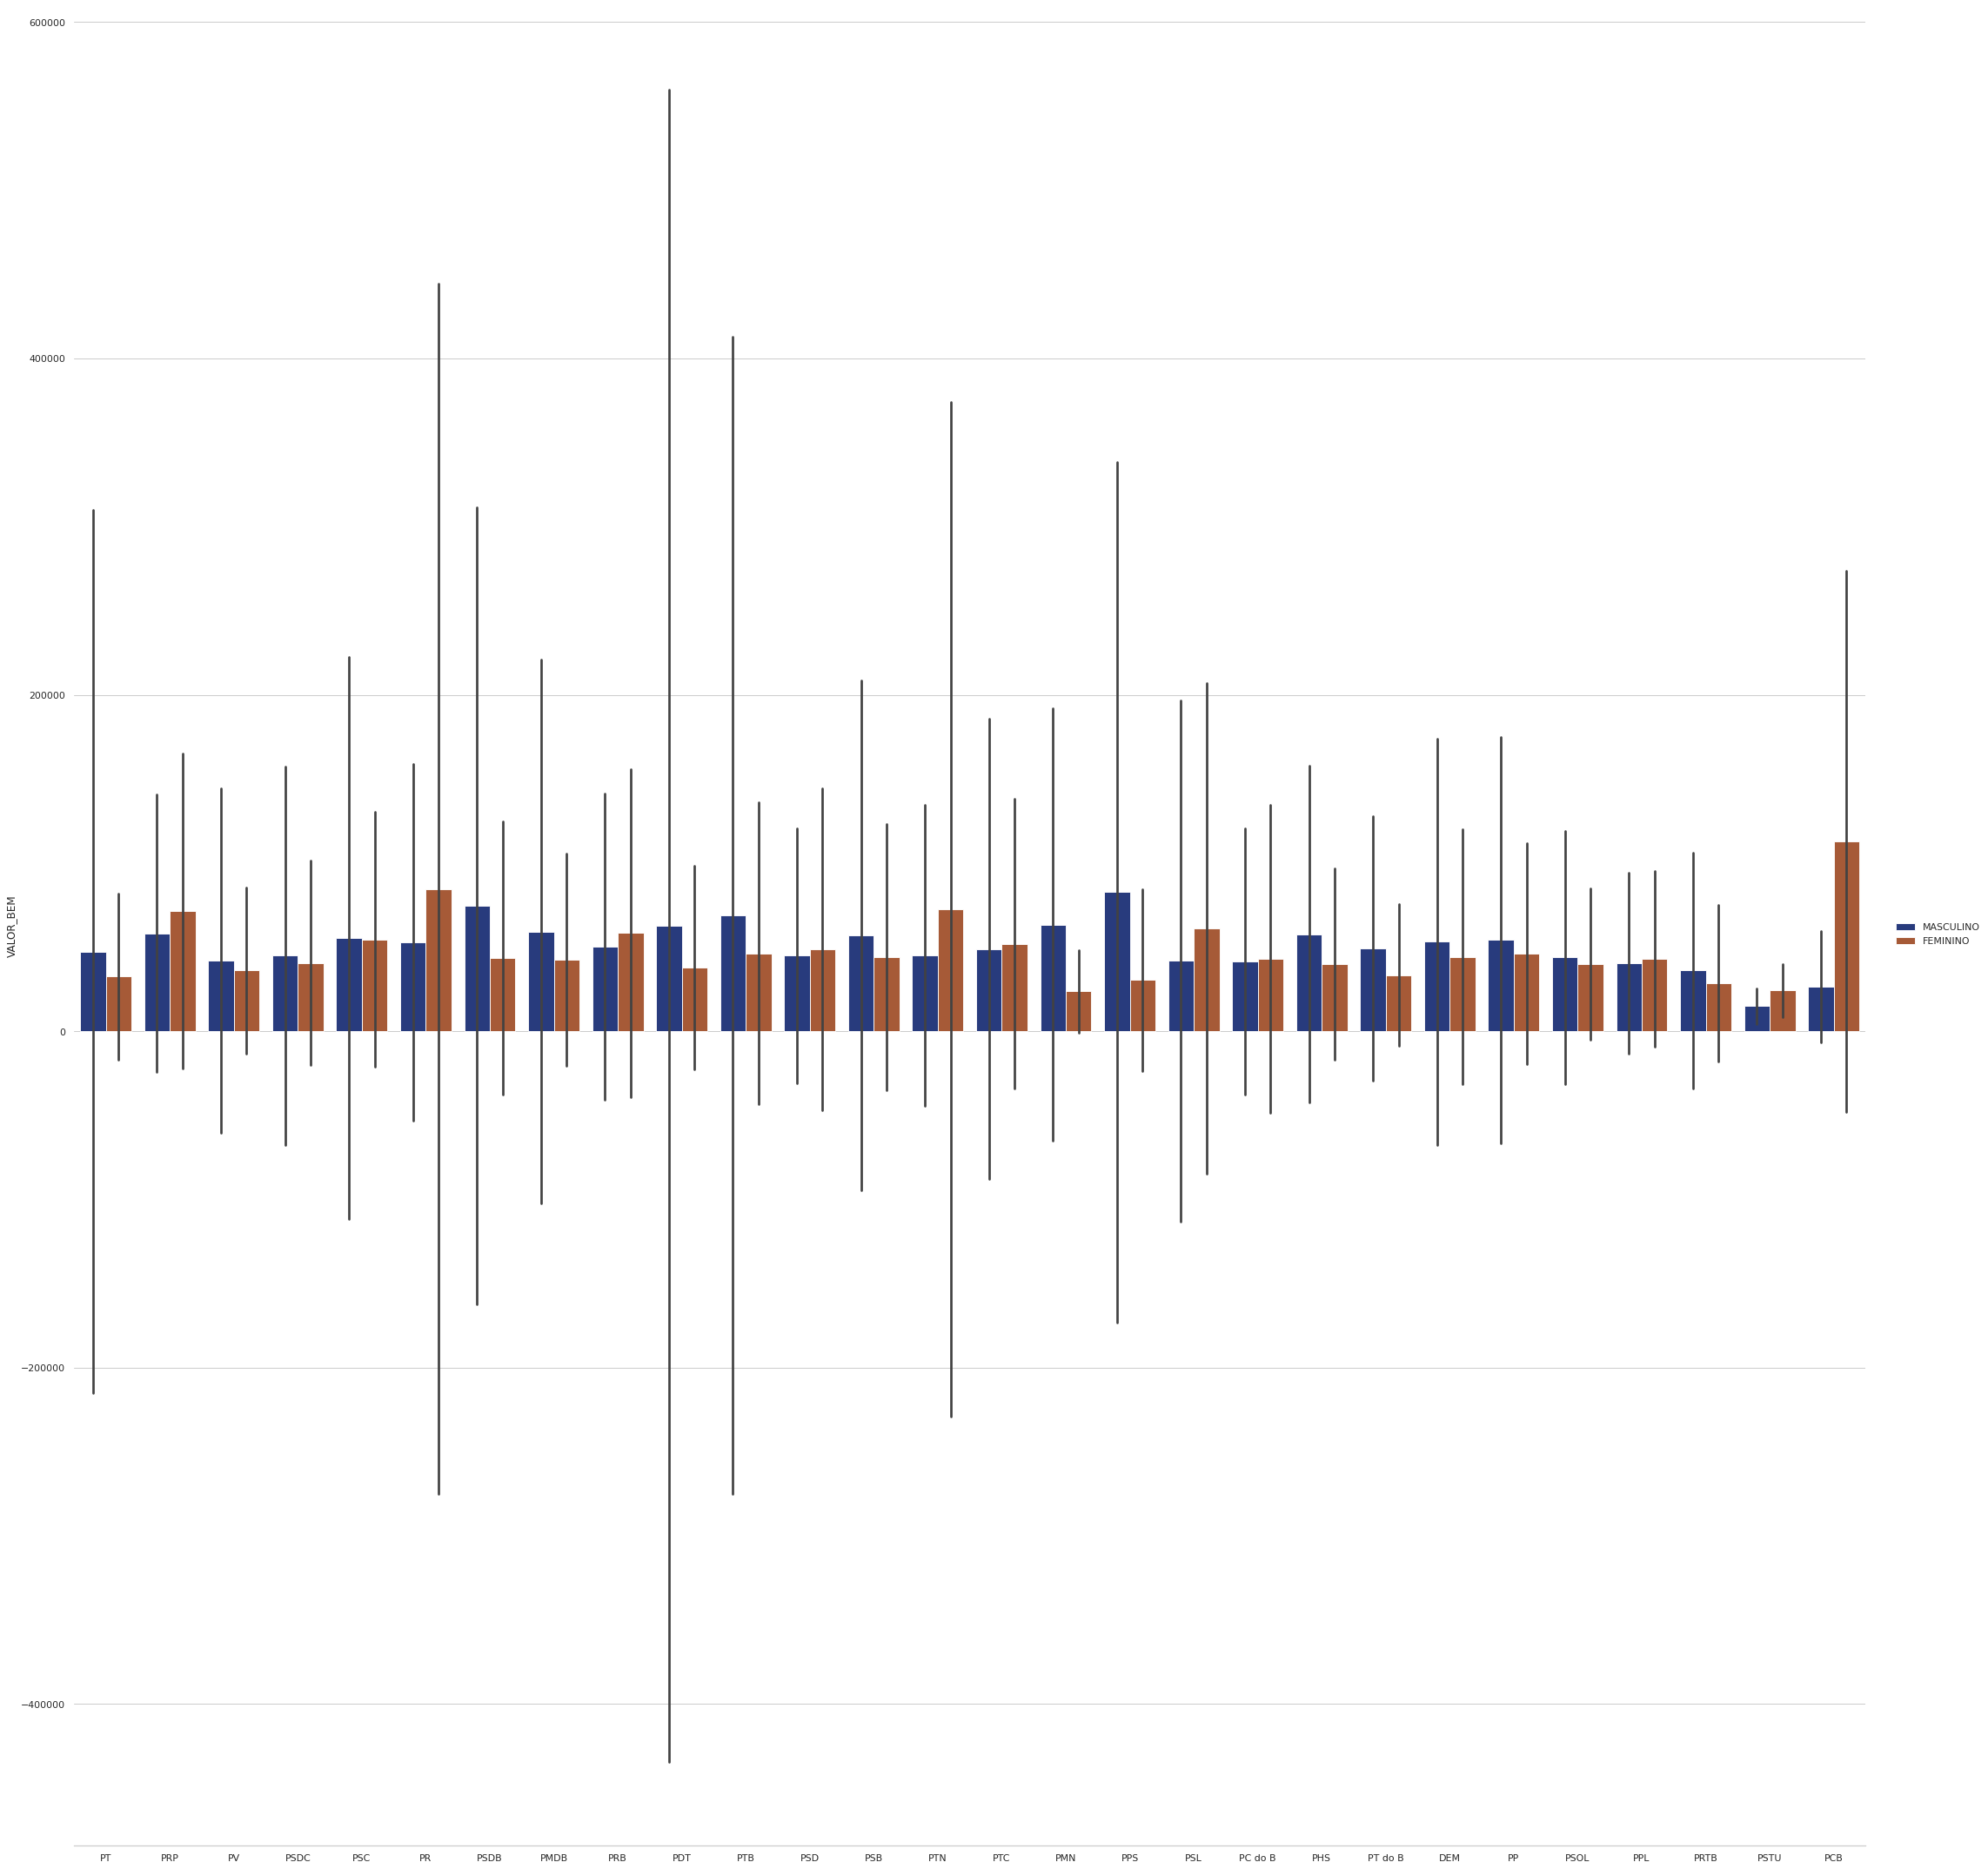

In [ ]:
g = sns.catplot(
    data=bem_candidato_interior_2012, kind="bar",
    x="SIGLA_PARTIDO", y="VALOR_BEM", hue="DESCRICAO_SEXO",
    ci="sd", palette="dark", alpha=.9, height=30
)
g.despine(left=True)
g.set_axis_labels("", "VALOR_BEM")
g.legend.set_title("")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

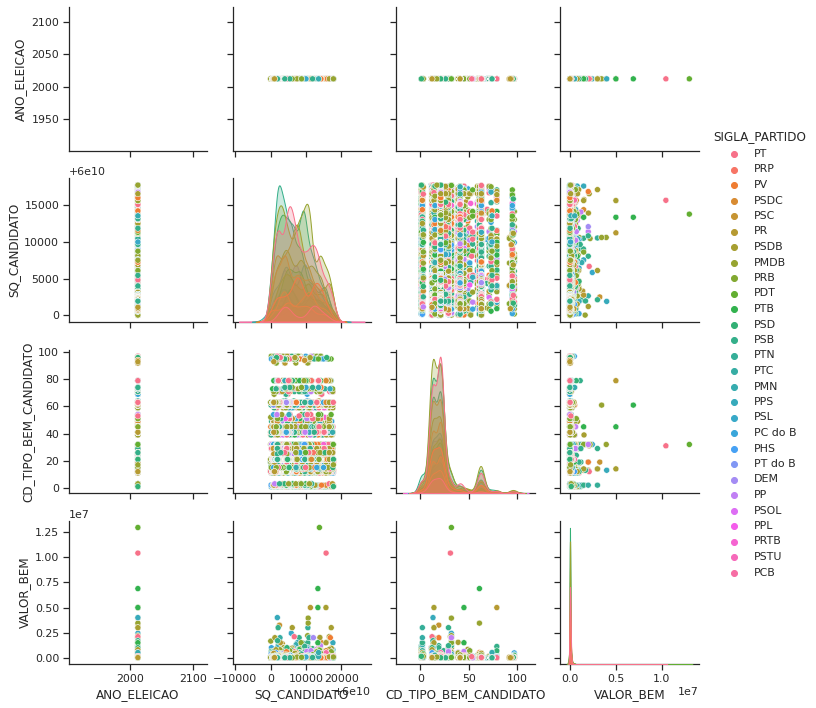

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(bem_candidato_interior_2012, hue="SIGLA_PARTIDO")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

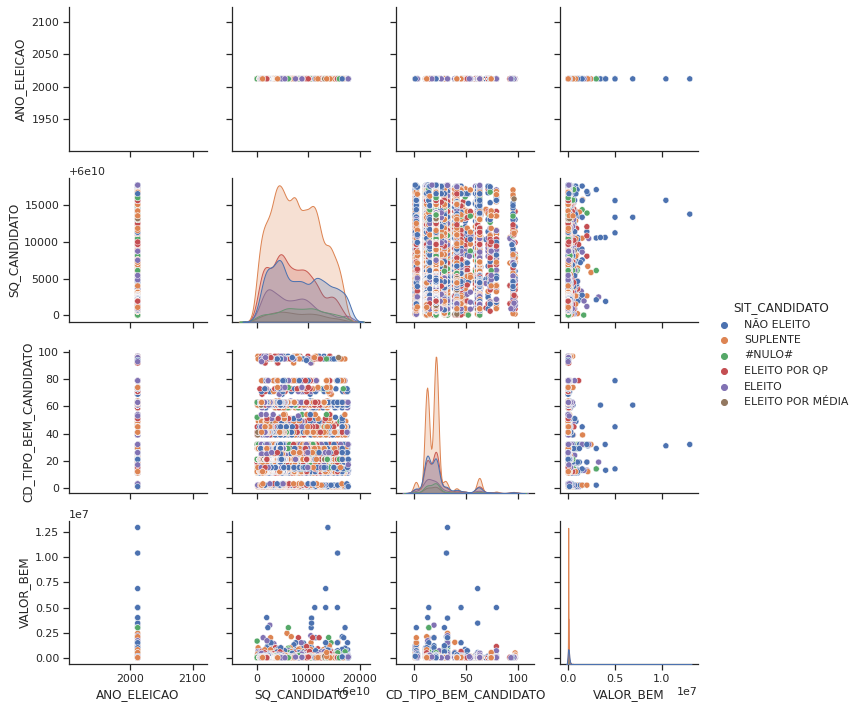

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(bem_candidato_interior_2012, hue="SIT_CANDIDATO")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


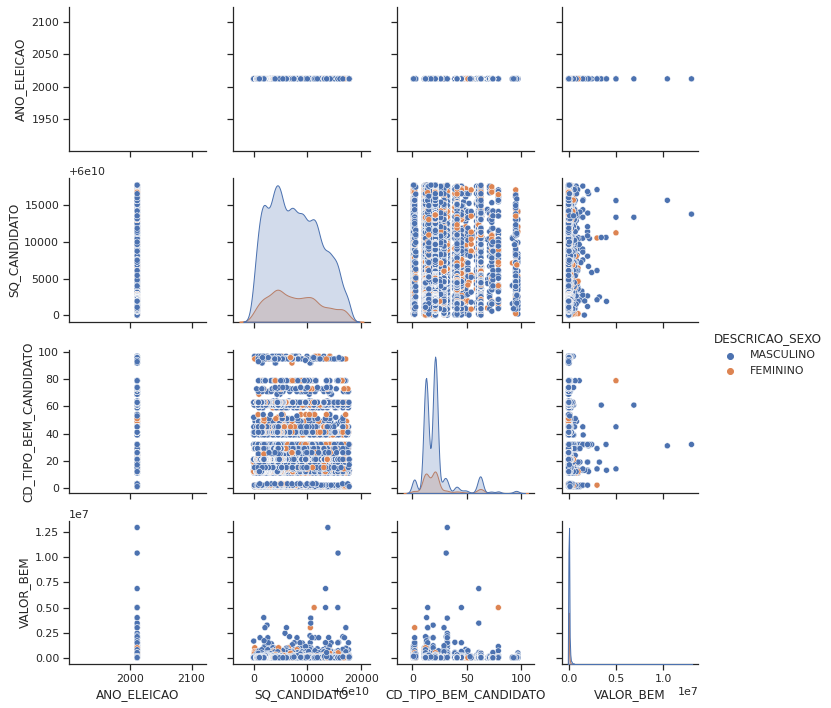

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(bem_candidato_interior_2012, hue="DESCRICAO_SEXO")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

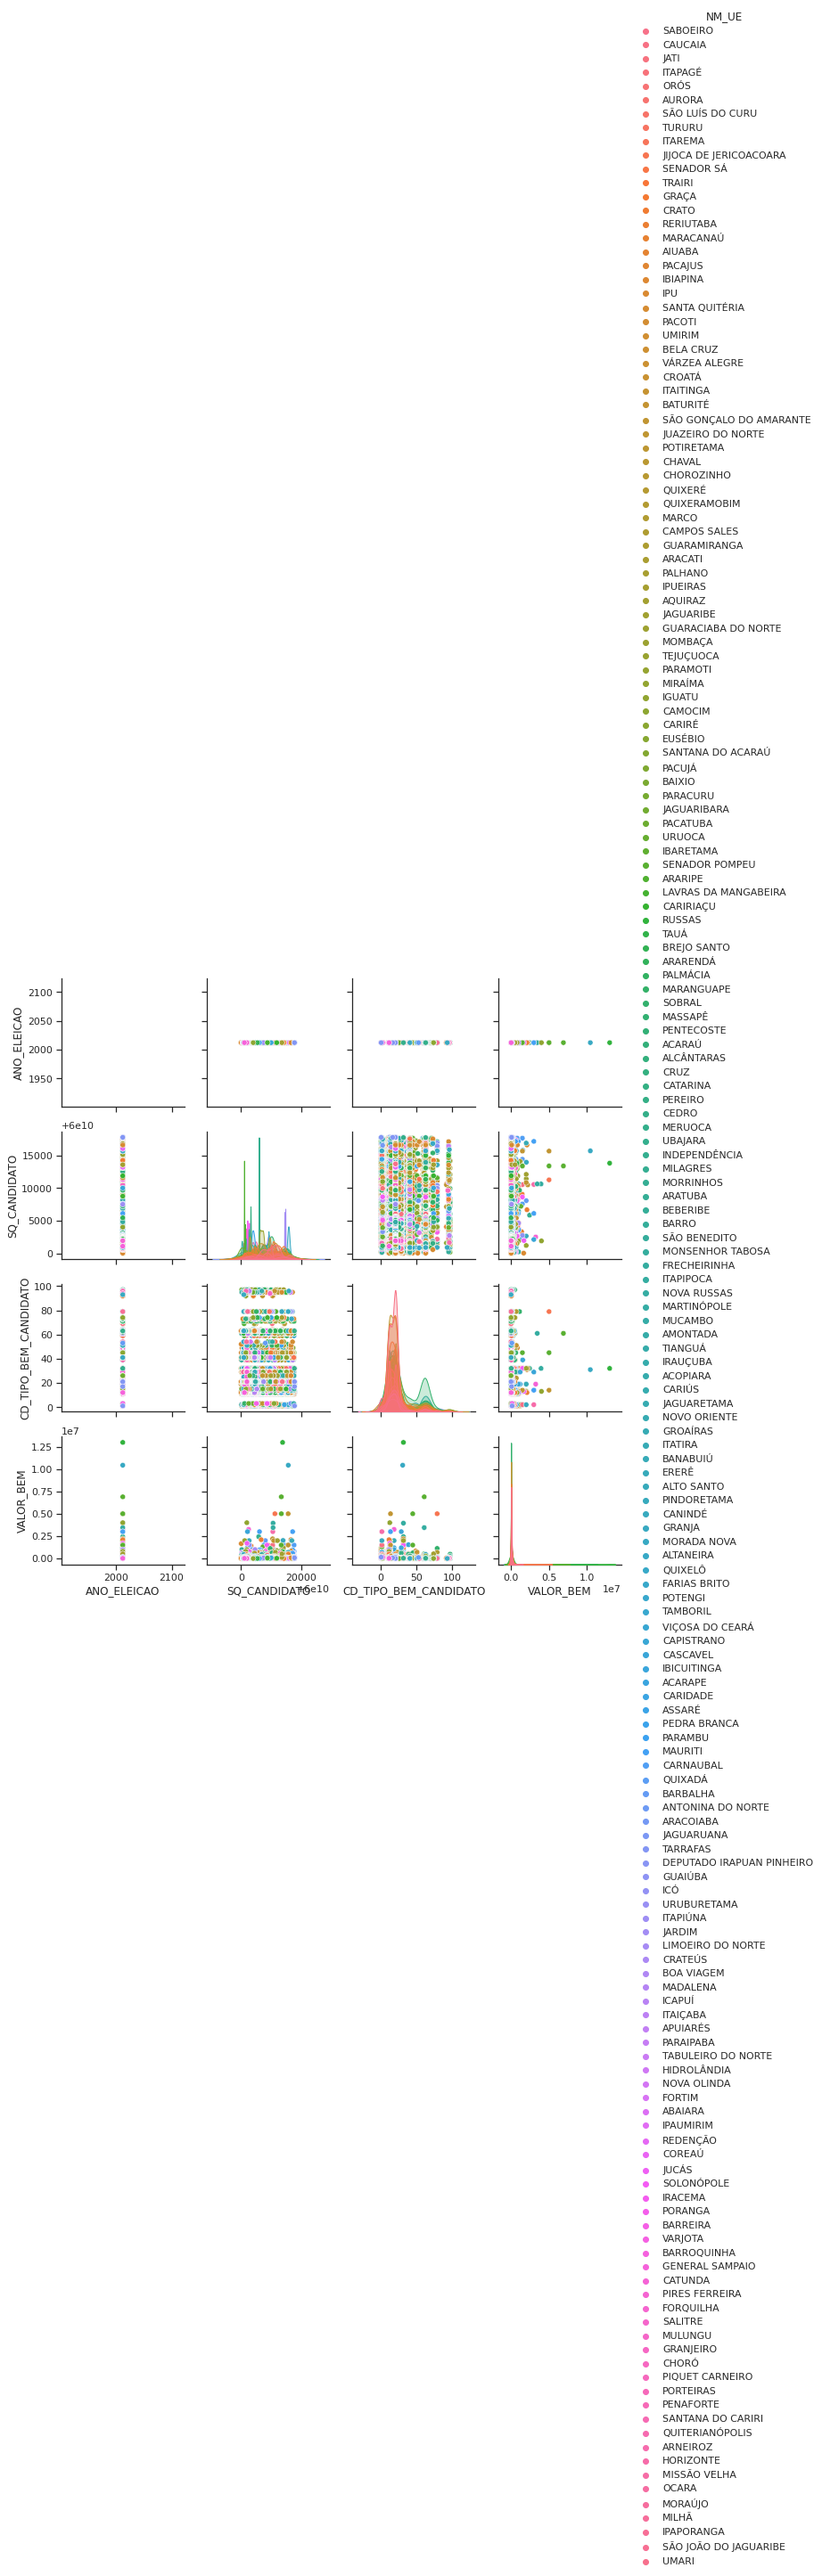

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(bem_candidato_interior_2012, hue="NM_UE")

## Mostrando gráficos de pizza dos candidatos no interior e capital, eleitos e não eleitos (12, 16, 20)

In [ ]:
# Bens dos candidatos eleitos no interior
print(bem_candidato_interior_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_interior_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcie2012 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_interior_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_interior_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcie2016 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_interior_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_interior_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcie2020 = pd.DataFrame(np.array([v]), columns = i)

VEÍCULO AUTOMOTOR TERRESTRE: CAMINHÃO, AUTOMÓVEL, MOTO, ETC.    2397
CASA                                                            1088
TERRENO                                                         1076
DINHEIRO EM ESPÉCIE - MOEDA NACIONAL                             303
OUTROS BENS IMÓVEIS                                              207
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    2552
Terreno                                                         1252
Casa                                                            1005
Dinheiro em espécie - moeda nacional                             607
Depósito bancário em conta corrente no País                      316
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    2249
Terreno                                                         1029
Casa                                                             854
Dinheiro em espécie

Text(0.5, 1.0, 'Bens dos candidatos eleitos no interior 2012')

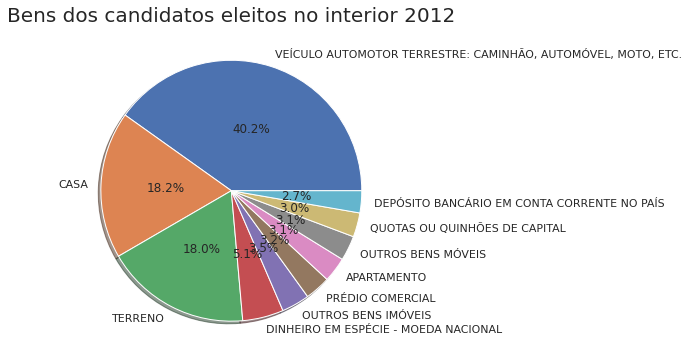

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcie2012.columns.values
plt.pie(x = bcie2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos no interior 2012", fontsize=20)

Text(0.5, 1.0, 'Bens dos candidatos eleitos no interior 2016')

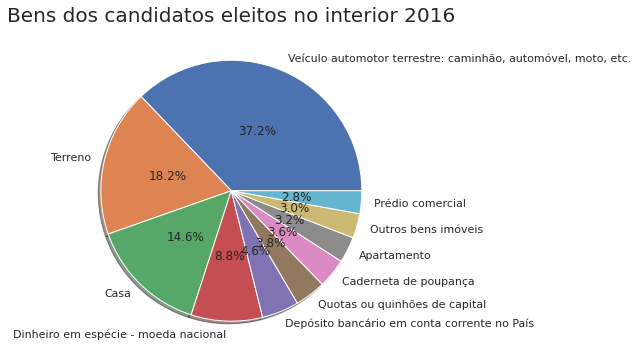

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcie2016.columns.values
plt.pie(x = bcie2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos no interior 2016", fontsize=20)

Text(0.5, 1.0, 'Bens dos candidatos eleitos no interior 2020')

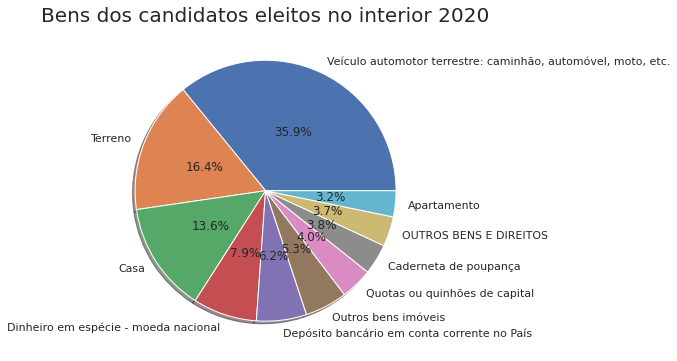

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcie2020.columns.values
plt.pie(x = bcie2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos no interior 2020", fontsize=20)

In [ ]:
# Bens dos candidatos diferente de eleitos no interior
print(bem_candidato_interior_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_interior_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcine2012 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_interior_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_interior_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcine2016 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_interior_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_interior_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcine2020 = pd.DataFrame(np.array([v]), columns = i)

VEÍCULO AUTOMOTOR TERRESTRE: CAMINHÃO, AUTOMÓVEL, MOTO, ETC.    4112
CASA                                                            1907
TERRENO                                                         1904
DINHEIRO EM ESPÉCIE - MOEDA NACIONAL                             475
APARTAMENTO                                                      415
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    4137
Terreno                                                         2107
Casa                                                            1765
Dinheiro em espécie - moeda nacional                             987
Depósito bancário em conta corrente no País                      586
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    4413
Terreno                                                         1998
Casa                                                            1823
Dinheiro em espécie

Text(0.5, 1.0, 'Bens dos candidatos diferente de eleitos no interior 2012')

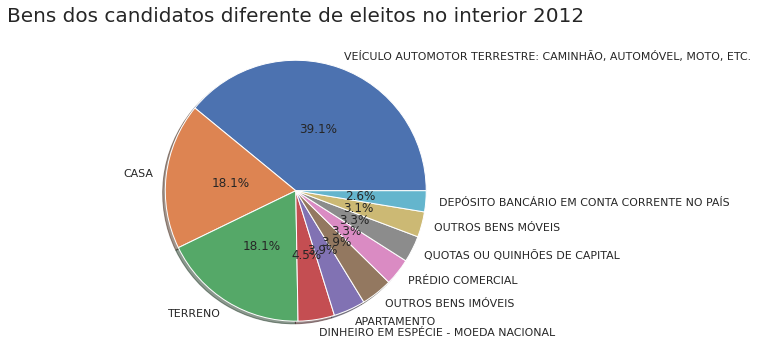

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcine2012.columns.values
plt.pie(x = bcine2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos diferente de eleitos no interior 2012", fontsize=20)

Text(0.5, 1.0, 'Bens dos candidatos diferente de eleitos no interior 2016')

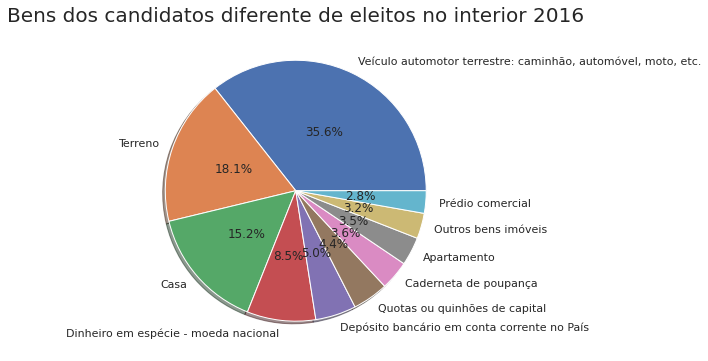

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcine2016.columns.values
plt.pie(x = bcine2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos diferente de eleitos no interior 2016", fontsize=20)

Text(0.5, 1.0, 'Bens dos candidatos diferente de eleitos no interior 2020')

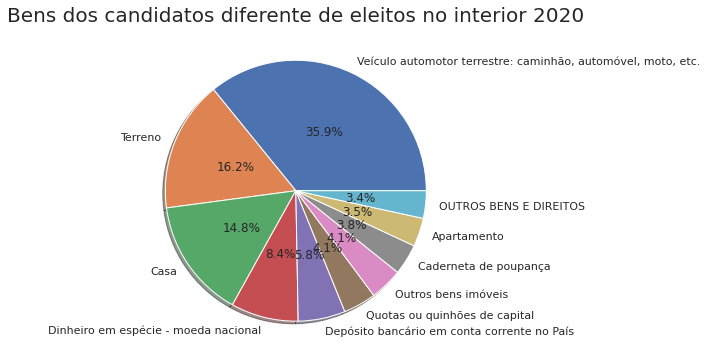

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcine2020.columns.values
plt.pie(x = bcine2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos diferente de eleitos no interior 2020", fontsize=20)

In [ ]:
# Bens dos candidatos eleitos na capital
print(bem_candidato_capital_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_capital_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcce2012 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_capital_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_capital_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcce2016 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_capital_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_capital_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcce2020 = pd.DataFrame(np.array([v]), columns = i)

VEÍCULO AUTOMOTOR TERRESTRE: CAMINHÃO, AUTOMÓVEL, MOTO, ETC.    66
CASA                                                            26
APARTAMENTO                                                     19
DEPÓSITO BANCÁRIO EM CONTA CORRENTE NO PAÍS                     18
AÇÕES (INCLUSIVE AS PROVENIENTES DE LINHA TELEFÔNICA)           17
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    53
Apartamento                                                     24
Aplicação de renda fixa (CDB, RDB e outros)                     24
Casa                                                            21
Terreno                                                         21
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    33
Apartamento                                                     30
Depósito bancário em conta corrente no País                     27
Casa                                         

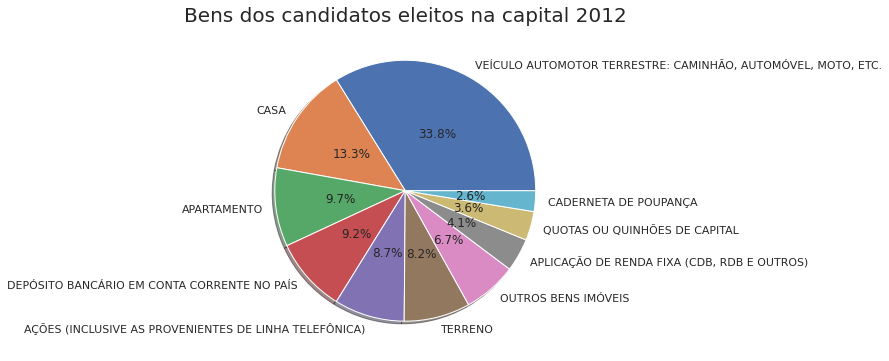

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcce2012.columns.values
plt.pie(x = bcce2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos na capital 2012", fontsize=20)

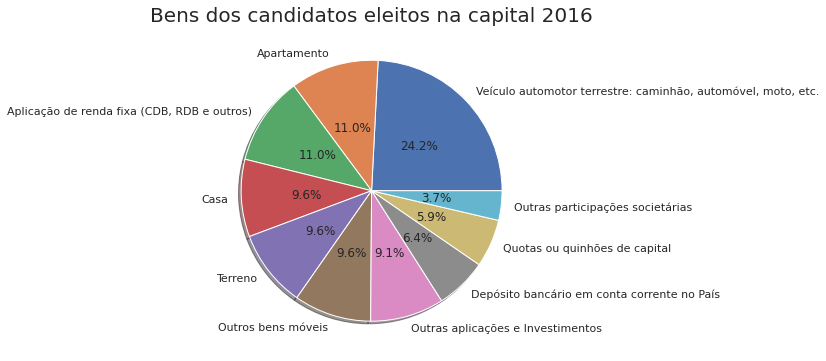

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcce2016.columns.values
plt.pie(x = bcce2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos na capital 2016", fontsize=20)

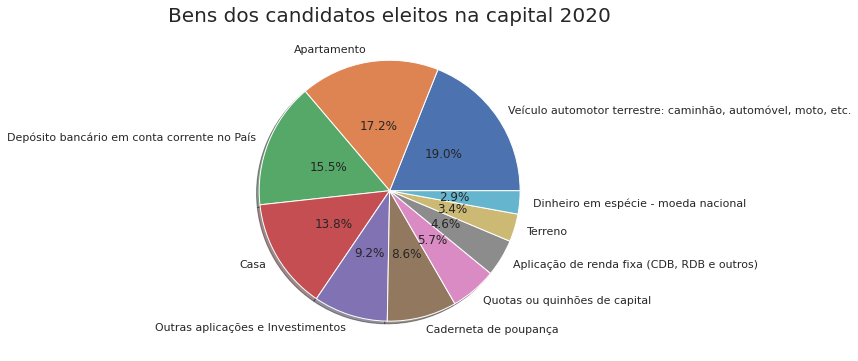

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bcce2020.columns.values
plt.pie(x = bcce2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos na capital 2020", fontsize=20)

In [ ]:
# Bens dos candidatos diferente de eleitos na capital
print(bem_candidato_capital_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_capital_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccne2012 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_capital_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_capital_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccne2016 = pd.DataFrame(np.array([v]), columns = i)

print(bem_candidato_capital_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
v = bem_candidato_capital_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccne2020 = pd.DataFrame(np.array([v]), columns = i)

VEÍCULO AUTOMOTOR TERRESTRE: CAMINHÃO, AUTOMÓVEL, MOTO, ETC.    233
CASA                                                             81
APARTAMENTO                                                      65
TERRENO                                                          59
DEPÓSITO BANCÁRIO EM CONTA CORRENTE NO PAÍS                      55
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    149
Casa                                                             67
Apartamento                                                      53
Terreno                                                          49
Aplicação de renda fixa (CDB, RDB e outros)                      33
Name: DS_TIPO_BEM_CANDIDATO, dtype: int64
Veículo automotor terrestre: caminhão, automóvel, moto, etc.    283
Apartamento                                                     113
Casa                                                            108
Depósito bancário em conta corre

Text(0.5, 1.0, 'Bens dos candidatos diferente de eleitos na capital 2012')

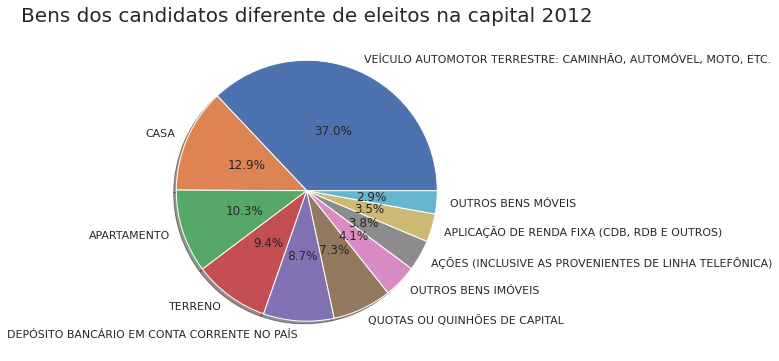

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bccne2012.columns.values
plt.pie(x = bccne2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos diferente de eleitos na capital 2012", fontsize=20)

Text(0.5, 1.0, 'Bens dos candidatos diferente de eleitos na capital 2016')

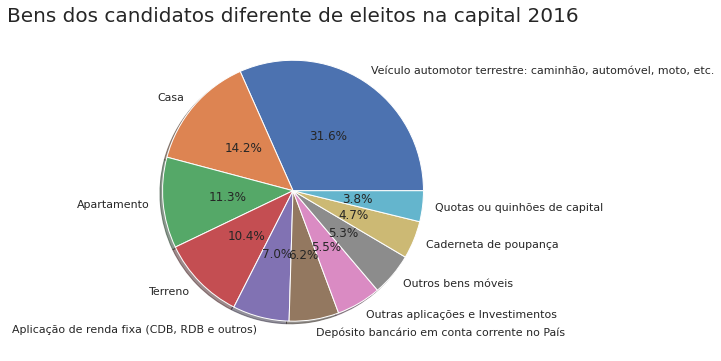

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bccne2016.columns.values
plt.pie(x = bccne2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos diferente de eleitos na capital 2016", fontsize=20)

Text(0.5, 1.0, 'Bens dos candidatos diferente de eleitos na capital 2020')

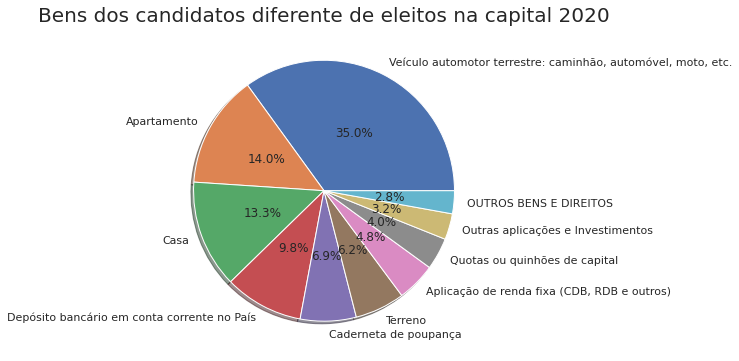

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = bccne2020.columns.values
plt.pie(x = bccne2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos diferente de eleitos na capital 2020", fontsize=20)

## Mostrando gráficos de barras dos candidatos no INTERIOR, eleitos e não eleitos (12, 16, 20)

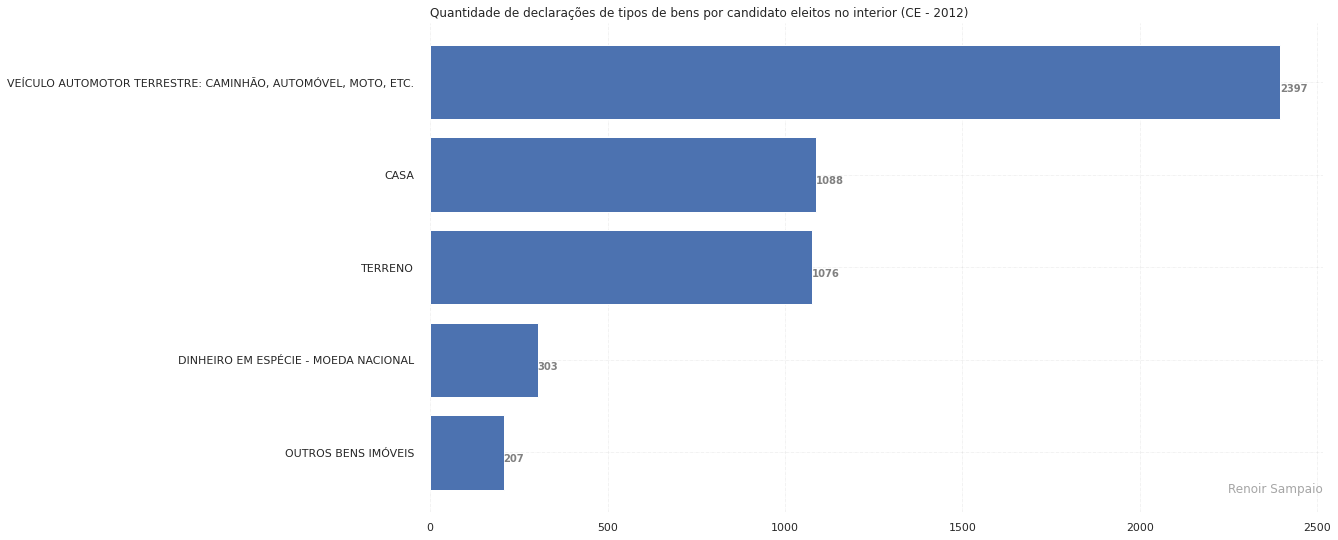

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))

# Horizontal Bar Plot
ax.barh(bem, qtd)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Quantidade de declarações de tipos de bens por candidato eleitos no interior (CE - 2012)',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()

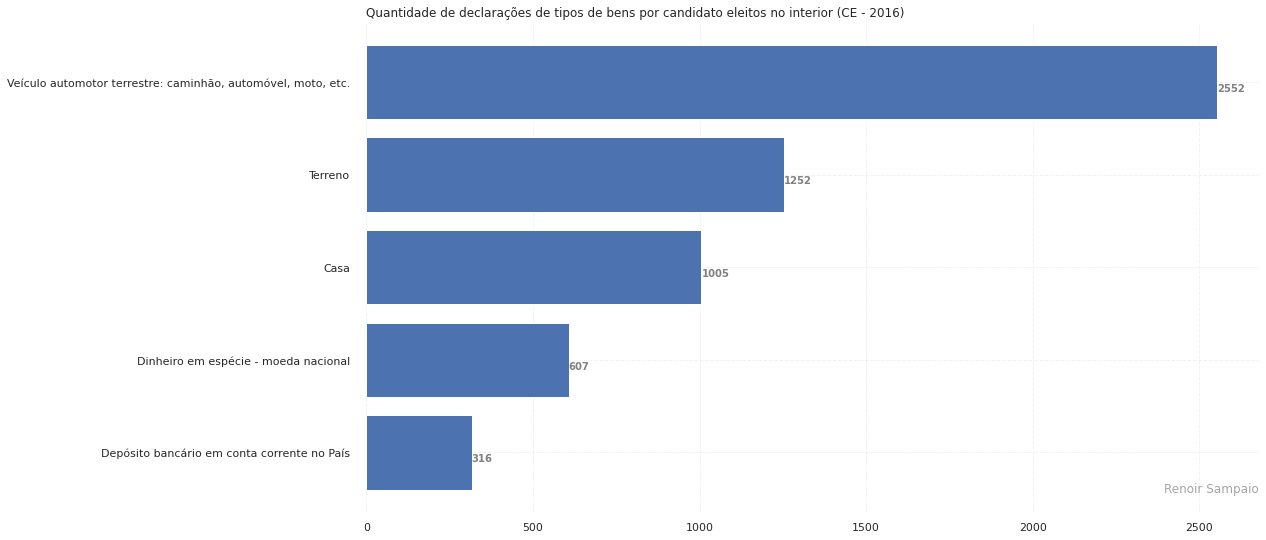

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))

# Horizontal Bar Plot
ax.barh(bem, qtd)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Quantidade de declarações de tipos de bens por candidato eleitos no interior (CE - 2016)',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()

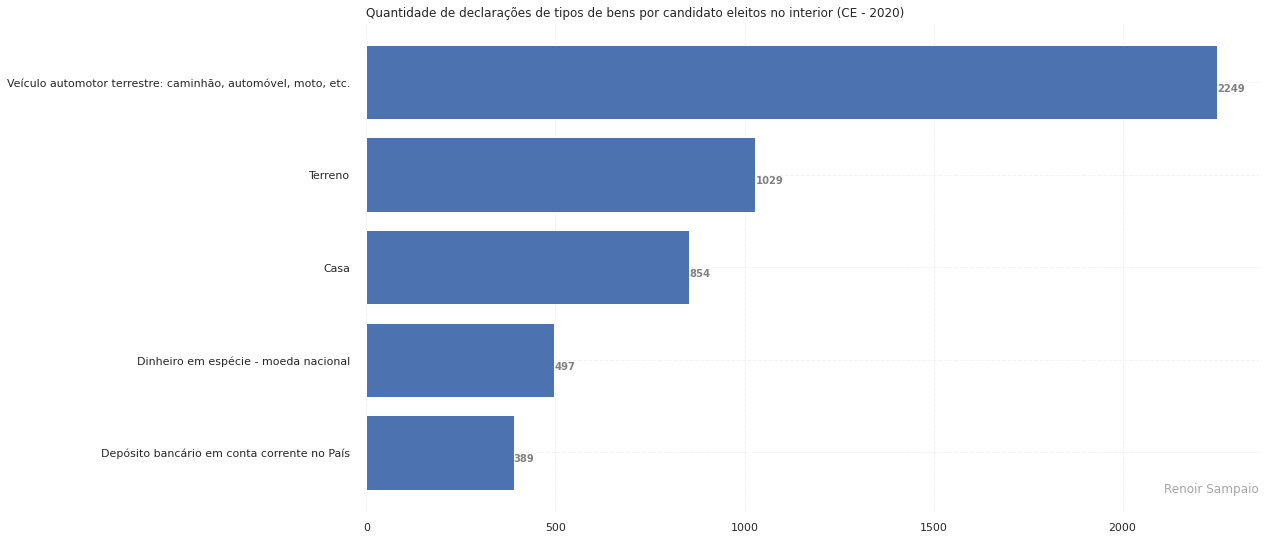

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))

# Horizontal Bar Plot
ax.barh(bem, qtd)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Quantidade de declarações de tipos de bens por candidato eleitos no interior (CE - 2020)',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()

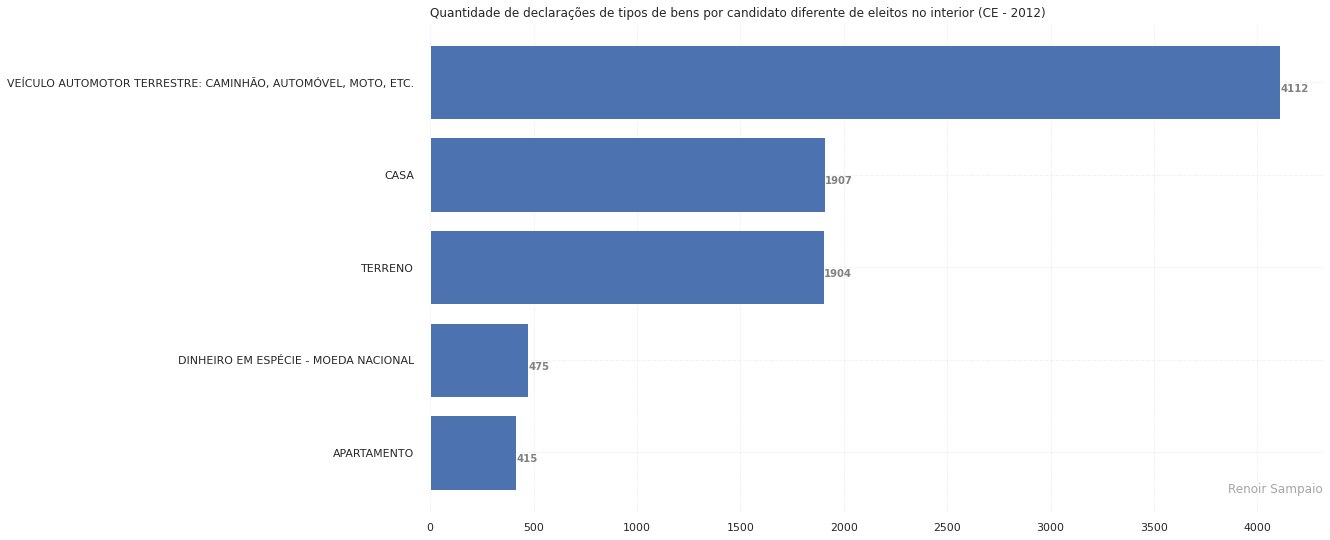

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))

# Horizontal Bar Plot
ax.barh(bem, qtd)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Quantidade de declarações de tipos de bens por candidato diferente de eleitos no interior (CE - 2012)',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()

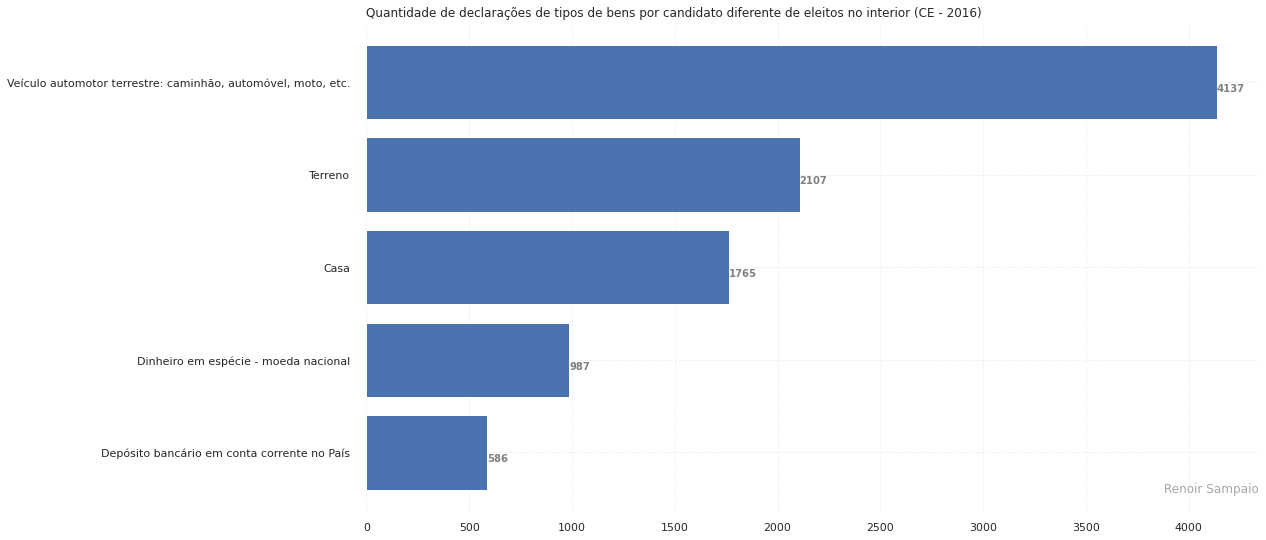

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))

# Horizontal Bar Plot
ax.barh(bem, qtd)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Quantidade de declarações de tipos de bens por candidato diferente de eleitos no interior (CE - 2016)',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()

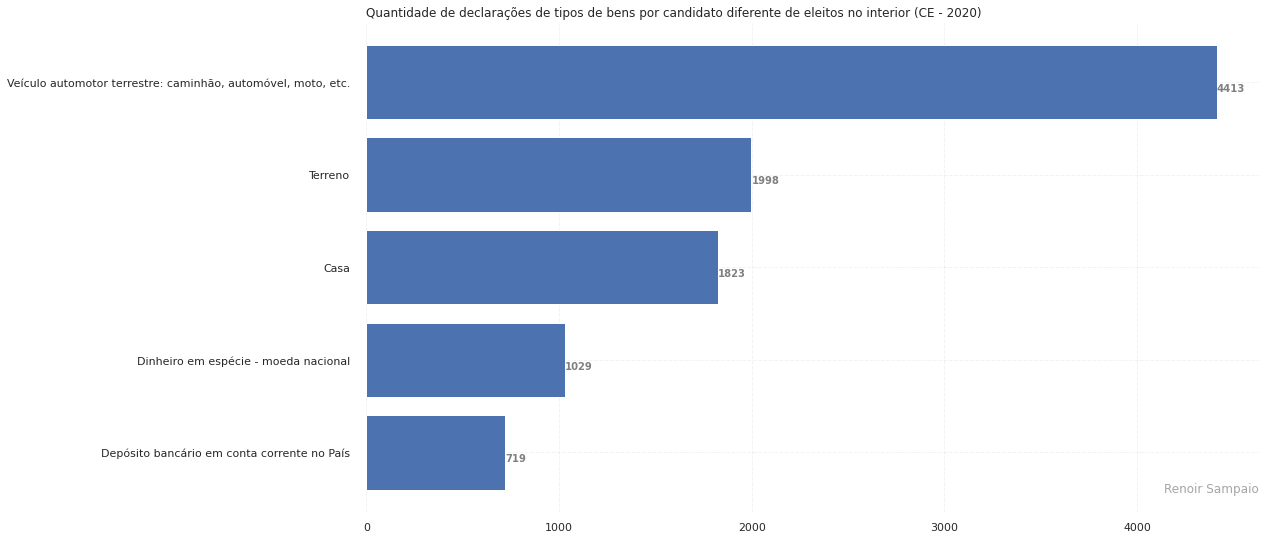

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))

# Horizontal Bar Plot
ax.barh(bem, qtd)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Quantidade de declarações de tipos de bens por candidato diferente de eleitos no interior (CE - 2020)',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()


## Mostrando gráficos de barras dos candidatos na CAPITAL, eleitos e não eleitos (12, 16, 20)

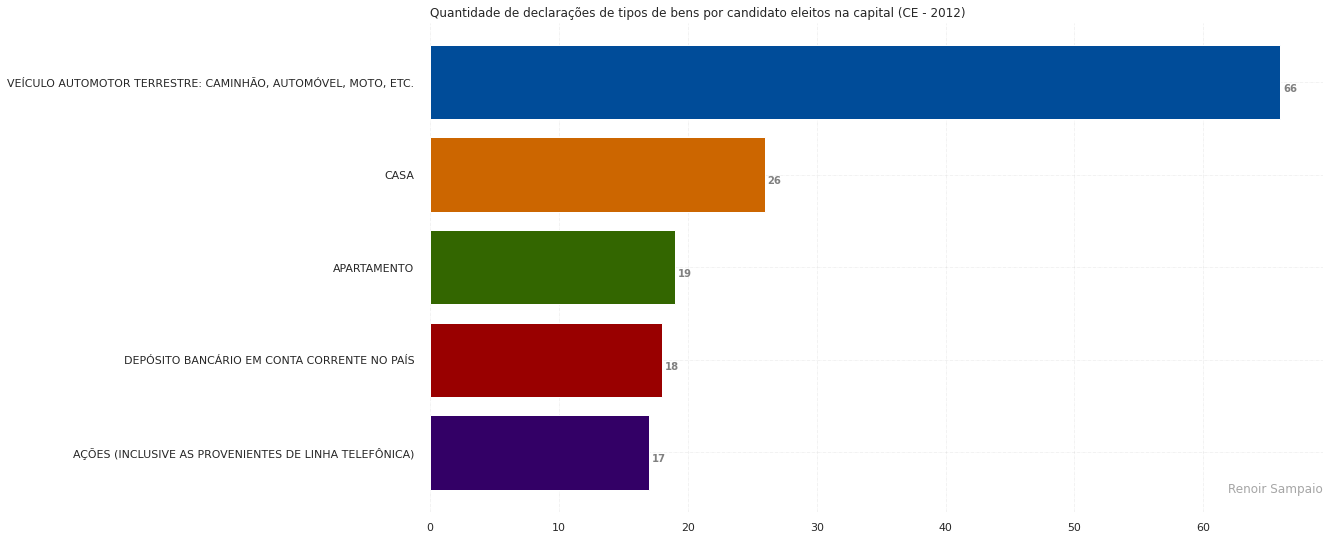

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato eleitos na capital (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

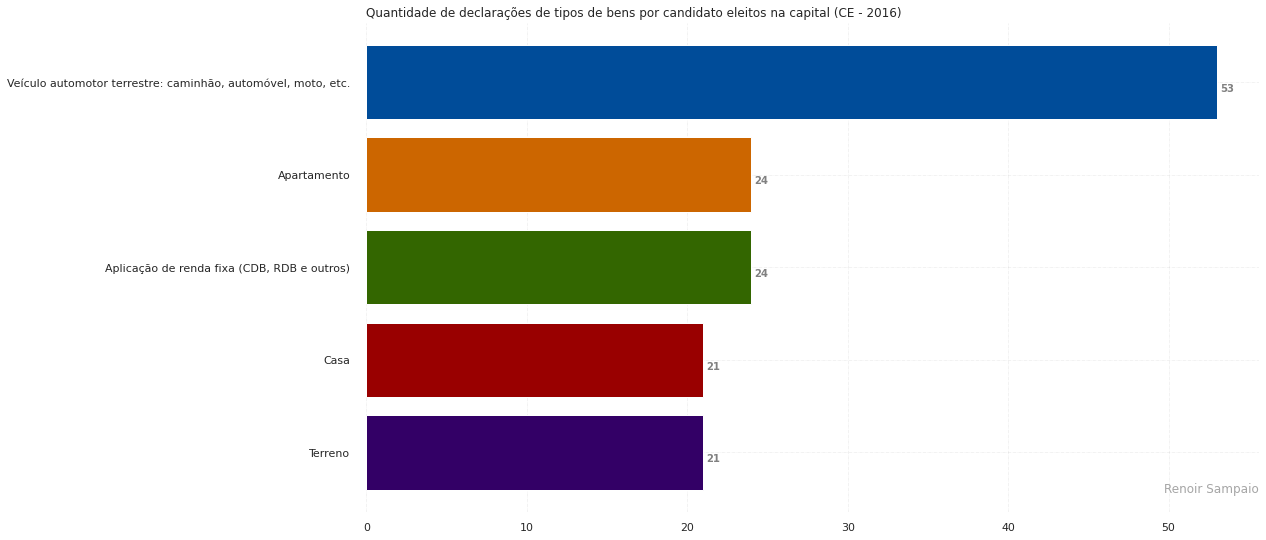

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato eleitos na capital (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

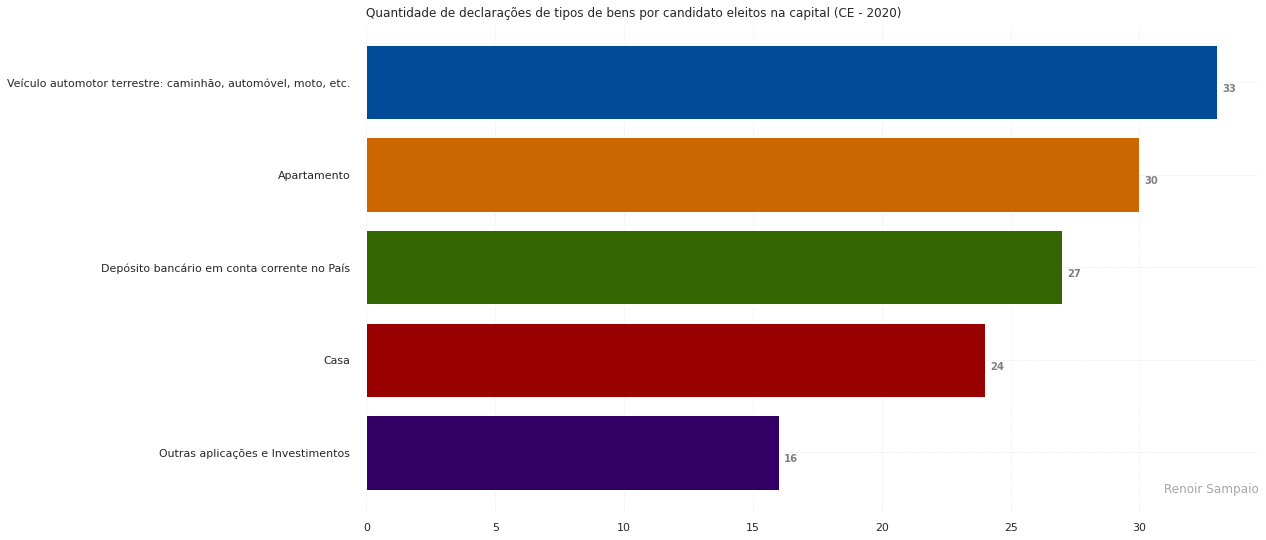

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato eleitos na capital (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

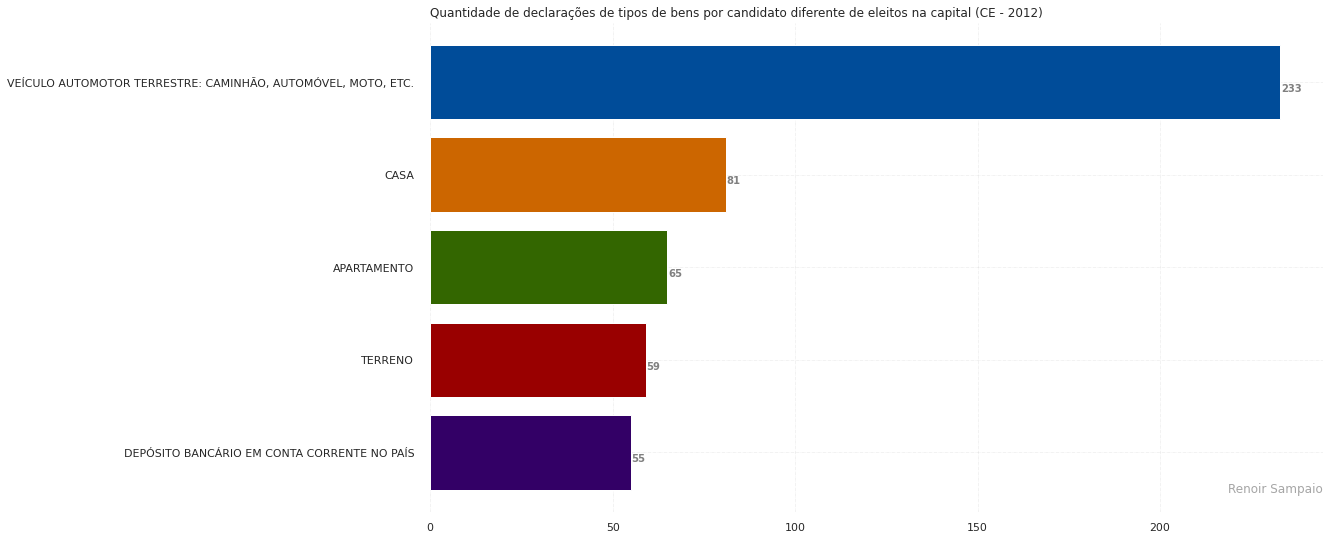

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato diferente de eleitos na capital (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

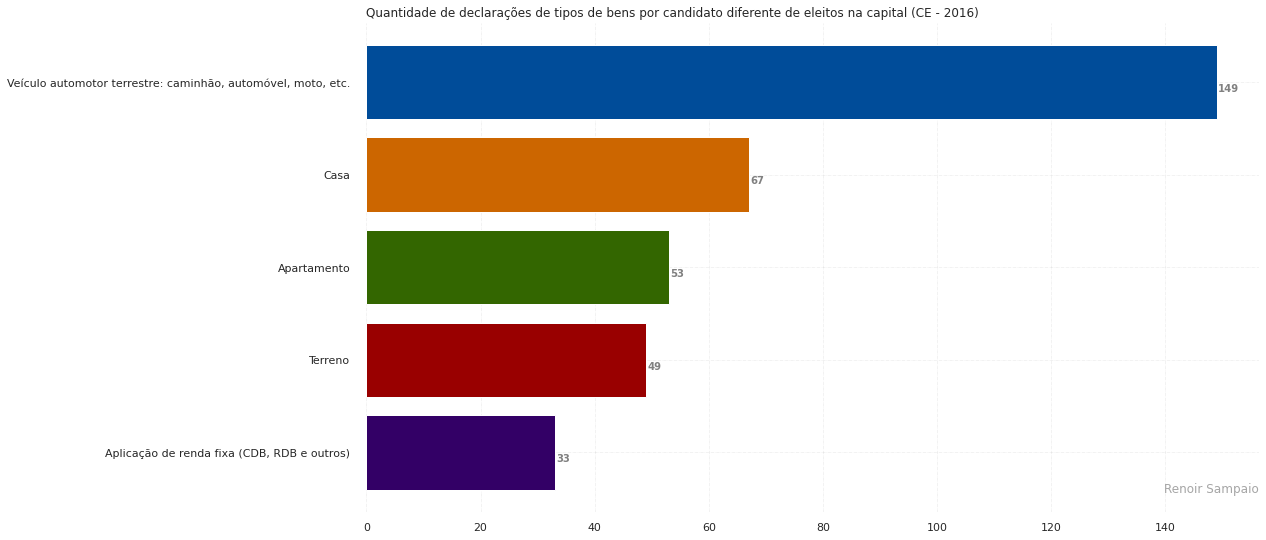

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato diferente de eleitos na capital (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

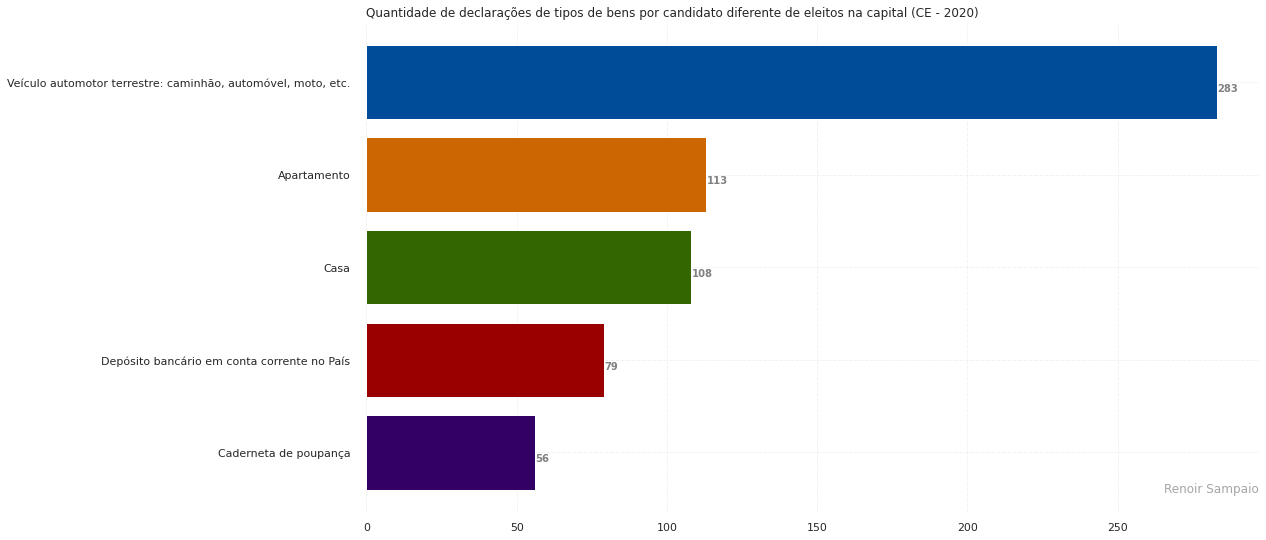

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato diferente de eleitos na capital (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()


## Definir e tratar atributo sexo dos candidatos nos datasets de bens

In [ ]:
# Quantidade de homens e mulheres candidatados em 2012
print('2012 Homens:', (bem_candidato_2012['DESCRICAO_SEXO'] == 'MASCULINO').sum())
print('2012 Mulheres:', (bem_candidato_2012['DESCRICAO_SEXO'] == 'FEMININO').sum())
# Quantidade de homens e mulheres candidatados em 2016
print('2016 Homens:', (bem_candidato_2016['DESCRICAO_SEXO'] == 'MASCULINO').sum())
print('2016 Mulheres:', (bem_candidato_2016['DESCRICAO_SEXO'] == 'FEMININO').sum())
# Quantidade de homens e mulheres candidatados em 2020
print('2020 Homens:', (bem_candidato_2020['DESCRICAO_SEXO'] == 'MASCULINO').sum())
print('2020 Mulheres:', (bem_candidato_2020['DESCRICAO_SEXO'] == 'FEMININO').sum())

2012 Homens: 19325
2012 Mulheres: 4339
2016 Homens: 21418
2016 Mulheres: 5020
2020 Homens: 20434
2020 Mulheres: 5390


In [ ]:
line1 = ['2012', 'Homem', '19325']
line2 = ['2012', 'Mulher', '4339']
line3 = ['2016', 'Homem', '21418']
line4 = ['2016', 'Mulher', '5020']
line5 = ['2020', 'Homem', '20434']
line6 = ['2020', 'Mulher', '5390']

In [ ]:
tabela_qtd_sex = pd.DataFrame(np.array([line1, line2, line3, line4, line5, line6]), columns=['Ano', 'Sexo', 'Quantidade'])

In [ ]:
tabela_qtd_sex

Ano    Sexo Quantidade
0  2012   Homem      19325
1  2012  Mulher       4339
2  2016   Homem      21418
3  2016  Mulher       5020
4  2020   Homem      20434
5  2020  Mulher       5390

In [ ]:
# Selecionando bens dos candidatos eleitos do interior sexo feminino
bem_candidato_interior_eleito_feminino_2012 = bem_candidato_interior_eleito_2012.loc[(bem_candidato_interior_eleito_2012['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_interior_eleito_feminino_2016 = bem_candidato_interior_eleito_2016.loc[(bem_candidato_interior_eleito_2016['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_interior_eleito_feminino_2020 = bem_candidato_interior_eleito_2020.loc[(bem_candidato_interior_eleito_2020['DESCRICAO_SEXO'] == 'FEMININO')]
# Selecionando bens dos candidatos eleitos do interior sexo masculino
bem_candidato_interior_eleito_masculino_2012 = bem_candidato_interior_eleito_2012.loc[(bem_candidato_interior_eleito_2012['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_interior_eleito_masculino_2016 = bem_candidato_interior_eleito_2016.loc[(bem_candidato_interior_eleito_2016['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_interior_eleito_masculino_2020 = bem_candidato_interior_eleito_2020.loc[(bem_candidato_interior_eleito_2020['DESCRICAO_SEXO'] == 'MASCULINO')]


# Selecionando bens dos candidatos diferente de eleitos do interior sexo feminino
bem_candidato_interior_neleito_feminino_2012 = bem_candidato_interior_neleito_2012.loc[(bem_candidato_interior_neleito_2012['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_interior_neleito_feminino_2016 = bem_candidato_interior_neleito_2016.loc[(bem_candidato_interior_neleito_2016['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_interior_neleito_feminino_2020 = bem_candidato_interior_neleito_2020.loc[(bem_candidato_interior_neleito_2020['DESCRICAO_SEXO'] == 'FEMININO')]
# Selecionando bens dos candidatos diferente de eleitos do interior sexo masculino
bem_candidato_interior_neleito_masculino_2012 = bem_candidato_interior_neleito_2012.loc[(bem_candidato_interior_neleito_2012['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_interior_neleito_masculino_2016 = bem_candidato_interior_neleito_2016.loc[(bem_candidato_interior_neleito_2016['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_interior_neleito_masculino_2020 = bem_candidato_interior_neleito_2020.loc[(bem_candidato_interior_neleito_2020['DESCRICAO_SEXO'] == 'MASCULINO')]


# Selecionando bens dos candidatos eleitos da capital sexo feminino
bem_candidato_capital_eleito_feminino_2012 = bem_candidato_capital_eleito_2012.loc[(bem_candidato_capital_eleito_2012['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_capital_eleito_feminino_2016 = bem_candidato_capital_eleito_2016.loc[(bem_candidato_capital_eleito_2016['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_capital_eleito_feminino_2020 = bem_candidato_capital_eleito_2020.loc[(bem_candidato_capital_eleito_2020['DESCRICAO_SEXO'] == 'FEMININO')]
# Selecionando bens dos candidatos eleitos da capital sexo masculino
bem_candidato_capital_eleito_masculino_2012 = bem_candidato_capital_eleito_2012.loc[(bem_candidato_capital_eleito_2012['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_capital_eleito_masculino_2016 = bem_candidato_capital_eleito_2016.loc[(bem_candidato_capital_eleito_2016['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_capital_eleito_masculino_2020 = bem_candidato_capital_eleito_2020.loc[(bem_candidato_capital_eleito_2020['DESCRICAO_SEXO'] == 'MASCULINO')]


# Selecionando bens dos candidatos diferente de eleitos da capital sexo feminino
bem_candidato_capital_neleito_feminino_2012 = bem_candidato_capital_neleito_2012.loc[(bem_candidato_capital_neleito_2012['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_capital_neleito_feminino_2016 = bem_candidato_capital_neleito_2016.loc[(bem_candidato_capital_neleito_2016['DESCRICAO_SEXO'] == 'FEMININO')]
bem_candidato_capital_neleito_feminino_2020 = bem_candidato_capital_neleito_2020.loc[(bem_candidato_capital_neleito_2020['DESCRICAO_SEXO'] == 'FEMININO')]
# Selecionando bens dos candidatos diferente de eleitos da capital sexo masculino
bem_candidato_capital_neleito_masculino_2012 = bem_candidato_capital_neleito_2012.loc[(bem_candidato_capital_neleito_2012['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_capital_neleito_masculino_2016 = bem_candidato_capital_neleito_2016.loc[(bem_candidato_capital_neleito_2016['DESCRICAO_SEXO'] == 'MASCULINO')]
bem_candidato_capital_neleito_masculino_2020 = bem_candidato_capital_neleito_2020.loc[(bem_candidato_capital_neleito_2020['DESCRICAO_SEXO'] == 'MASCULINO')]

## Comparando gráficos dos candidatos femininos e masculino na CAPITAL, eleitos e não eleitos (12, 16, 20)

### Eleito

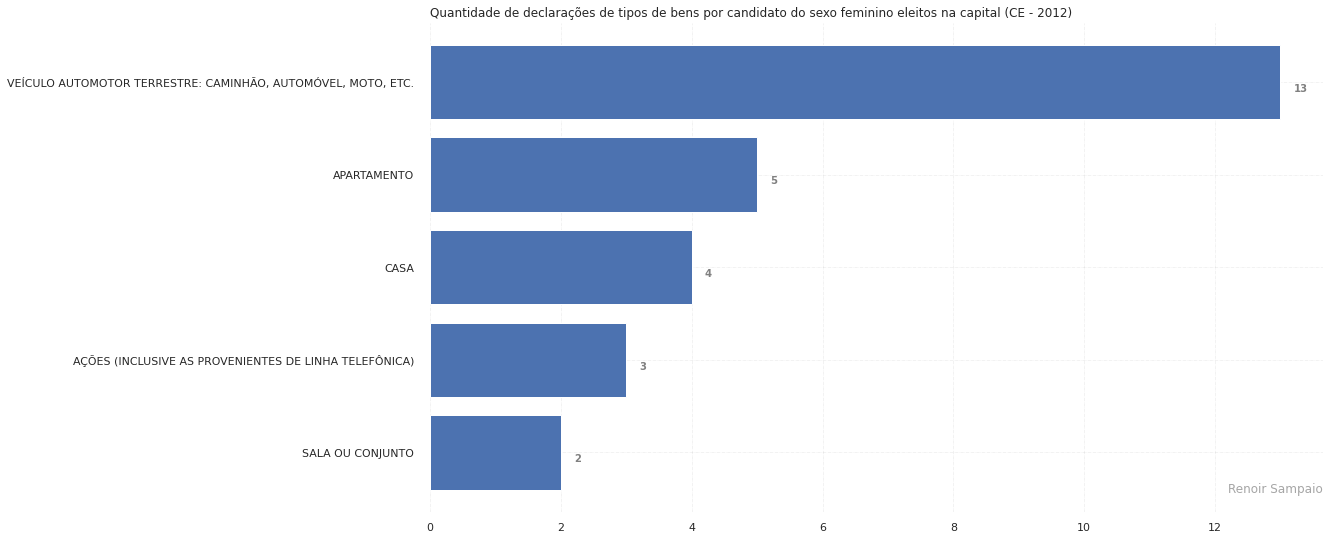

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino eleitos na capital (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas eleitas na capital 2012')

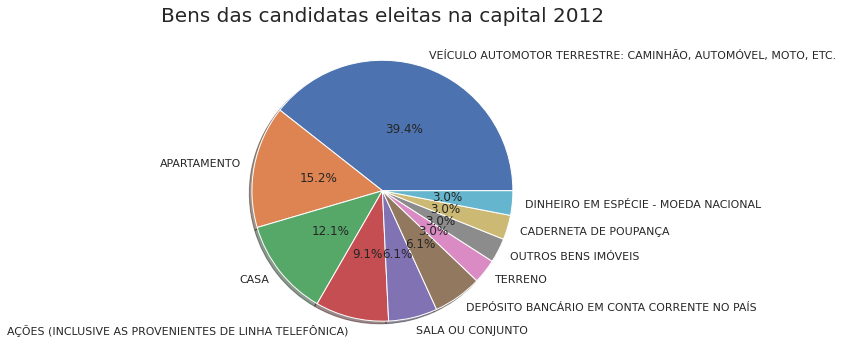

In [ ]:
v = bem_candidato_capital_eleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccef2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccef2012.columns.values
plt.pie(x = bccef2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas eleitas na capital 2012", fontsize=20)

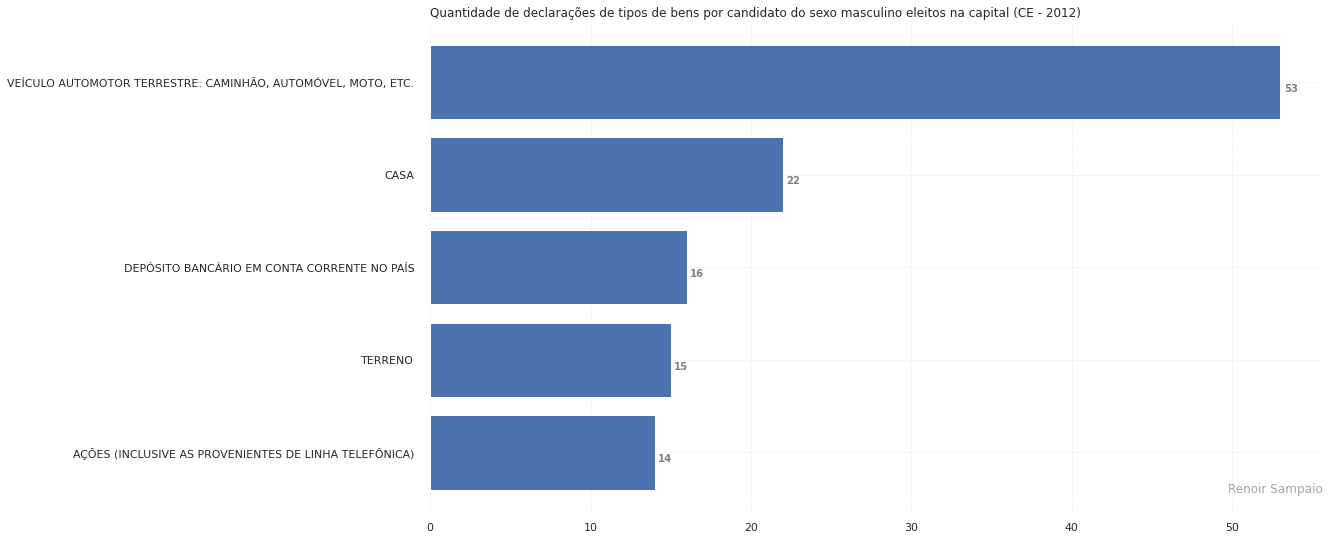

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino eleitos na capital (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

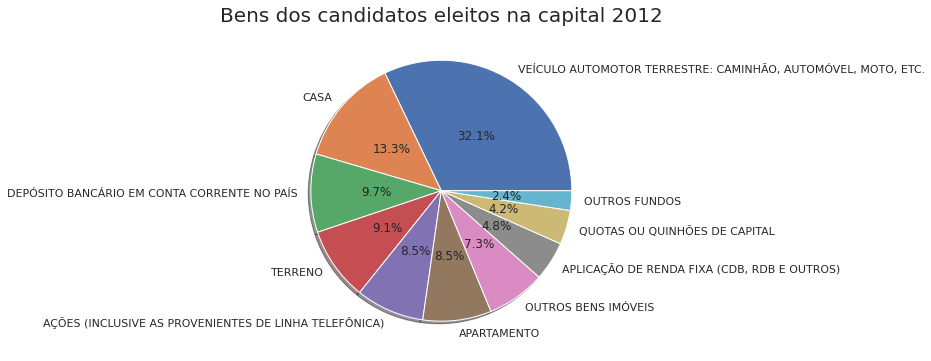

In [ ]:
v = bem_candidato_capital_eleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccem2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccem2012.columns.values
plt.pie(x = bccem2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos na capital 2012", fontsize=20);

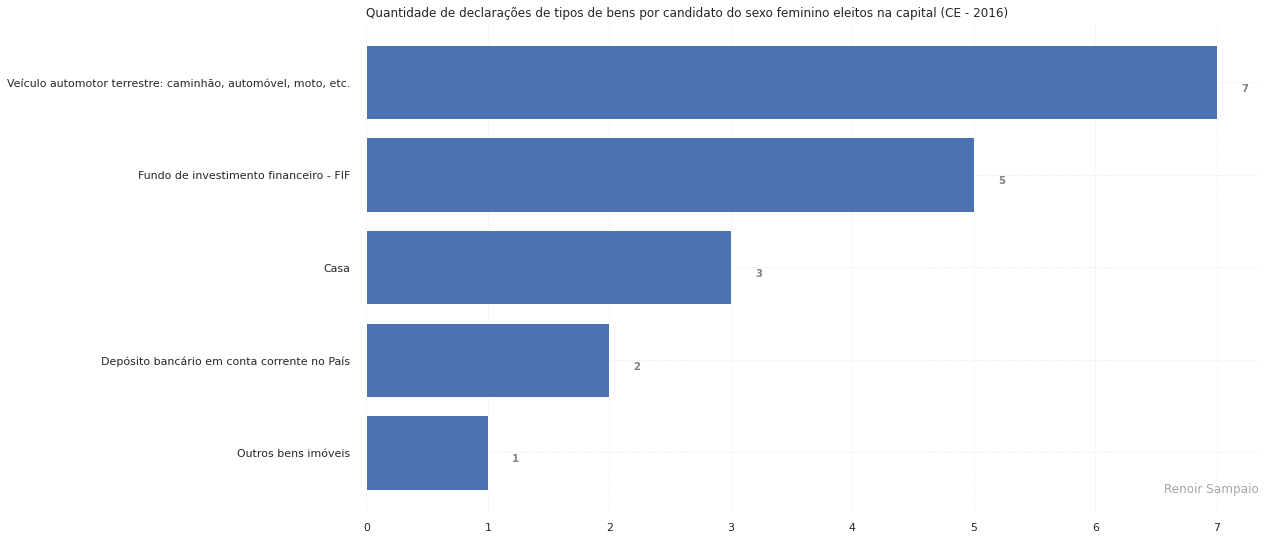

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino eleitos na capital (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

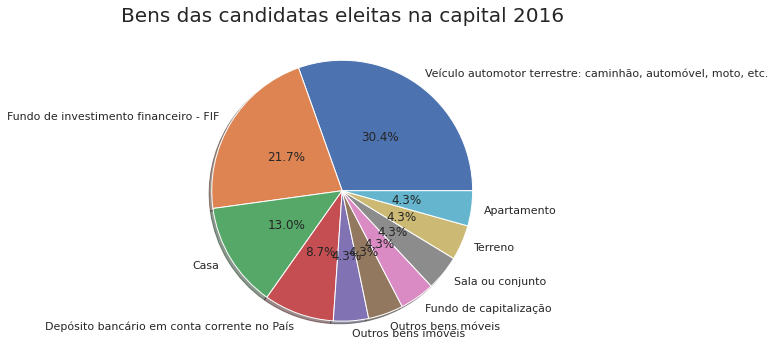

In [ ]:
v = bem_candidato_capital_eleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccef2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccef2016.columns.values
plt.pie(x = bccef2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas eleitas na capital 2016", fontsize=20);

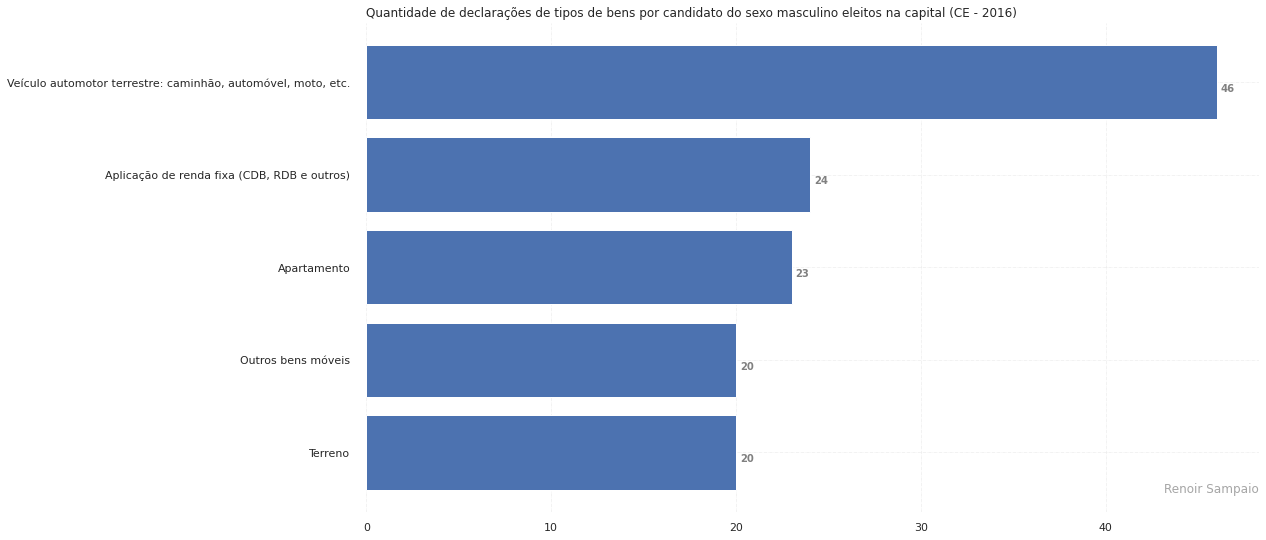

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino eleitos na capital (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos eleitos na capital 2016')

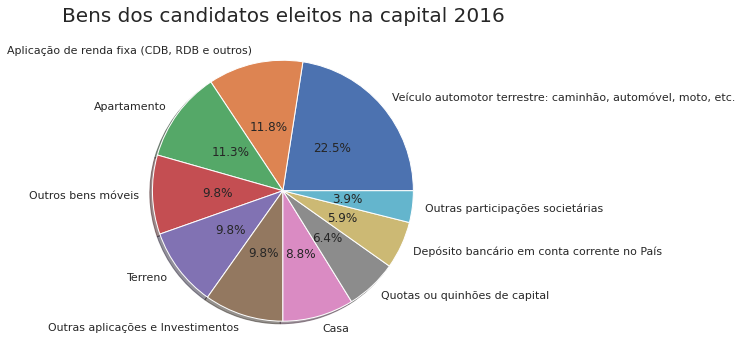

In [ ]:
v = bem_candidato_capital_eleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccem2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccem2016.columns.values
plt.pie(x = bccem2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos na capital 2016", fontsize=20)

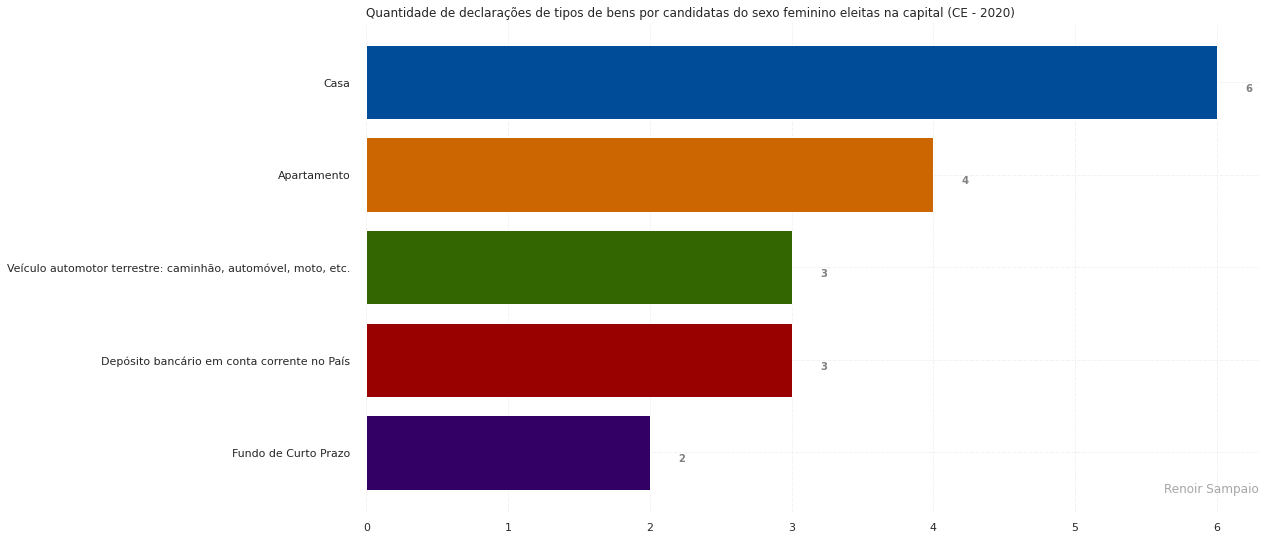

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidatas do sexo feminino eleitas na capital (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens somente das candidatas eleitas na capital 2020')

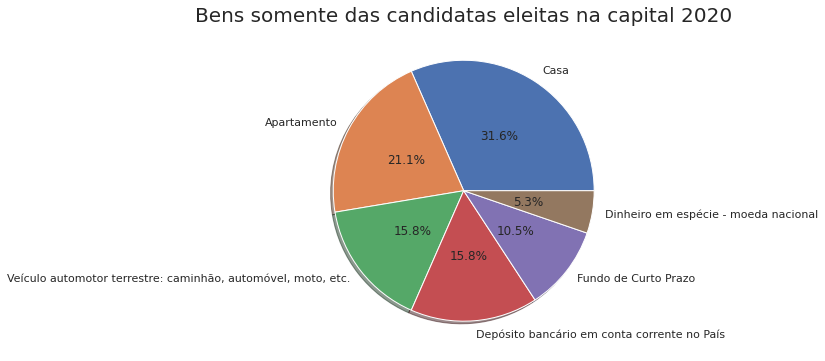

In [ ]:
v = bem_candidato_capital_eleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccef2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccef2020.columns.values
plt.pie(x = bccef2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens somente das candidatas eleitas na capital 2020", fontsize=20)

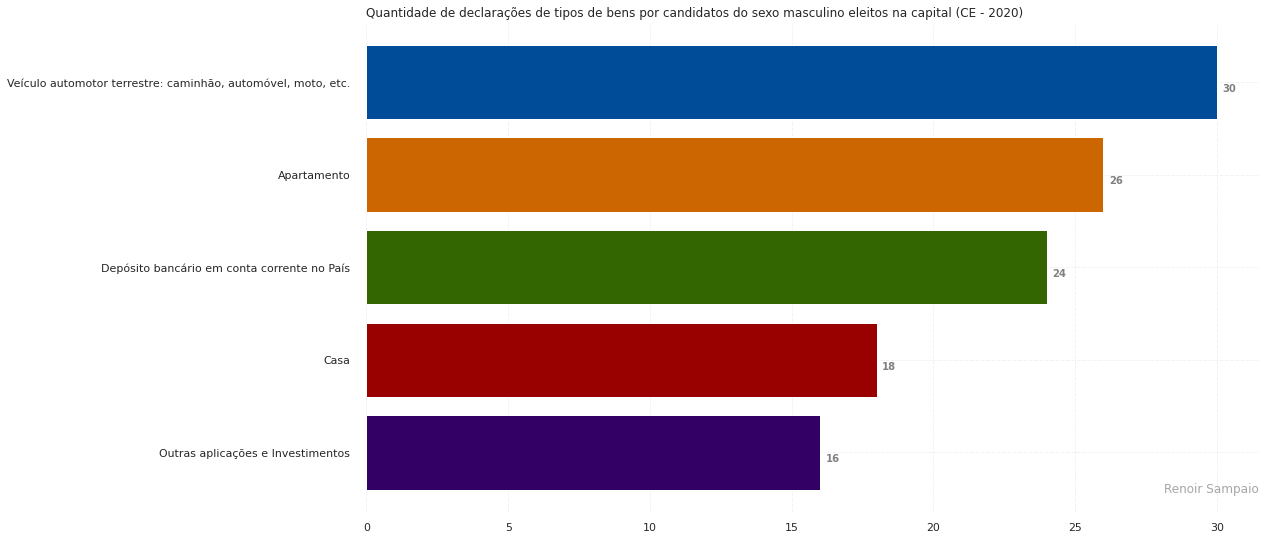

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_eleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"])

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidatos do sexo masculino eleitos na capital (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens somente dos candidatos eleitos na capital 2020')

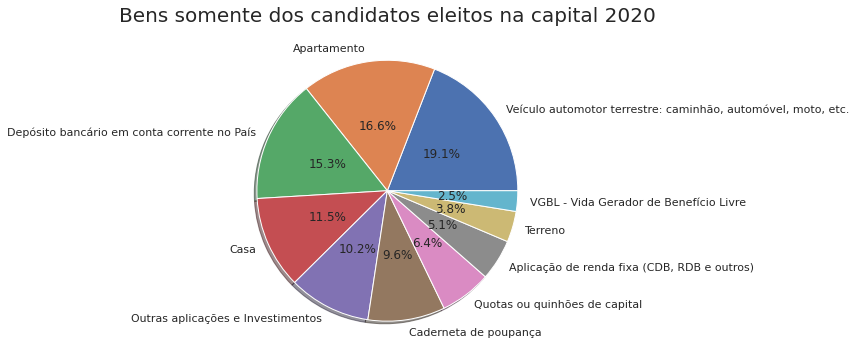

In [ ]:
v = bem_candidato_capital_eleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_eleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccem2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccem2020.columns.values
plt.pie(x = bccem2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens somente dos candidatos eleitos na capital 2020", fontsize=20)

### Não eleito

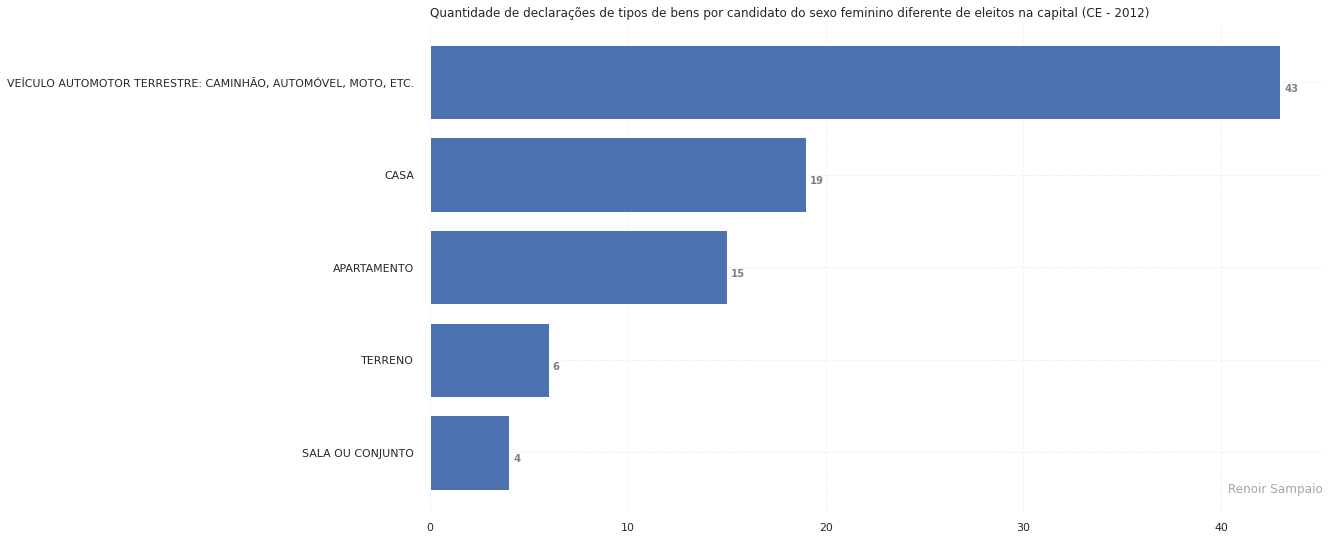

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino diferente de eleitos na capital (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas não eleitas na capital 2012')

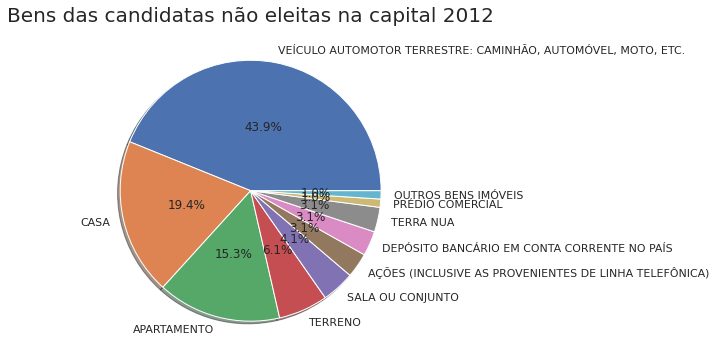

In [ ]:
v = bem_candidato_capital_neleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccnef2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccnef2012.columns.values
plt.pie(x = bccnef2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas não eleitas na capital 2012", fontsize=20)

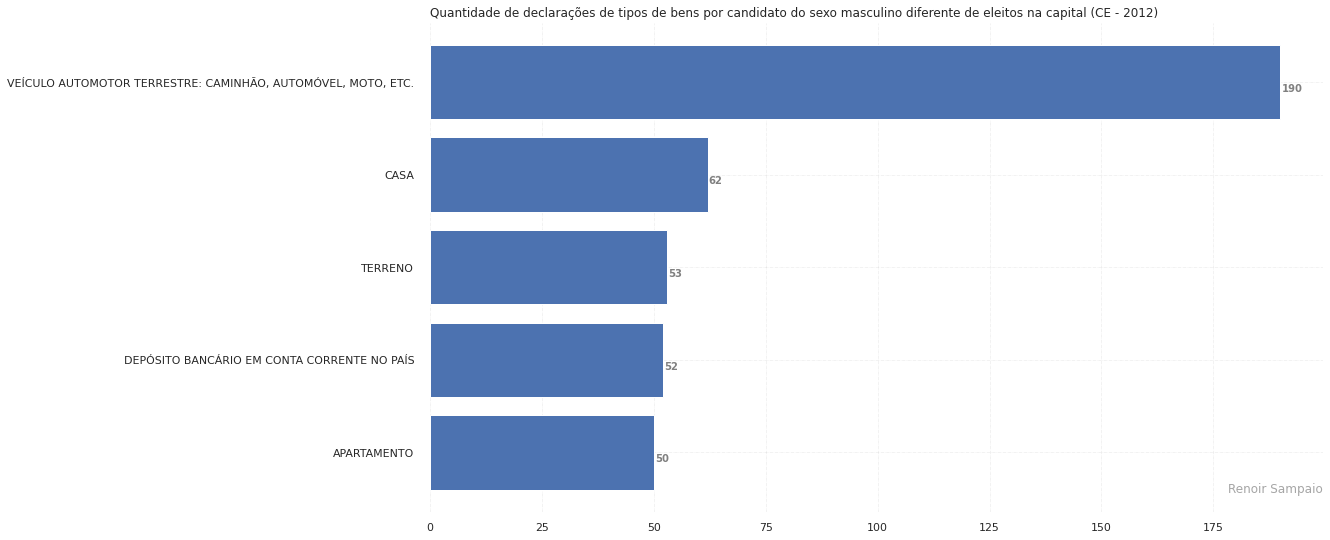

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino diferente de eleitos na capital (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos não eleitas na capital 2012')

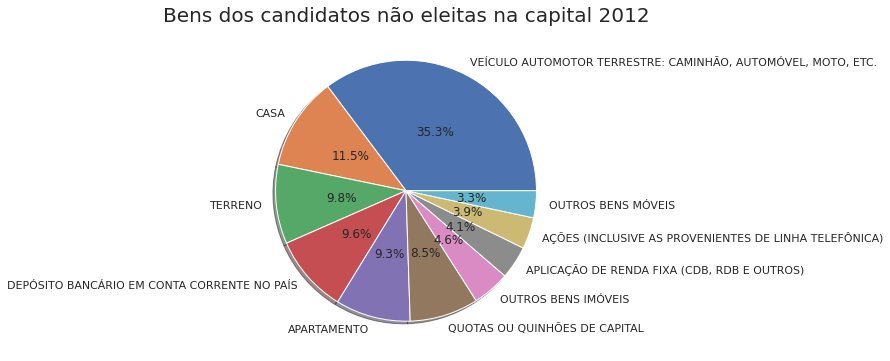

In [ ]:
v = bem_candidato_capital_neleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccnem2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccnem2012.columns.values
plt.pie(x = bccnem2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos não eleitas na capital 2012", fontsize=20)

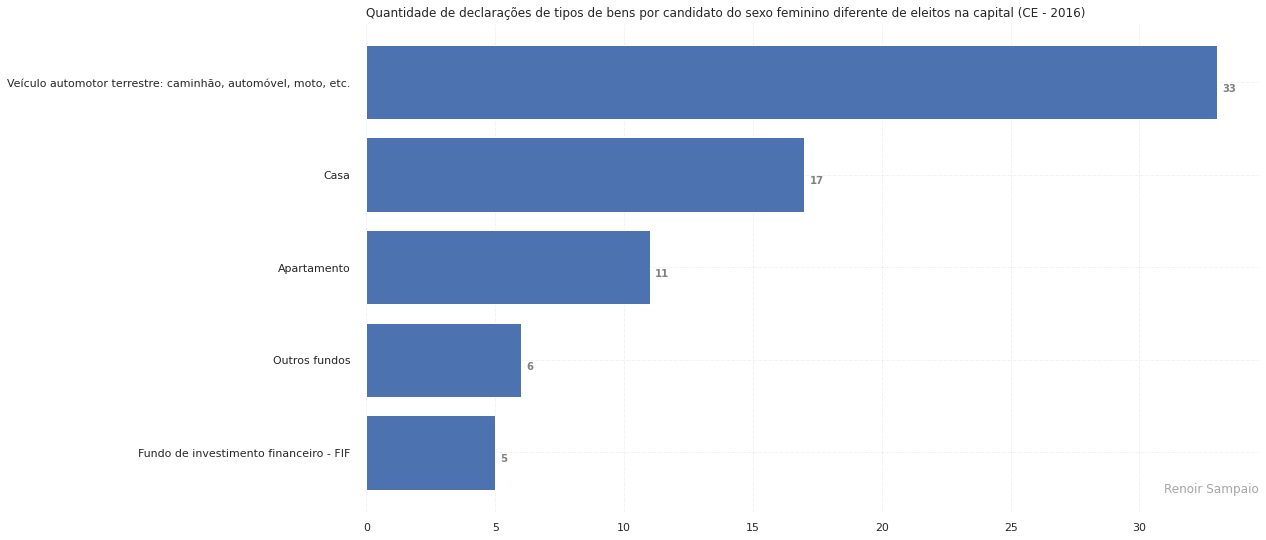

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino diferente de eleitos na capital (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas não eleitas na capital 2016')

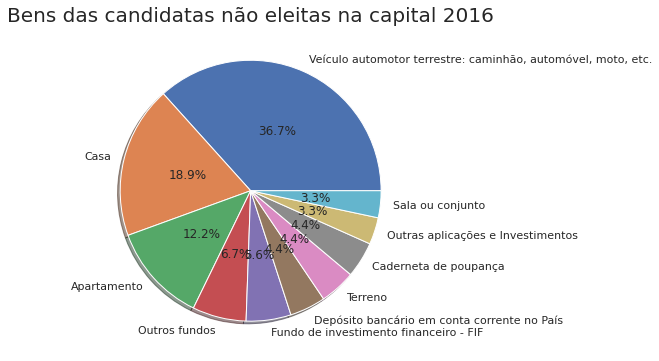

In [ ]:
v = bem_candidato_capital_neleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccnef2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccnef2016.columns.values
plt.pie(x = bccnef2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas não eleitas na capital 2016", fontsize=20)

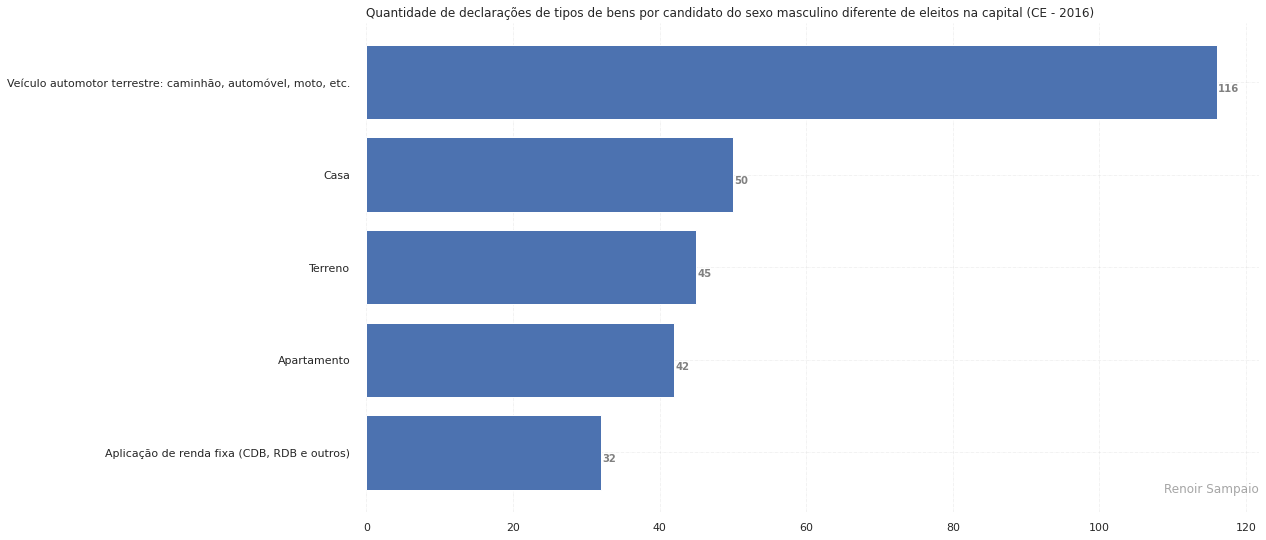

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino diferente de eleitos na capital (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos não eleitas na capital 2016')

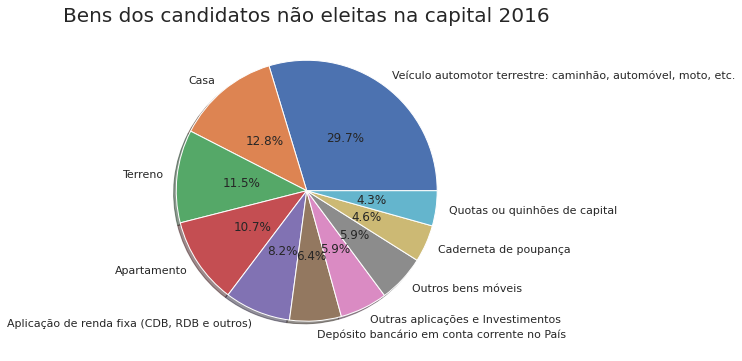

In [ ]:
v = bem_candidato_capital_neleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccnem2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccnem2016.columns.values
plt.pie(x = bccnem2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos não eleitas na capital 2016", fontsize=20)

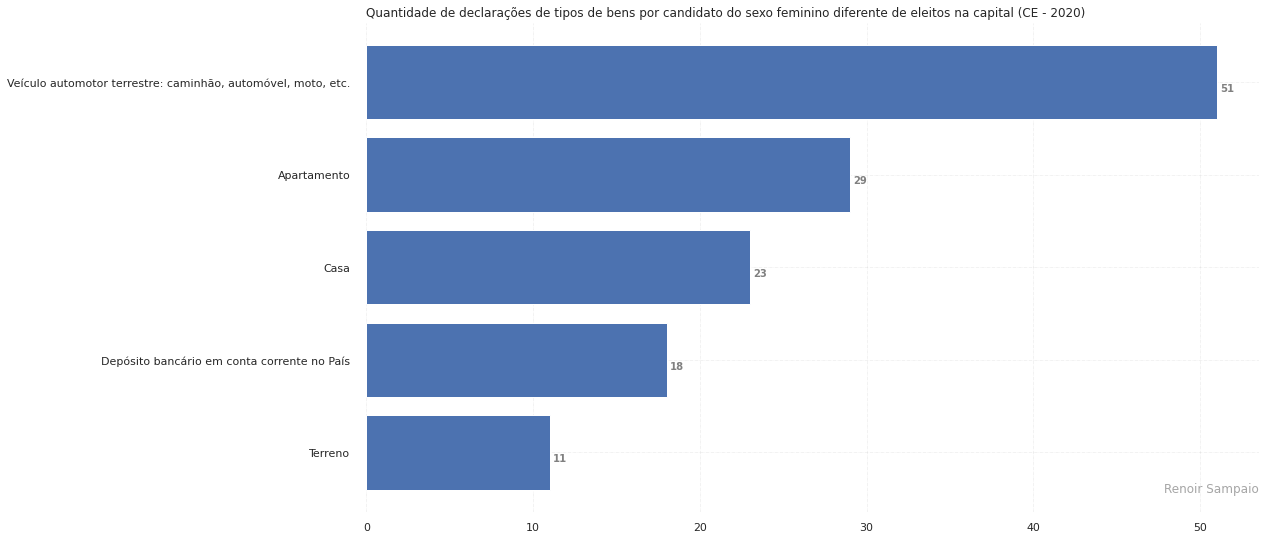

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino diferente de eleitos na capital (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas não eleitas na capital 2020')

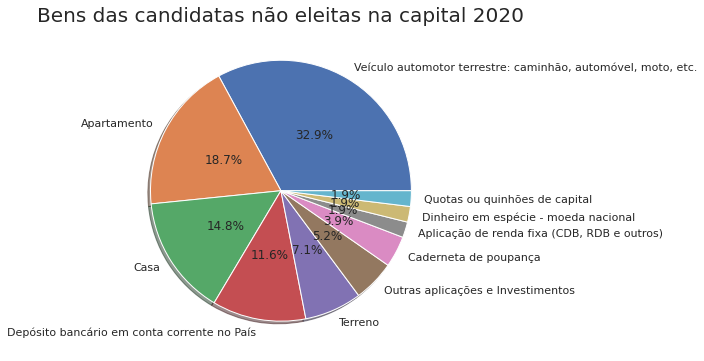

In [ ]:
v = bem_candidato_capital_neleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccnef2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccnef2020.columns.values
plt.pie(x = bccnef2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas não eleitas na capital 2020", fontsize=20)

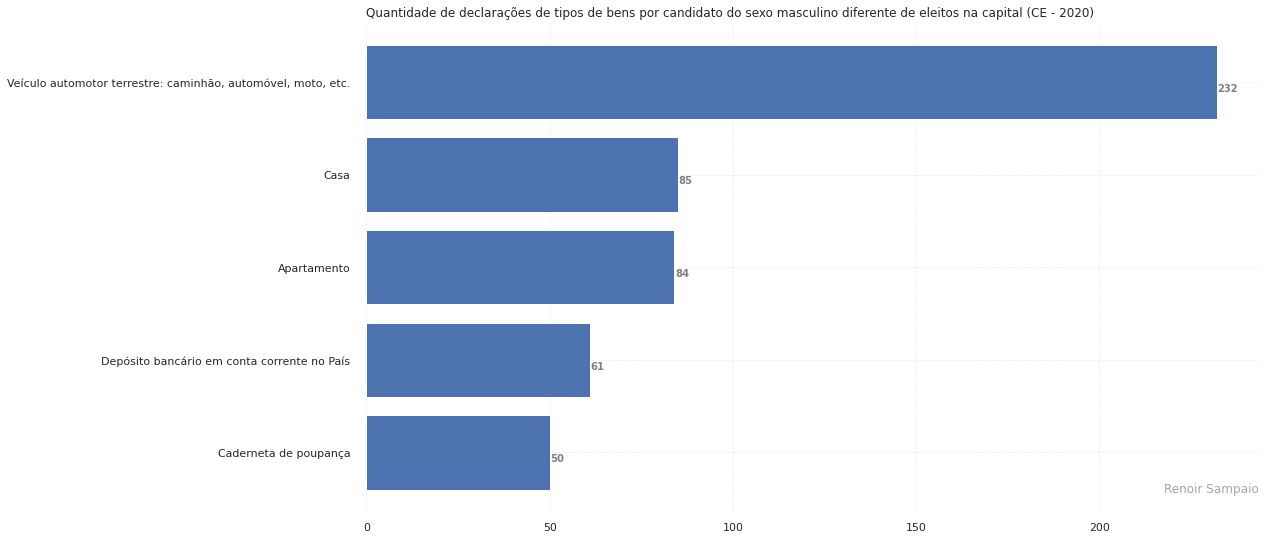

In [ ]:
tips = pd.DataFrame(bem_candidato_capital_neleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino diferente de eleitos na capital (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos não eleitos na capital 2020')

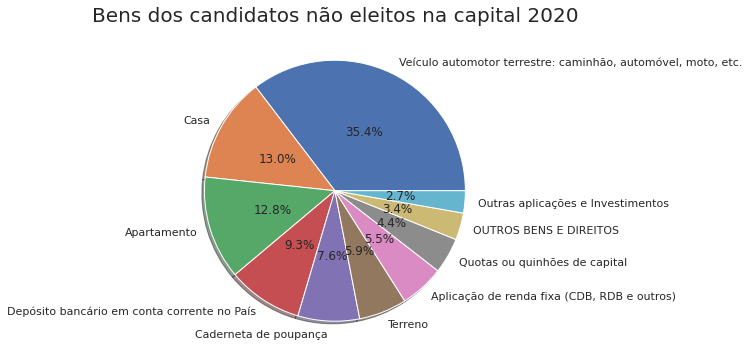

In [ ]:
v = bem_candidato_capital_neleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_capital_neleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bccnem2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bccnem2020.columns.values
plt.pie(x = bccnem2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos não eleitos na capital 2020", fontsize=20)

## Comparando gráficos dos candidatos femininos e masculino no INTERIOR, eleitos e não eleitos (12, 16, 20)

### Eleito

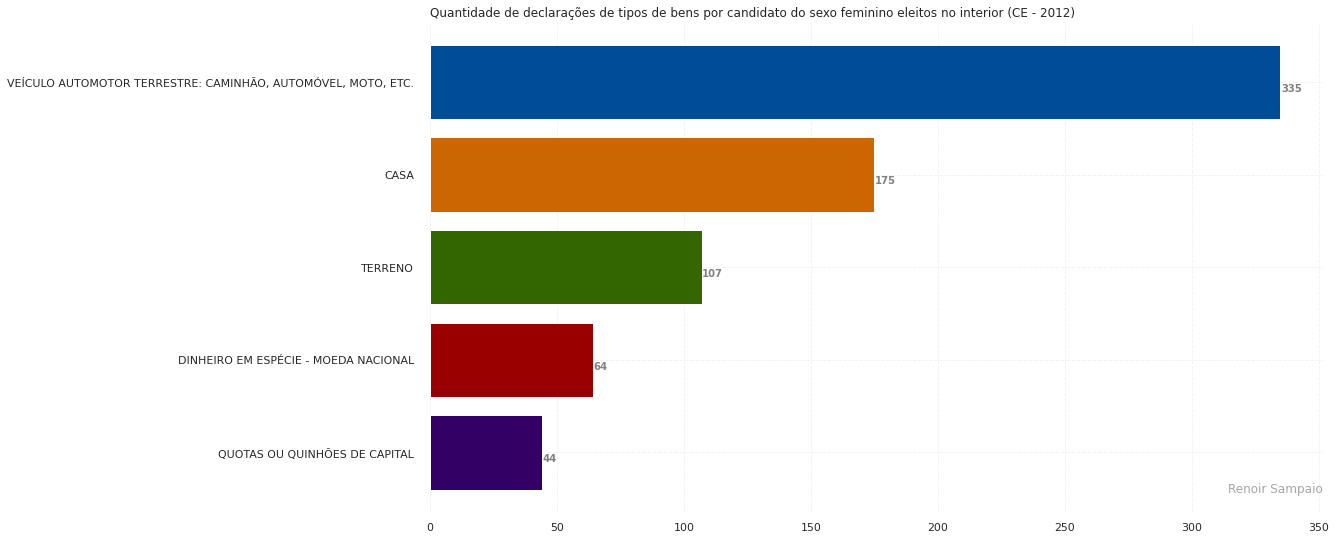

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd, color=["#004C99", "#CC6600", "#336600", "#990000", "#330066"] )

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino eleitos no interior (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas eleitas no interior 2012')

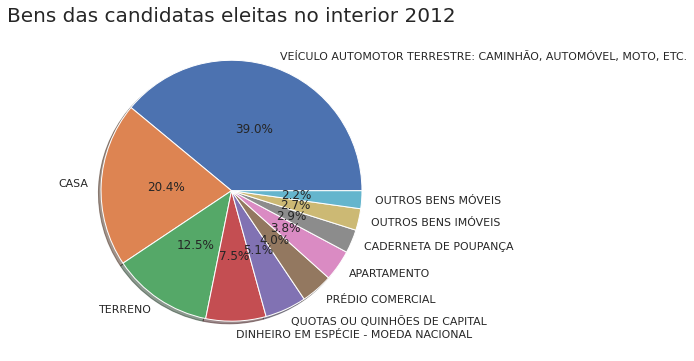

In [ ]:
v = bem_candidato_interior_eleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcief2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcief2012.columns.values
plt.pie(x = bcief2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas eleitas no interior 2012", fontsize=20)

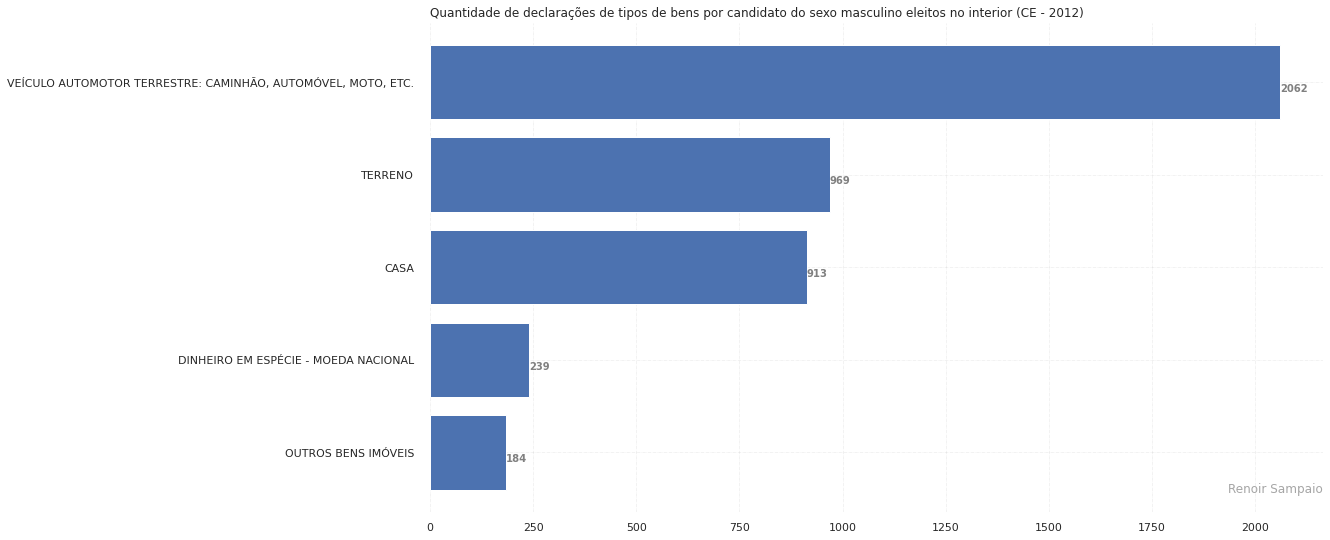

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino eleitos no interior (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos eleitos no interior 2012')

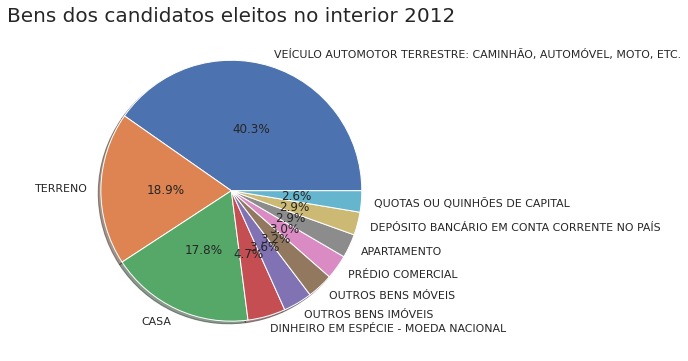

In [ ]:
v = bem_candidato_interior_eleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bciem2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bciem2012.columns.values
plt.pie(x = bciem2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos no interior 2012", fontsize=20)

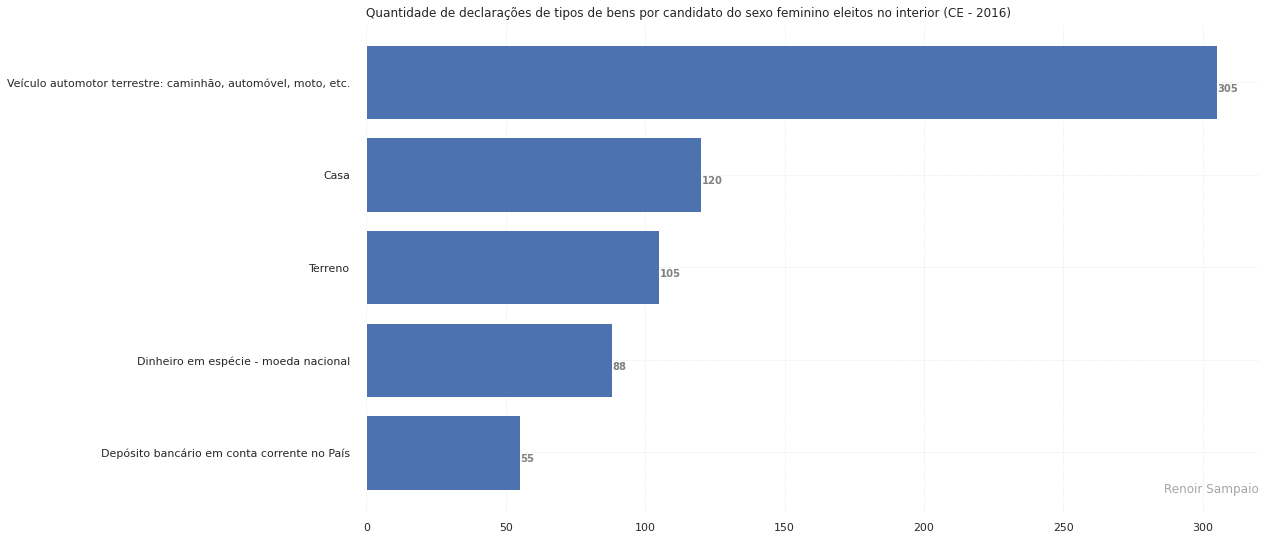

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino eleitos no interior (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas eleitas no interior 2016')

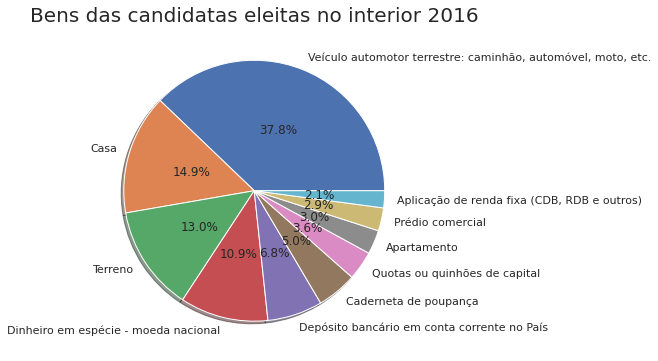

In [ ]:
v = bem_candidato_interior_eleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcief2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcief2016.columns.values
plt.pie(x = bcief2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas eleitas no interior 2016", fontsize=20)

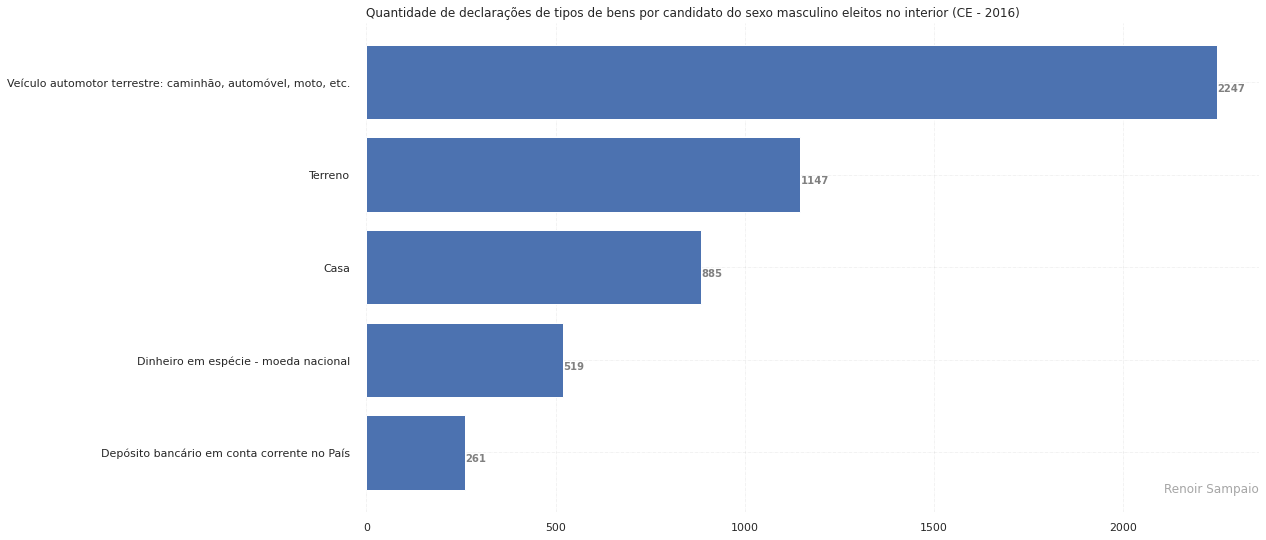

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino eleitos no interior (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos eleitos no interior 2016')

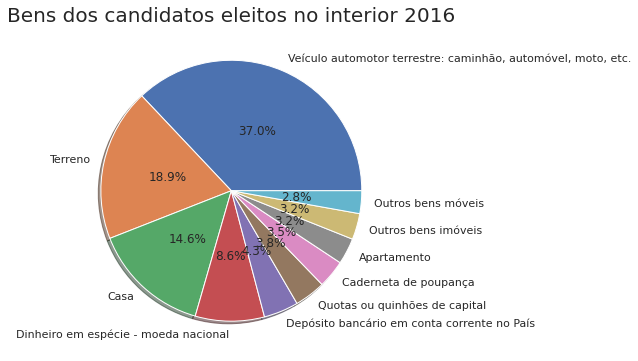

In [ ]:
v = bem_candidato_interior_eleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bciem2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bciem2016.columns.values
plt.pie(x = bciem2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos no interior 2016", fontsize=20)

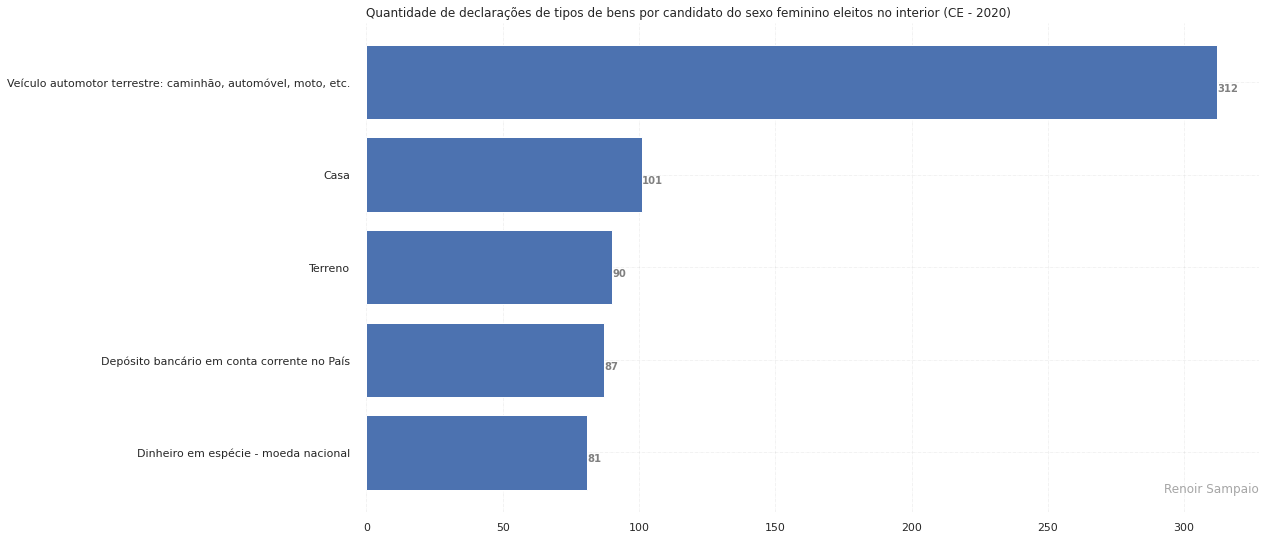

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino eleitos no interior (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas eleitas no interior 2020')

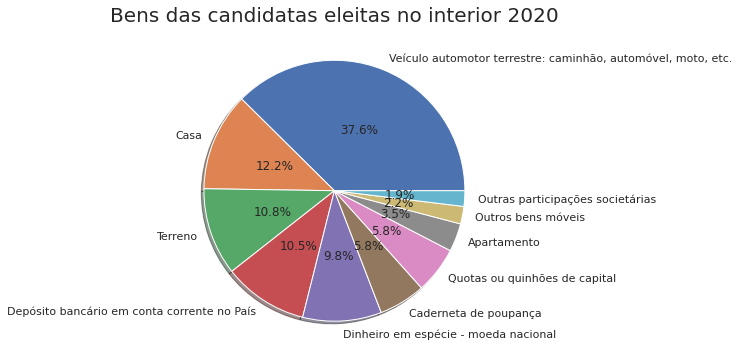

In [ ]:
v = bem_candidato_interior_eleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcief2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcief2020.columns.values
plt.pie(x = bcief2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas eleitas no interior 2020", fontsize=20)

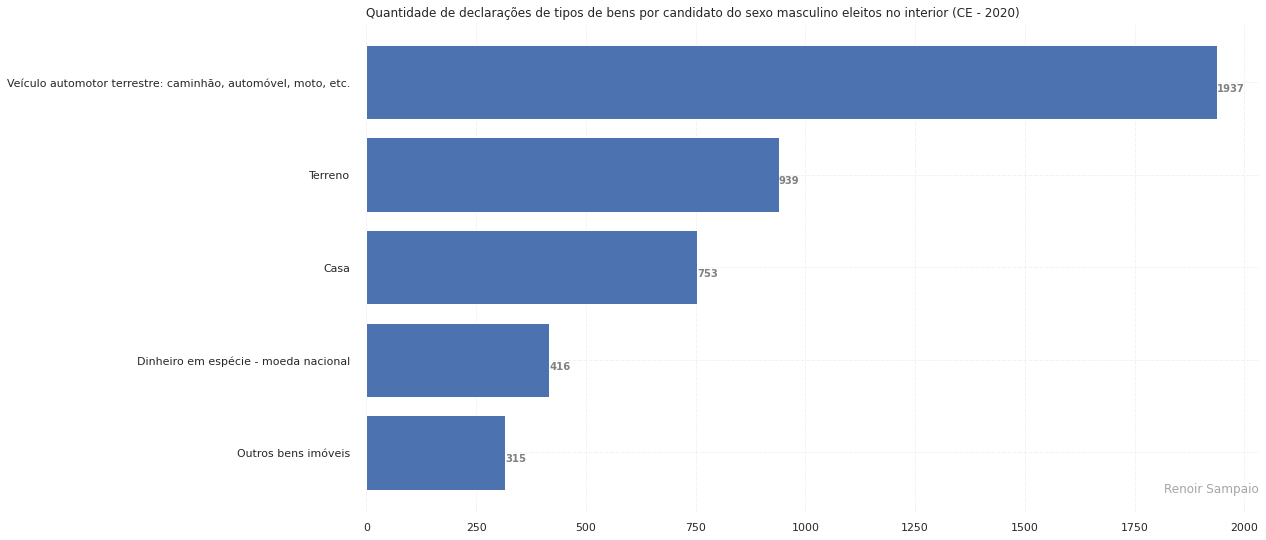

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_eleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino eleitos no interior (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos eleitos no interior 2020')

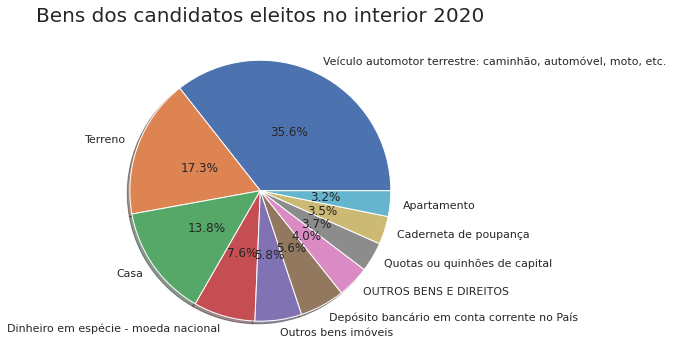

In [ ]:
v = bem_candidato_interior_eleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_eleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bciem2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bciem2020.columns.values
plt.pie(x = bciem2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos eleitos no interior 2020", fontsize=20)

### Não eleito

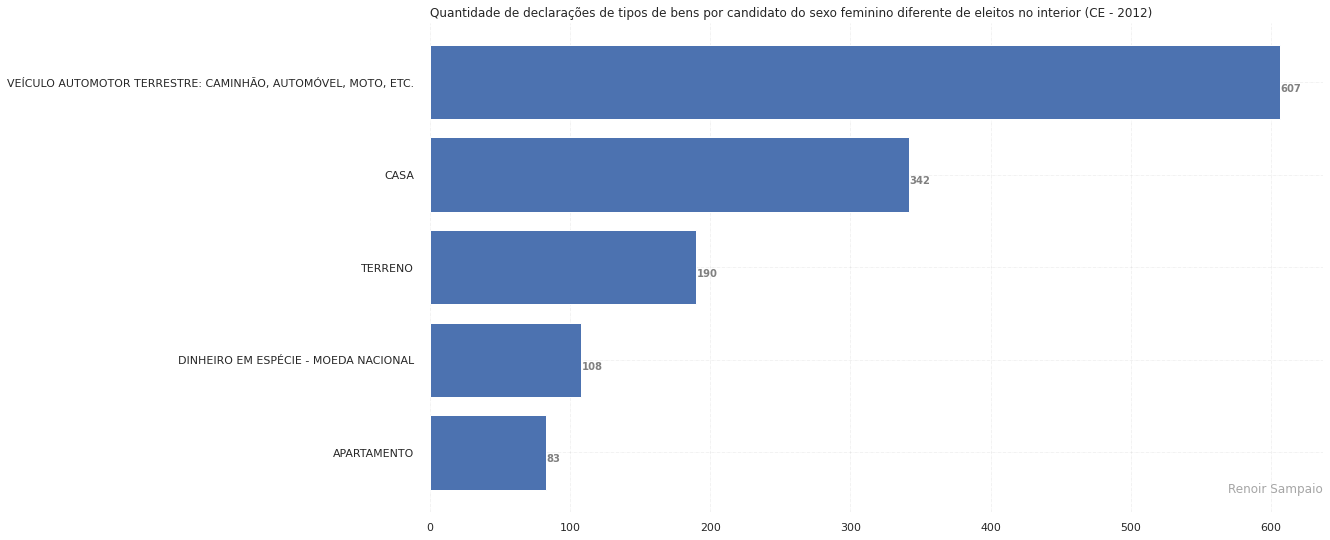

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino diferente de eleitos no interior (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas não eleitas no interior 2012')

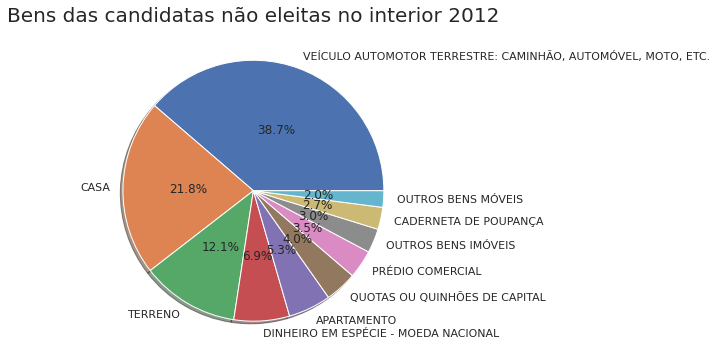

In [ ]:
v = bem_candidato_interior_neleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_feminino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcinef2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcinef2012.columns.values
plt.pie(x = bcinef2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas não eleitas no interior 2012", fontsize=20)

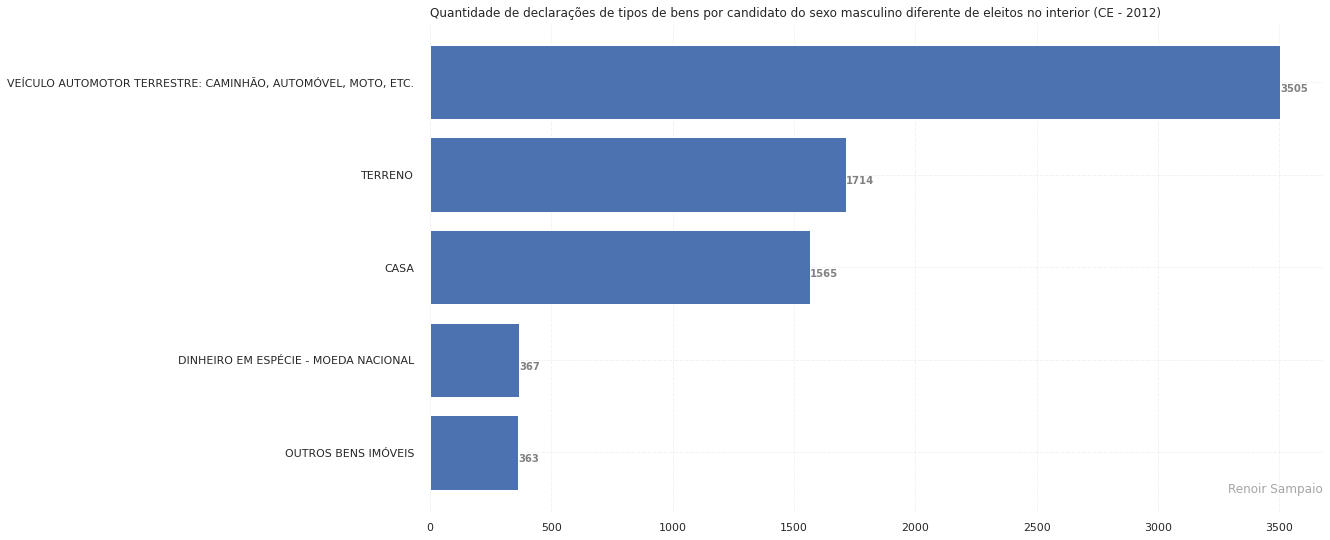

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino diferente de eleitos no interior (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos não eleitos no interior 2012')

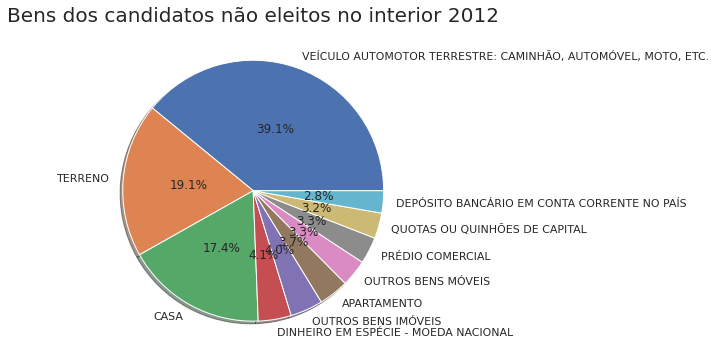

In [ ]:
v = bem_candidato_interior_neleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_masculino_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcinem2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcinem2012.columns.values
plt.pie(x = bcinem2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos não eleitos no interior 2012", fontsize=20)

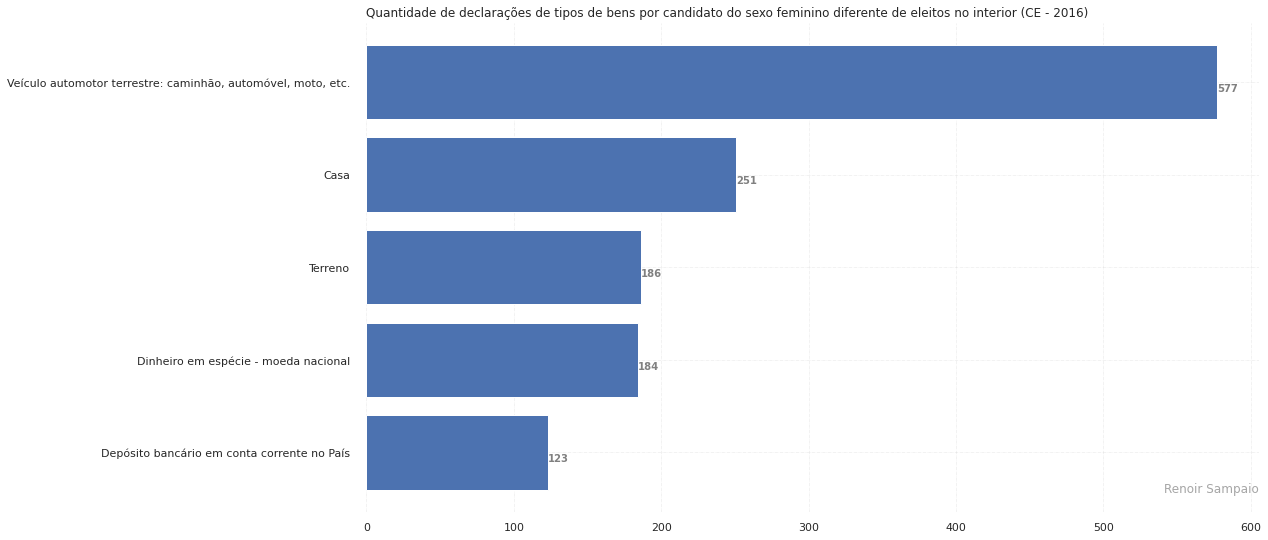

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino diferente de eleitos no interior (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas não eleitas no interior 2016')

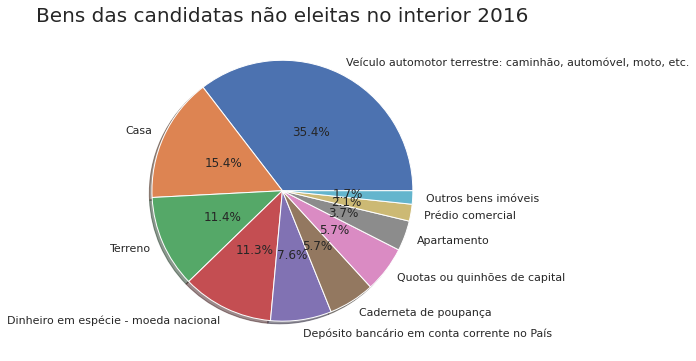

In [ ]:
v = bem_candidato_interior_neleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_feminino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcinef2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcinef2016.columns.values
plt.pie(x = bcinef2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas não eleitas no interior 2016", fontsize=20)

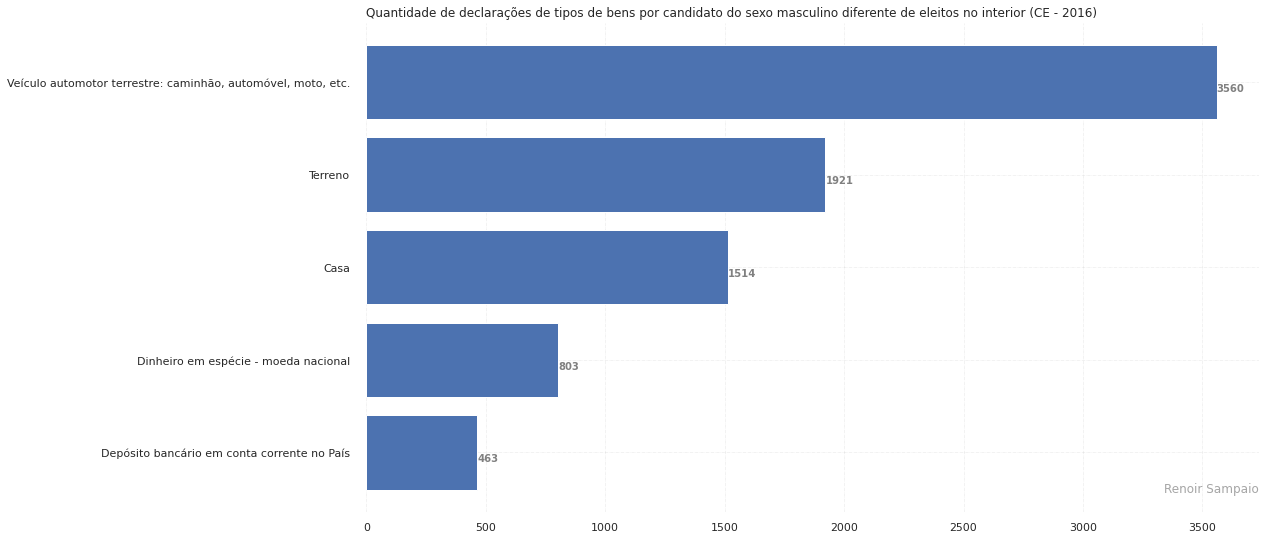

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino diferente de eleitos no interior (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos não eleitos no interior 2016')

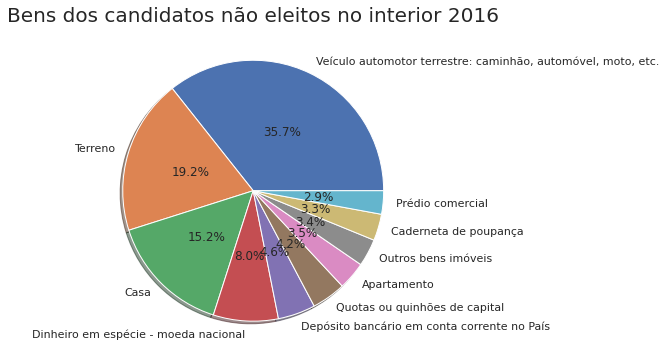

In [ ]:
v = bem_candidato_interior_neleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_masculino_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcinem2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcinem2016.columns.values
plt.pie(x = bcinem2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos não eleitos no interior 2016", fontsize=20)

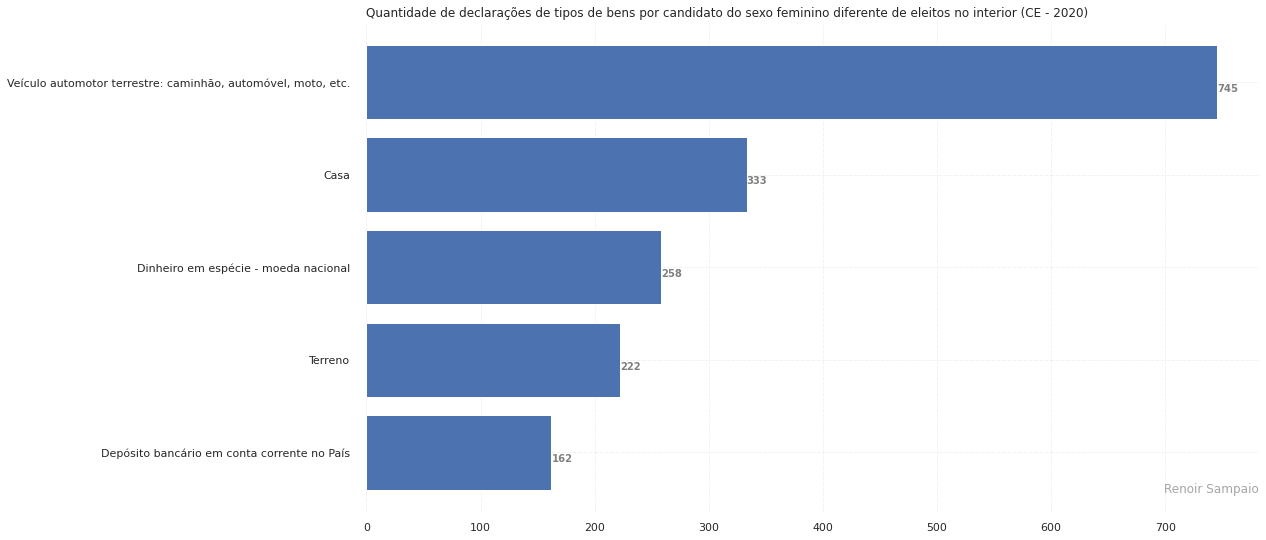

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo feminino diferente de eleitos no interior (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens das candidatas não eleitas no interior 2020')

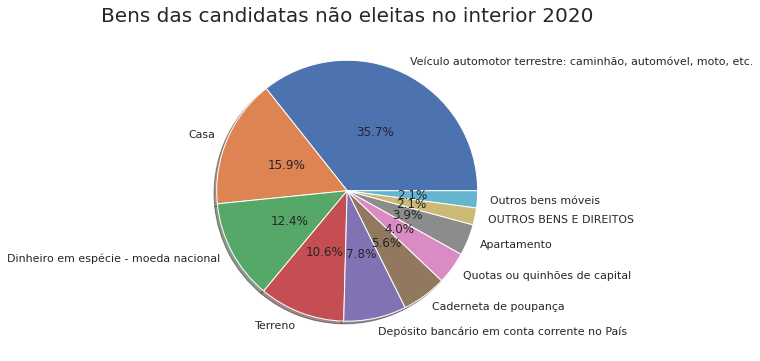

In [ ]:
v = bem_candidato_interior_neleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_feminino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcinef2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcinef2020.columns.values
plt.pie(x = bcinef2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens das candidatas não eleitas no interior 2020", fontsize=20)

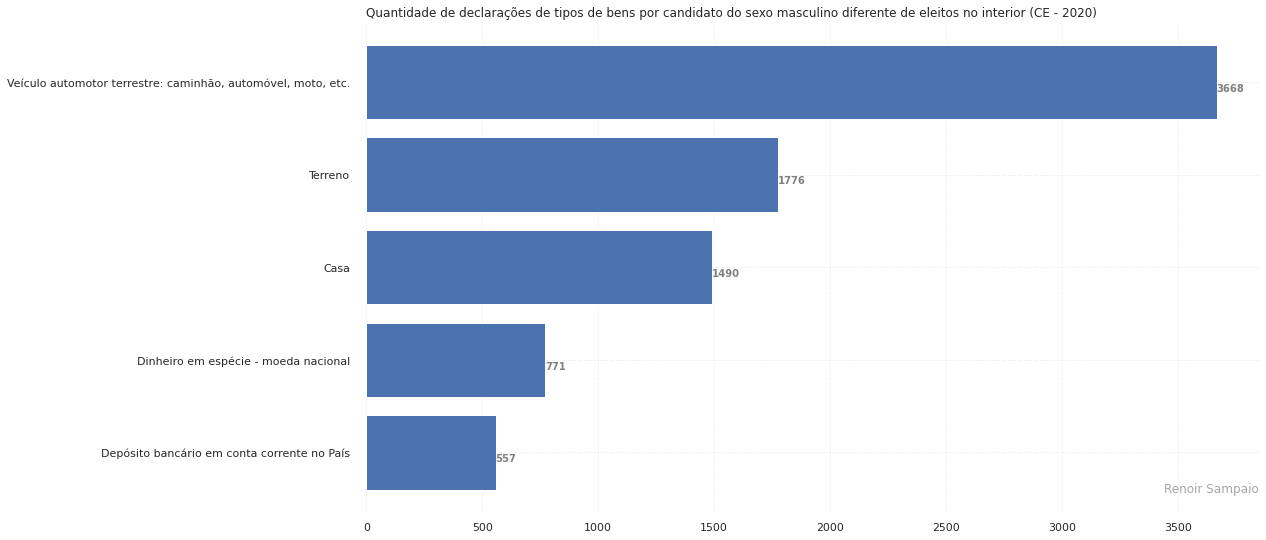

In [ ]:
tips = pd.DataFrame(bem_candidato_interior_neleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato do sexo masculino diferente de eleitos no interior (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos não eleitos no interior 2020')

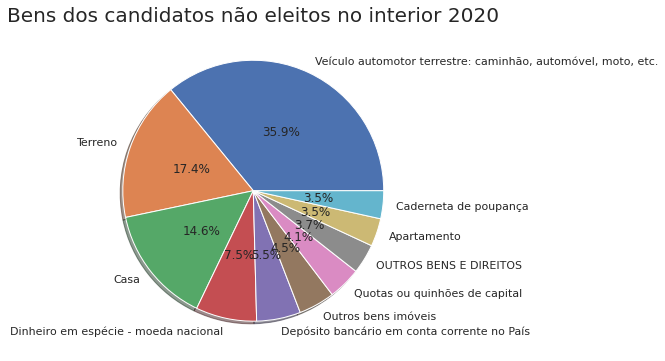

In [ ]:
v = bem_candidato_interior_neleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_interior_neleito_masculino_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcinem2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcinem2020.columns.values
plt.pie(x = bcinem2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos não eleitos no interior 2020", fontsize=20)

## Comparando gráficos dos candidatos POR PARTIDO (12, 16, 20)

In [ ]:
# Selecionando bens dos candidatos dos partidos de direita
bem_candidato_direita_2012 = bem_candidato_2012.loc[(bem_candidato_2012["SIGLA_PARTIDO"] == 'PP') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PL') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PR') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'DEM') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PLS') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PTB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PODE') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'REPUBLICANOS') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PRB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PATRIOTA') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PTC') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PMB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PSC') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'DC') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PRTB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'NOVO') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PTN') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PHS') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSL') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PRP') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSDC')]
bem_candidato_direita_2016 = bem_candidato_2016.loc[(bem_candidato_2016["SIGLA_PARTIDO"] == 'PP') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PL') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PR') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'DEM') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PLS') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PTB') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PODE') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'REPUBLICANOS') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PRB') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PATRIOTA') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PTC') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PMB') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PSC') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'DC') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PRTB') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'NOVO') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PTN') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PHS') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSL') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PRP') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSDC')]
bem_candidato_direita_2020 = bem_candidato_2020.loc[(bem_candidato_2020["SIGLA_PARTIDO"] == 'PP') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PL') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PR') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'DEM') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PLS') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PTB') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PODE') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'REPUBLICANOS') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PRB') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PATRIOTA') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PTC') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PMB') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSC') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'DC') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PRTB') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'NOVO') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PTN') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PHS') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSL') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PRP') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSDC')]

# Selecionando bens dos candidatos dos partidos de centro
bem_candidato_centro_2012 = bem_candidato_2012.loc[(bem_candidato_2012["SIGLA_PARTIDO"] == 'PSD') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'MDB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PMDB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PSDB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PROS') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'SOLIDARIEDADE') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'SD') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'AVANTE')]
bem_candidato_centro_2016 = bem_candidato_2016.loc[(bem_candidato_2016["SIGLA_PARTIDO"] == 'PSD') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'MDB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PMDB') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PSDB') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PROS') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'SOLIDARIEDADE') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'SD') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'AVANTE')]
bem_candidato_centro_2020 = bem_candidato_2020.loc[(bem_candidato_2020["SIGLA_PARTIDO"] == 'PSD') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'MDB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PMDB') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSDB') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PROS') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'SOLIDARIEDADE') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'SD') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'AVANTE')]

# Selecionando bens dos candidatos dos partidos de esquerda
bem_candidato_esquerda_2012 = bem_candidato_2012.loc[(bem_candidato_2012["SIGLA_PARTIDO"] == 'PDT') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PT') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PSB') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PC do B') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'CIDADANIA') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PPS') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PV') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PSOL') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'REDE') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PMN') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PSTU') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'UP') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PCO') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PPL') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PCB')]
bem_candidato_esquerda_2016 = bem_candidato_2016.loc[(bem_candidato_2016["SIGLA_PARTIDO"] == 'PDT') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PT') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PSB') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PC do B') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'CIDADANIA') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PPS') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PV') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PSOL') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'REDE') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PMN') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PSTU') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'UP') | (bem_candidato_2016["SIGLA_PARTIDO"] == 'PCO') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PPL') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PCB')]
bem_candidato_esquerda_2020 = bem_candidato_2020.loc[(bem_candidato_2020["SIGLA_PARTIDO"] == 'PDT') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PT') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSB') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PC do B') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'CIDADANIA') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PPS') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PV') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSOL') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'REDE') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PMN') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PSTU') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'UP') | (bem_candidato_2020["SIGLA_PARTIDO"] == 'PCO') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PPL') | (bem_candidato_2012["SIGLA_PARTIDO"] == 'PCB')]

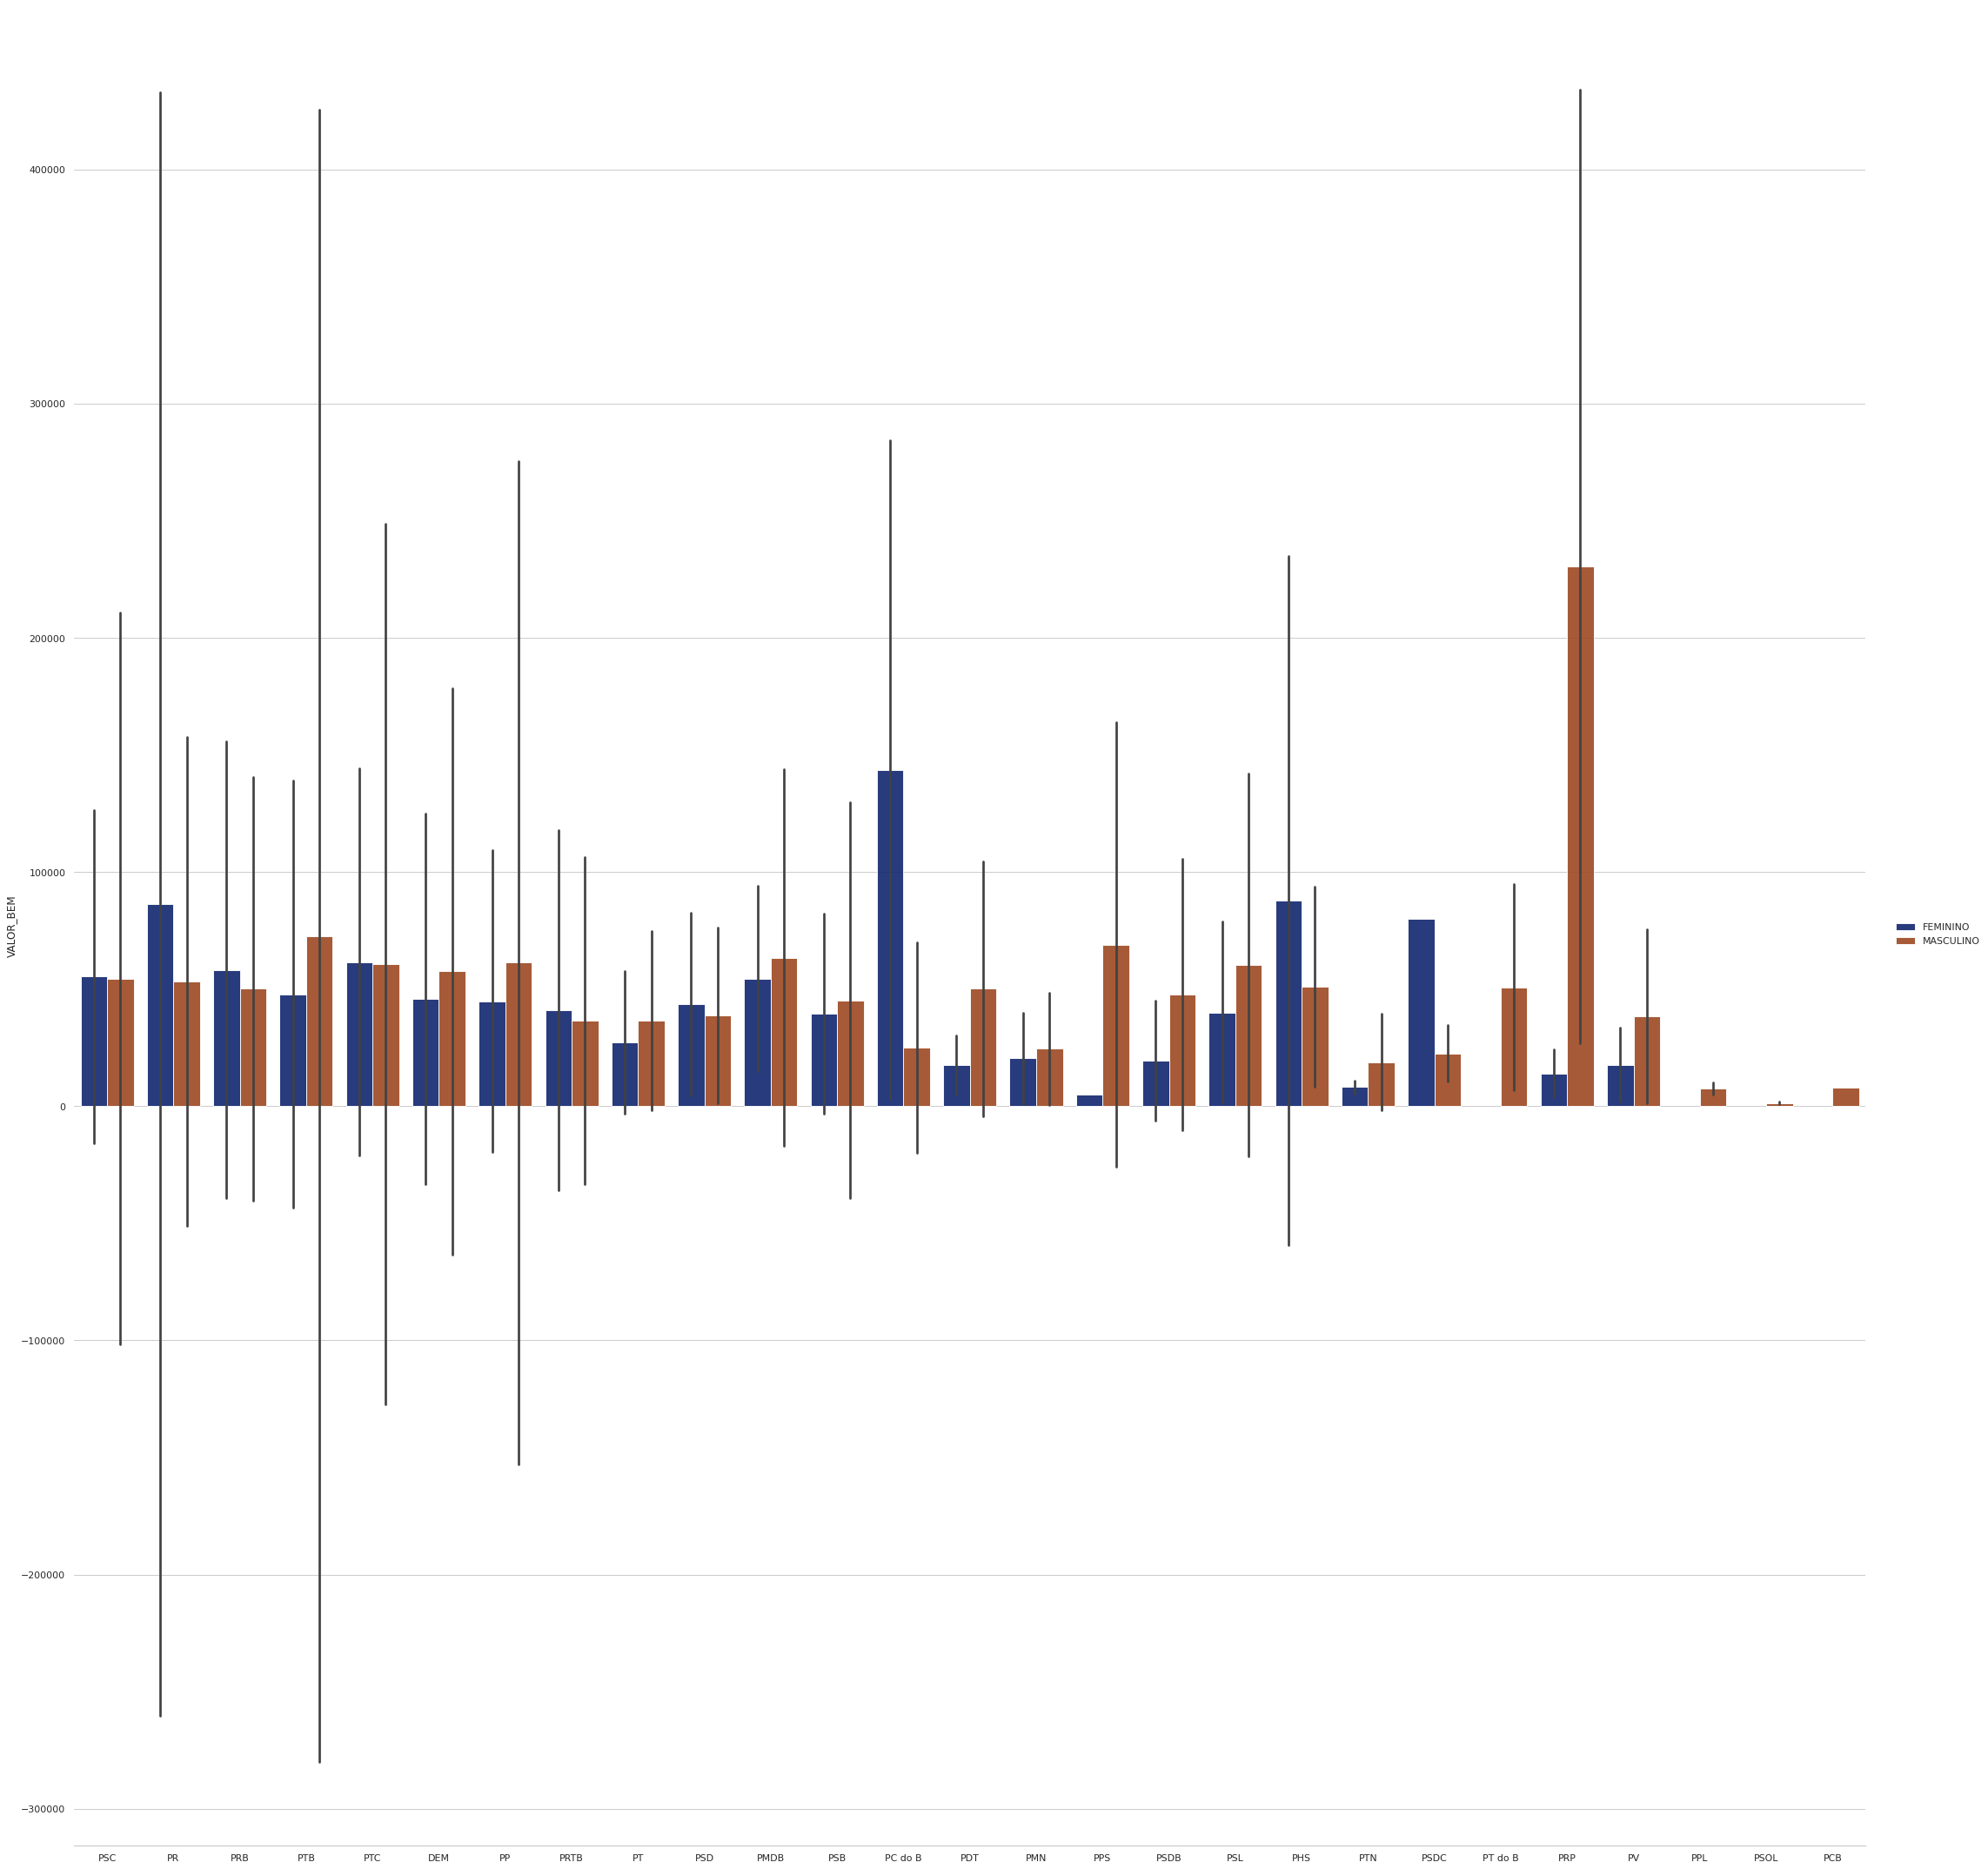

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=bem_candidato_direita_2012, kind="bar",
    x="SIGLA_PARTIDO", y="VALOR_BEM", hue="DESCRICAO_SEXO",
    ci="sd", palette="dark", alpha=.9, height=30
)
g.despine(left=True)
g.set_axis_labels("", "VALOR_BEM")
g.legend.set_title("")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

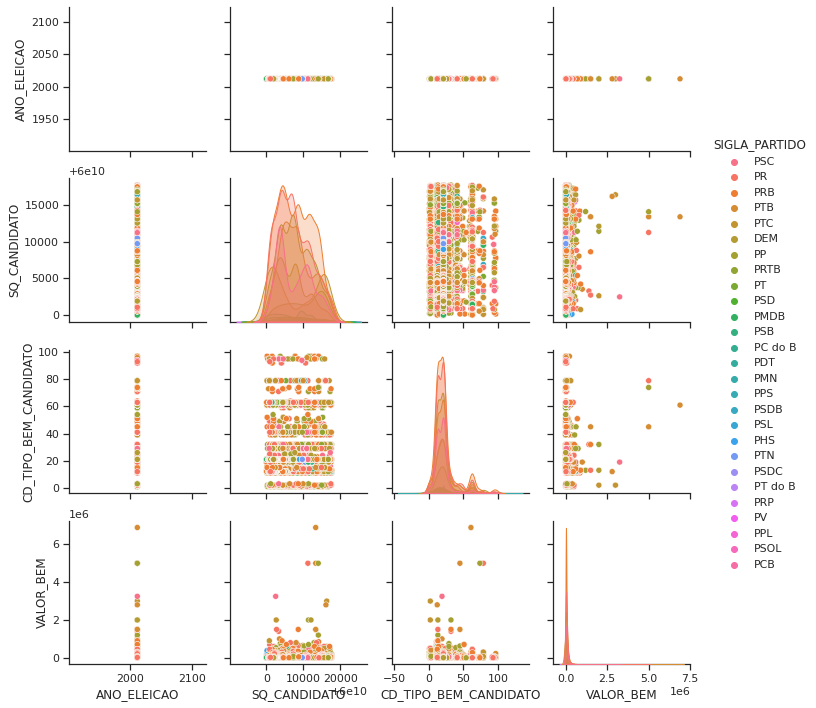

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(bem_candidato_direita_2012, hue="SIGLA_PARTIDO")

### Direita

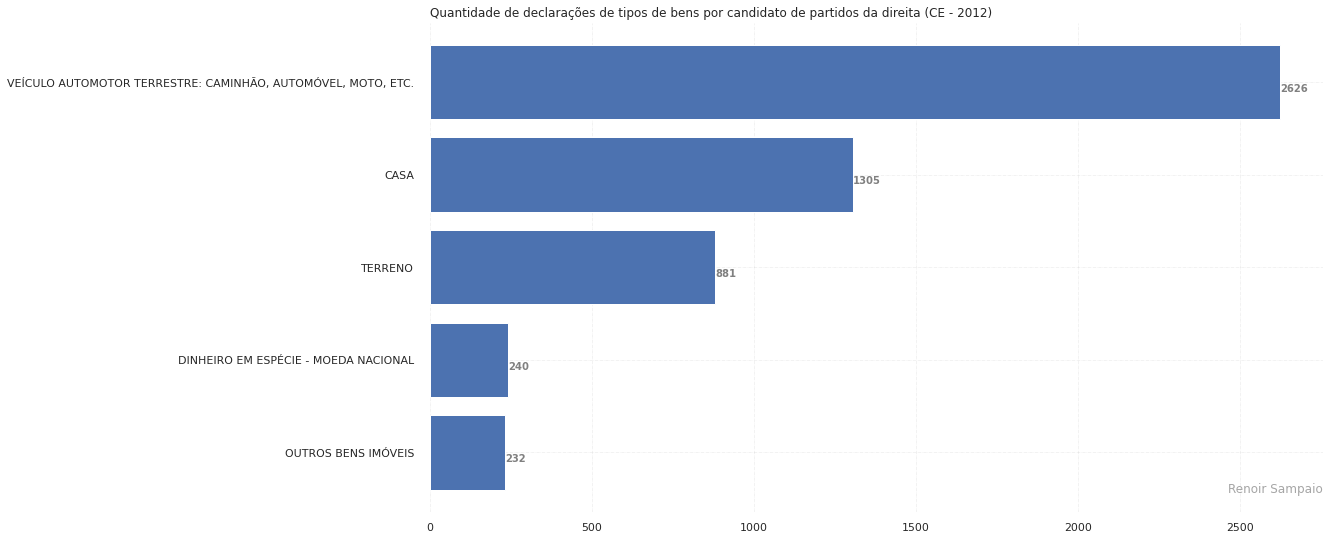

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de direita 2012')

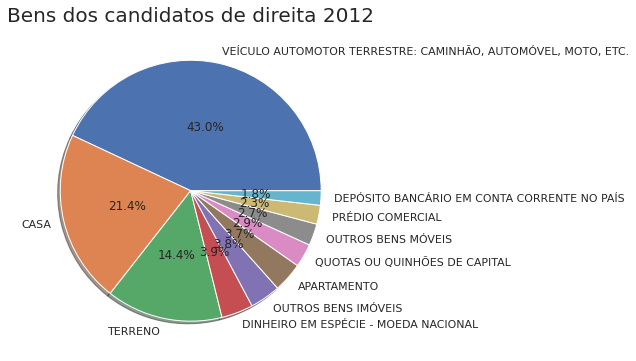

In [ ]:
v = bem_candidato_direita_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_direita_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcd2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcd2012.columns.values
plt.pie(x = bcd2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de direita 2012", fontsize=20)

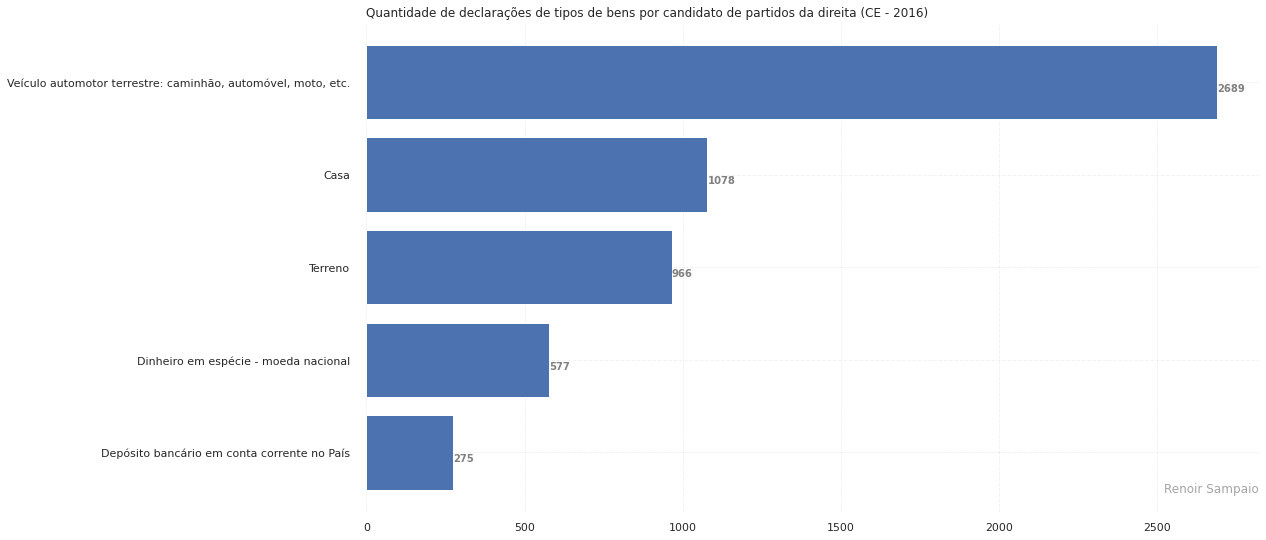

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de direita 2016')

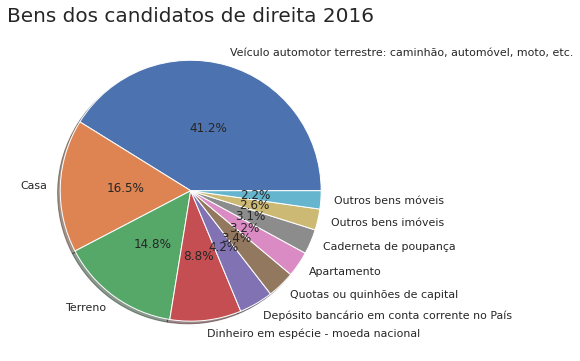

In [ ]:
v = bem_candidato_direita_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_direita_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcd2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcd2016.columns.values
plt.pie(x = bcd2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de direita 2016", fontsize=20)

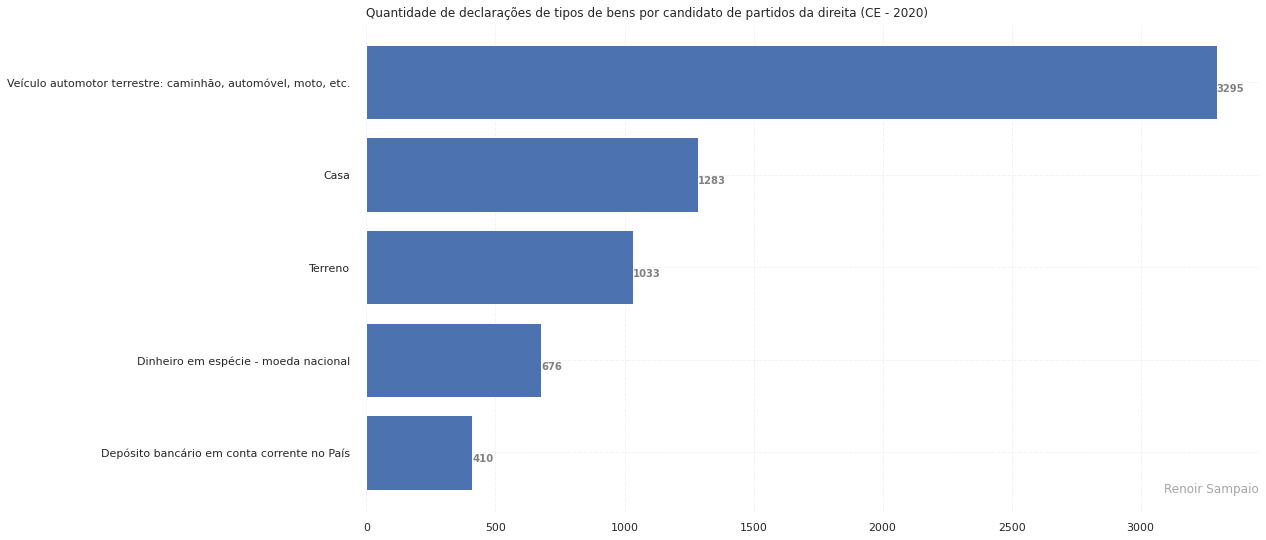

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de direita 2020')

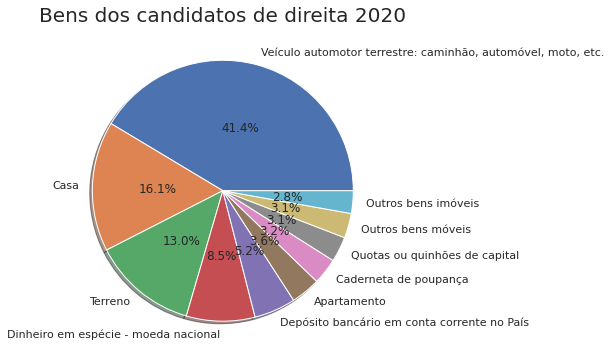

In [ ]:
v = bem_candidato_direita_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_direita_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcd2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcd2020.columns.values
plt.pie(x = bcd2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de direita 2020", fontsize=20)

### Centro

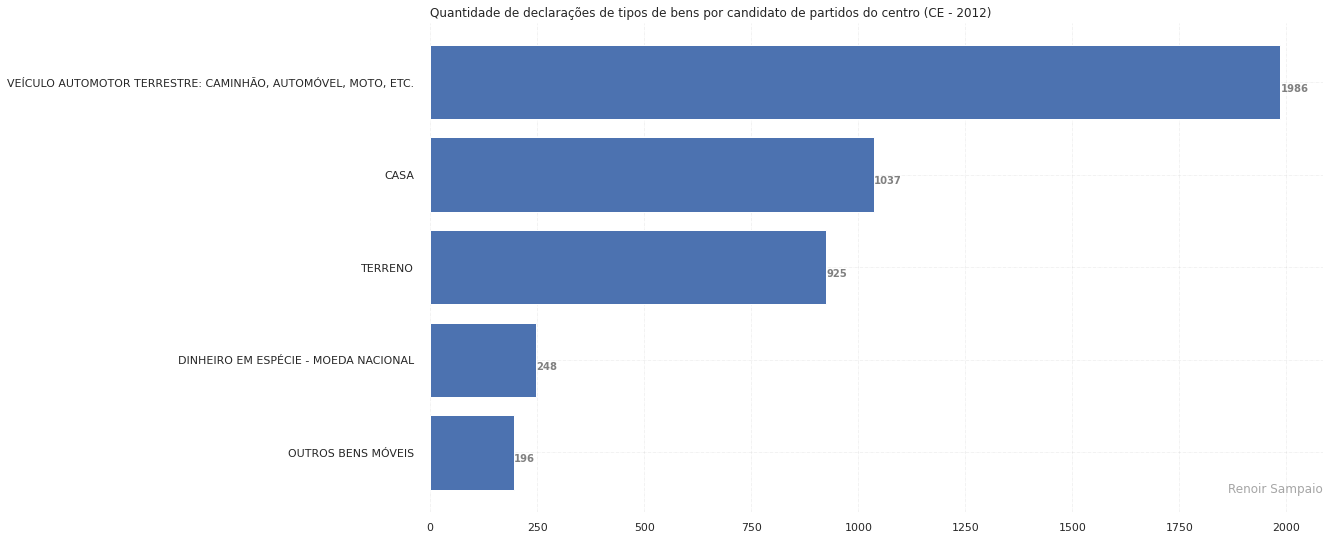

In [ ]:
tips = pd.DataFrame(bem_candidato_centro_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos do centro (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de centro 2012')

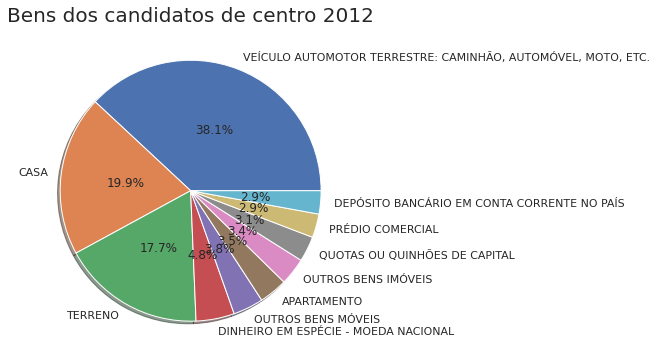

In [ ]:
v = bem_candidato_centro_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_centro_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcc2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcc2012.columns.values
plt.pie(x = bcc2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de centro 2012", fontsize=20)

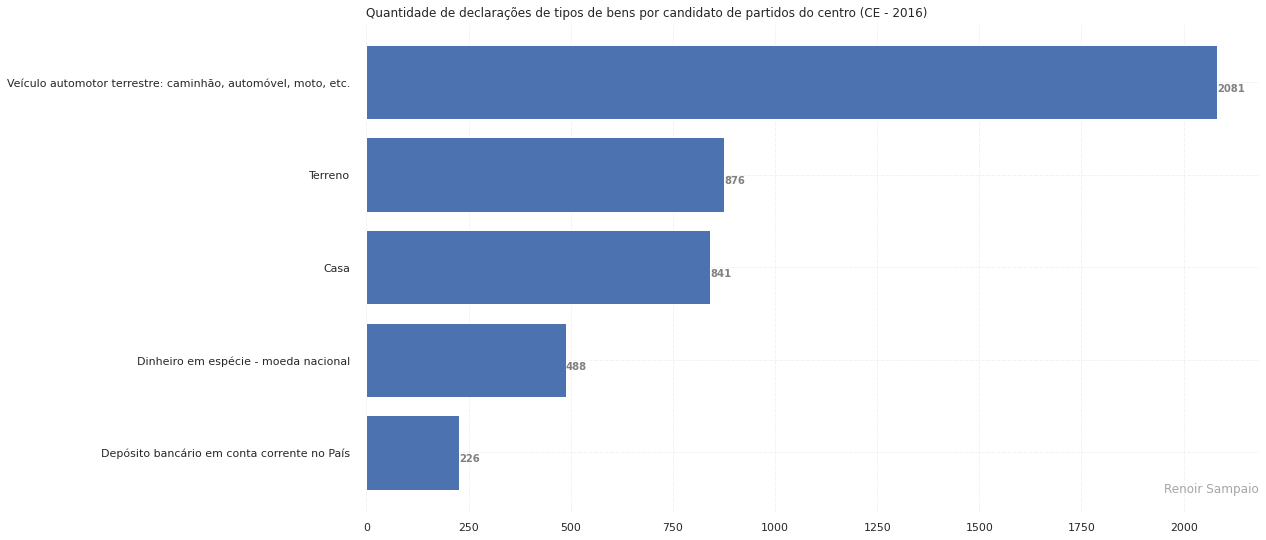

In [ ]:
tips = pd.DataFrame(bem_candidato_centro_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos do centro (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de centro 2016')

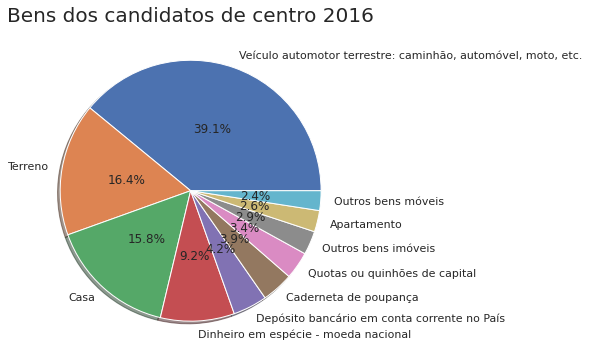

In [ ]:
v = bem_candidato_centro_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_centro_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcc2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcc2016.columns.values
plt.pie(x = bcc2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de centro 2016", fontsize=20)

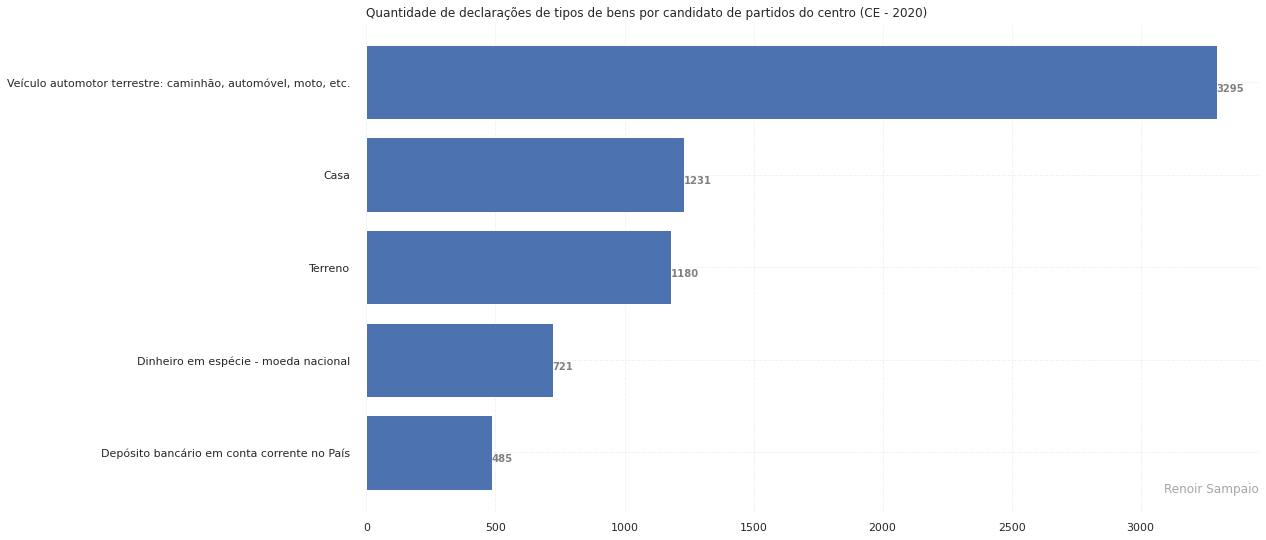

In [ ]:
tips = pd.DataFrame(bem_candidato_centro_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos do centro (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de centro 2020')

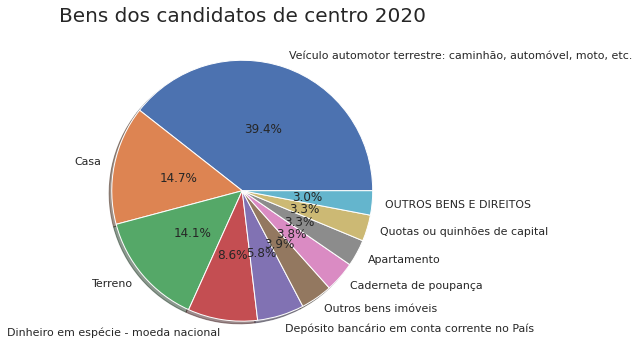

In [ ]:
v = bem_candidato_centro_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_centro_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bcc2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bcc2020.columns.values
plt.pie(x = bcc2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de centro 2020", fontsize=20)

### Esquerda

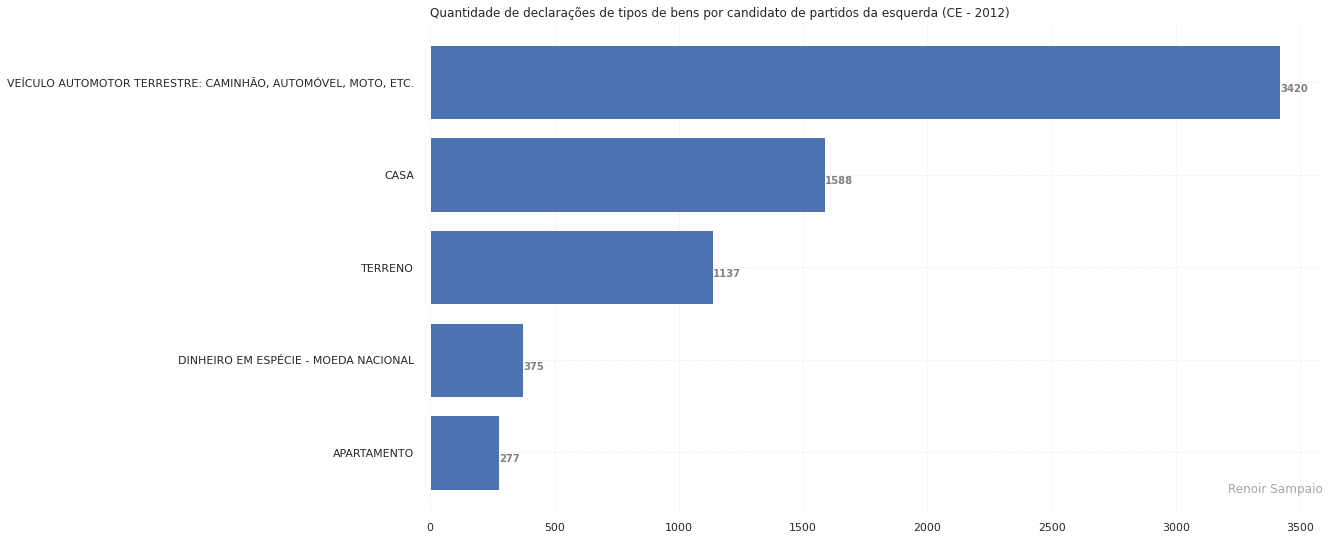

In [ ]:
tips = pd.DataFrame(bem_candidato_esquerda_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da esquerda (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de esquerda 2012')

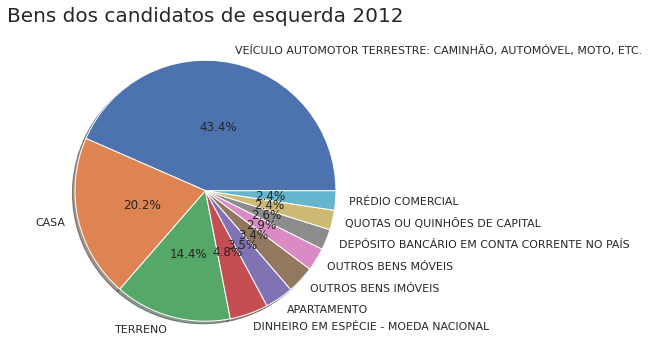

In [ ]:
v = bem_candidato_esquerda_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_esquerda_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bce2012 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bce2012.columns.values
plt.pie(x = bce2012.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de esquerda 2012", fontsize=20)

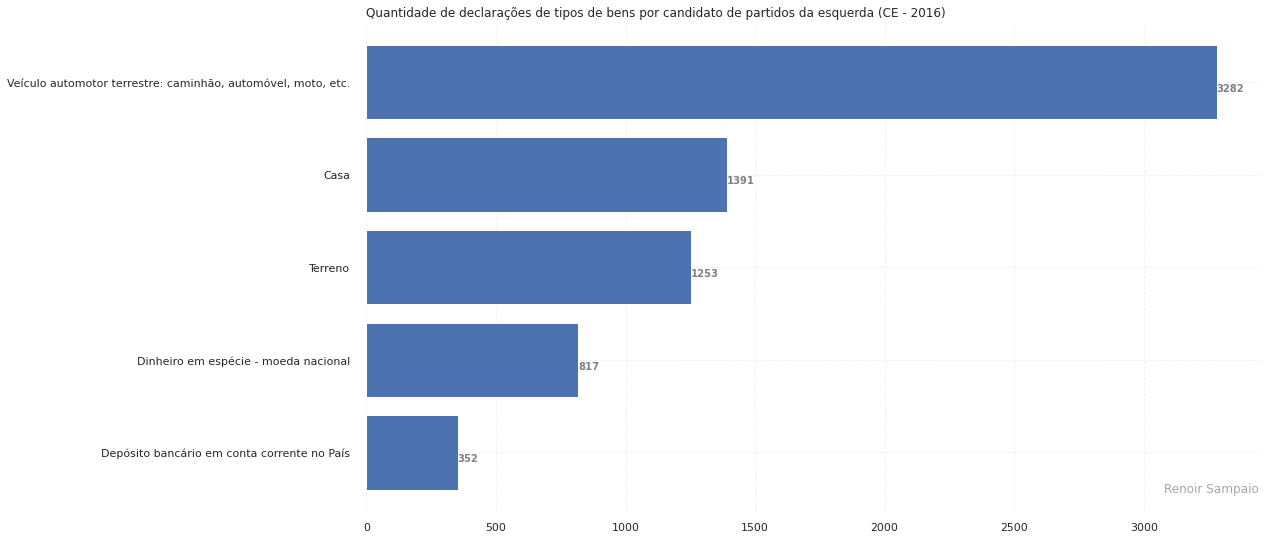

In [ ]:
tips = pd.DataFrame(bem_candidato_esquerda_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da esquerda (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de esquerda 2016')

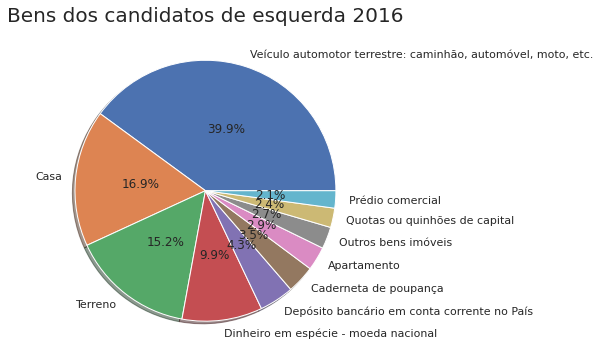

In [ ]:
v = bem_candidato_esquerda_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_esquerda_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bce2016 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bce2016.columns.values
plt.pie(x = bce2016.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de esquerda 2016", fontsize=20)

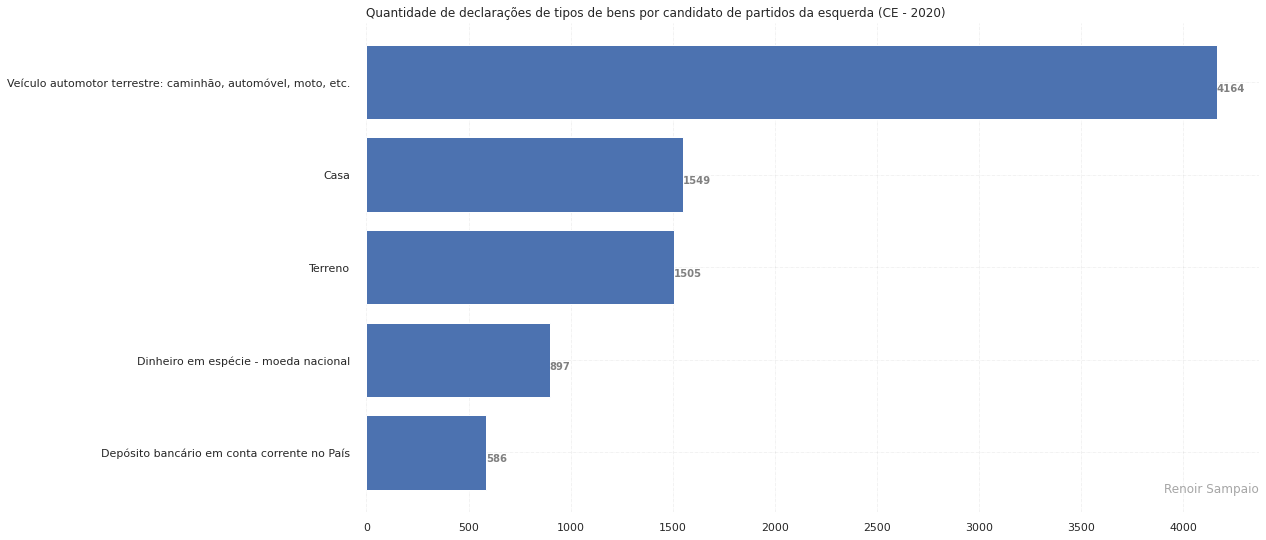

In [ ]:
tips = pd.DataFrame(bem_candidato_esquerda_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da esquerda (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

Text(0.5, 1.0, 'Bens dos candidatos de esquerda 2020')

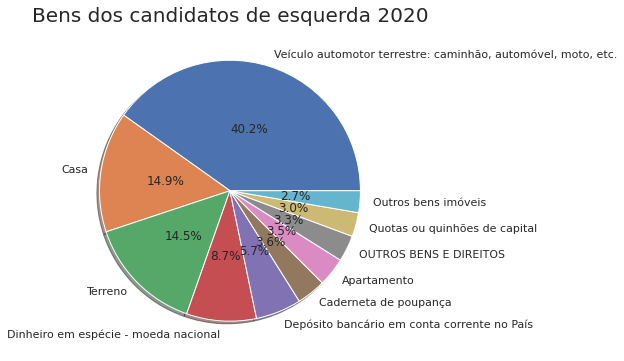

In [ ]:
v = bem_candidato_esquerda_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).values
i = bem_candidato_esquerda_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(10).index
bce2020 = pd.DataFrame(np.array([v]), columns = i)
pie, ax = plt.subplots(figsize=[10,6])
labels = bce2020.columns.values
plt.pie(x = bce2020.head(1).values[0], autopct = "%.1f%%", labels = labels, pctdistance = 0.5, shadow=True)
plt.title("Bens dos candidatos de esquerda 2020", fontsize=20)

# Comparando gráficos dos candidatos por partido, ELEITO E NÃO ELEITO (12, 16, 20)

### Direita

In [ ]:
# Selecionando bens dos candidatos eleitos da direita
bem_candidato_direita_eleito_2012 = bem_candidato_direita_2012.loc[(bem_candidato_direita_2012['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_direita_2012['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_direita_2012['SIT_CANDIDATO'] == 'ELEITO')]
bem_candidato_direita_eleito_2016 = bem_candidato_direita_2016.loc[(bem_candidato_direita_2016['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_direita_2016['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_direita_2016['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_direita_2016['SIT_CANDIDATO'] == '2º TURNO')]
bem_candidato_direita_eleito_2020 = bem_candidato_direita_2020.loc[(bem_candidato_direita_2020['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_direita_2020['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_direita_2020['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_direita_2020['SIT_CANDIDATO'] == '2º TURNO')]

# Selecionando bens dos candidatos diferente de eleitos da direita
bem_candidato_direita_neleito_2012 = bem_candidato_direita_2012.loc[(bem_candidato_direita_2012['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_direita_2012['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_direita_2012['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_direita_neleito_2016 = bem_candidato_direita_2016.loc[(bem_candidato_direita_2016['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_direita_2016['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_direita_2016['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_direita_neleito_2020 = bem_candidato_direita_2020.loc[(bem_candidato_direita_2020['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_direita_2020['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_direita_2020['SIT_CANDIDATO'] == '#NULO#')]

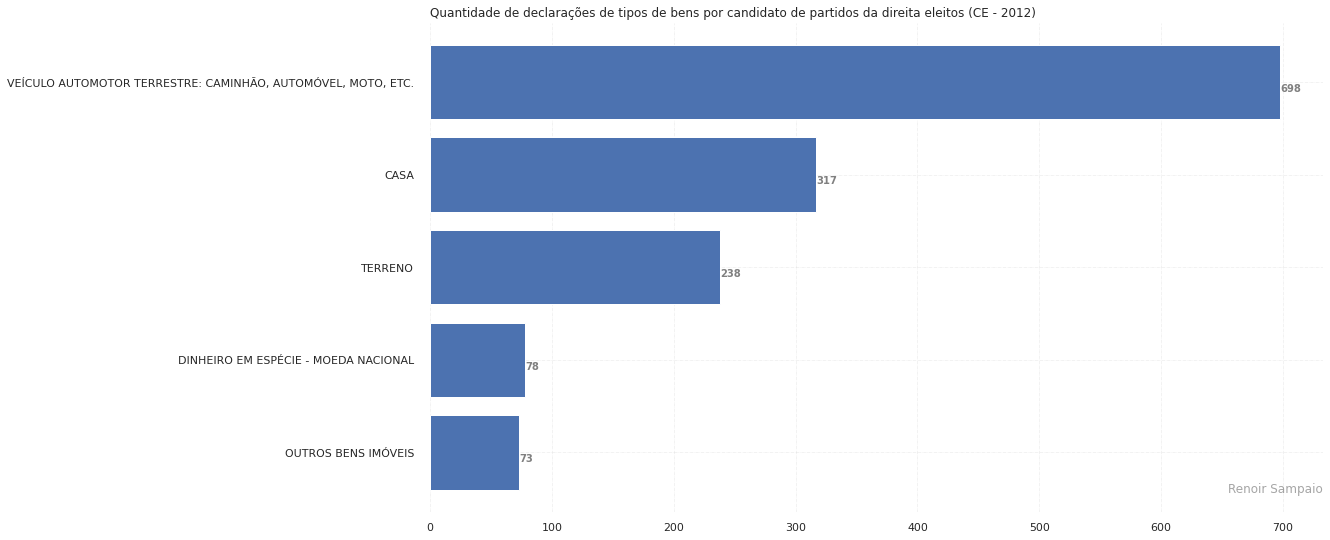

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_eleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita eleitos (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

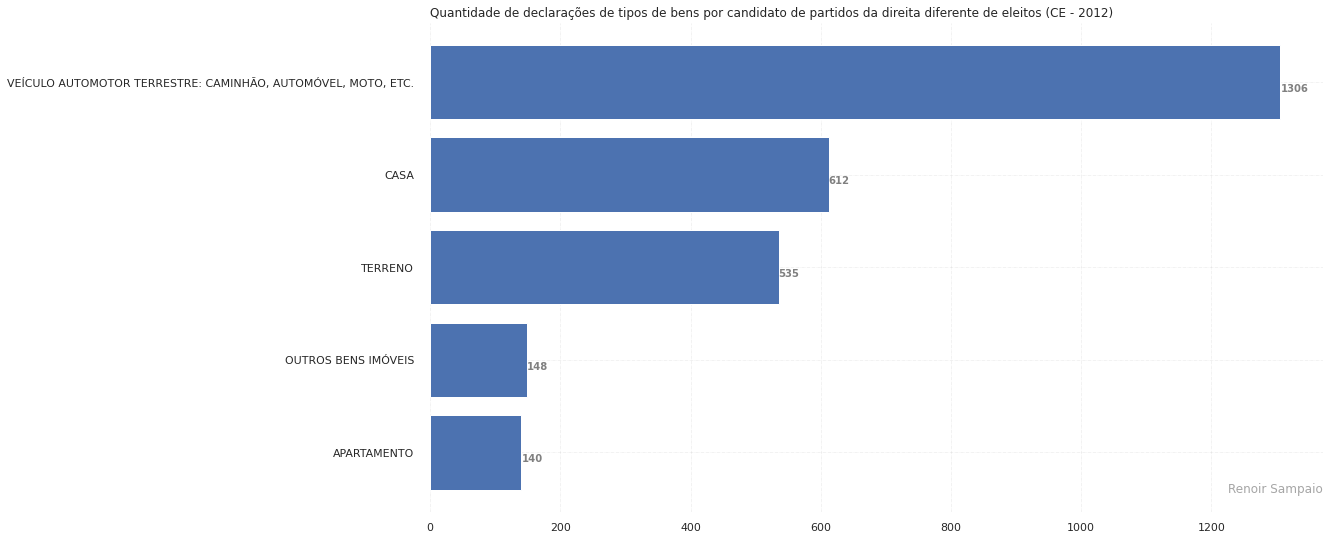

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_neleito_2012['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita diferente de eleitos (CE - 2012)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

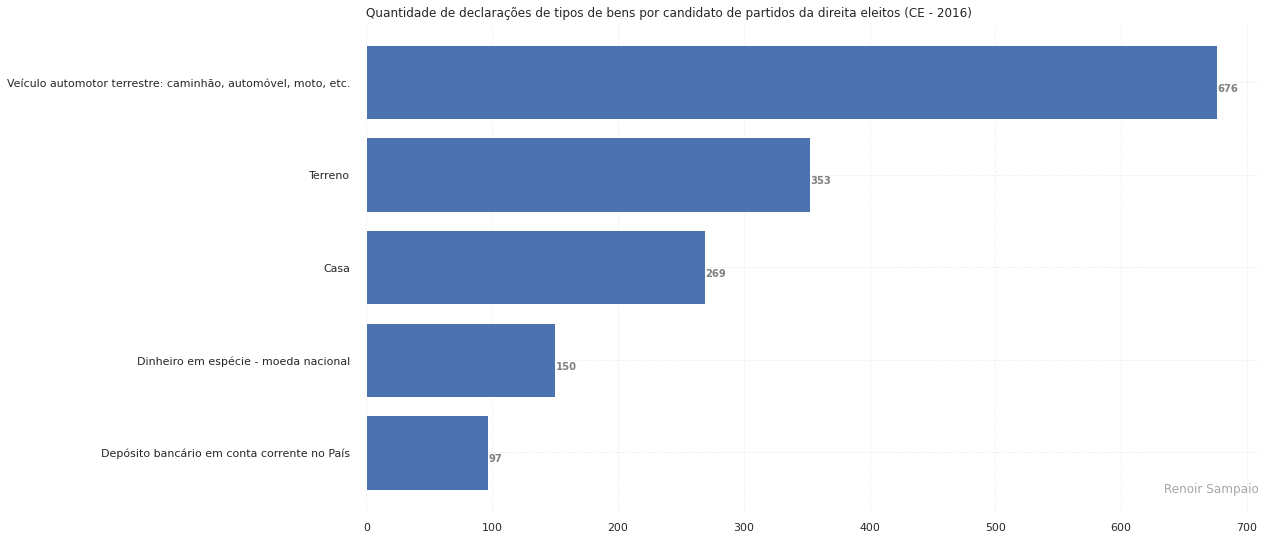

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_eleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita eleitos (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

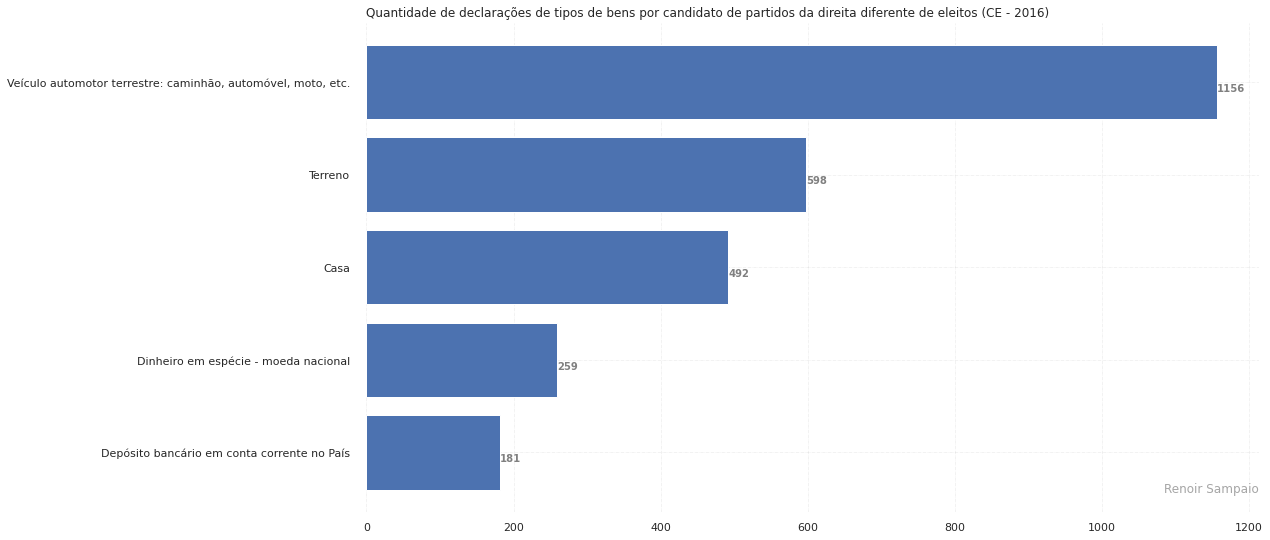

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_neleito_2016['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita diferente de eleitos (CE - 2016)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

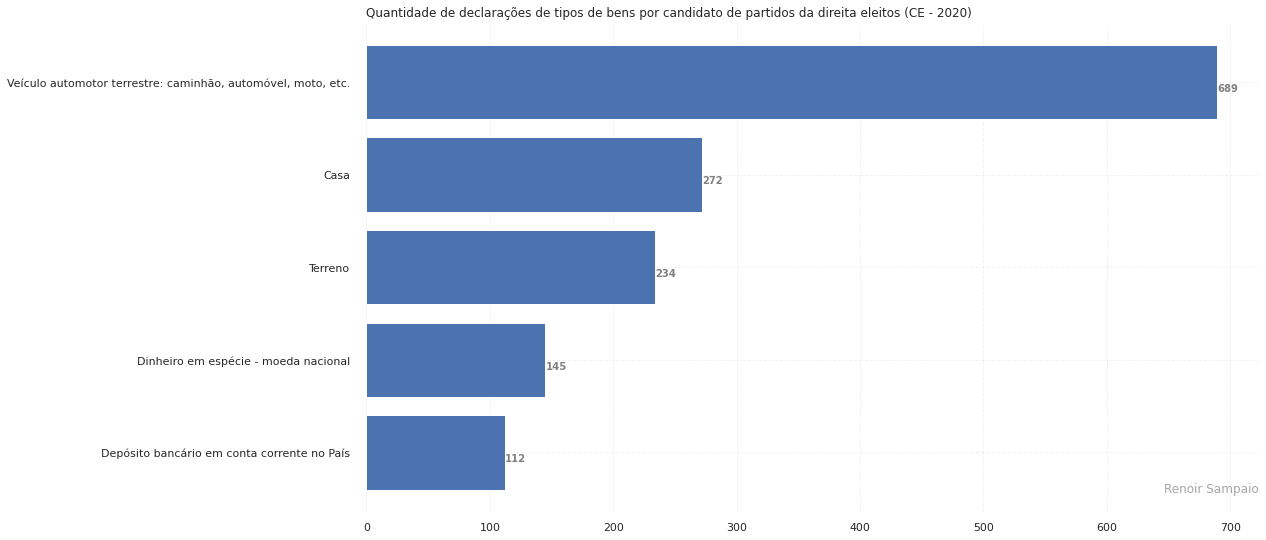

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita eleitos (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

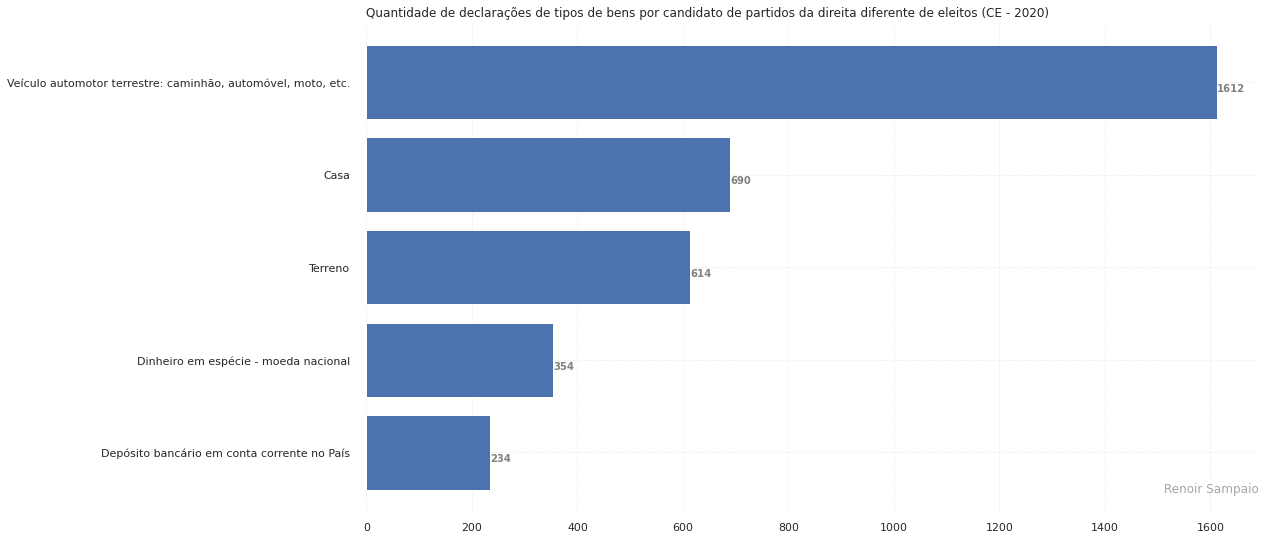

In [ ]:
tips = pd.DataFrame(bem_candidato_direita_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da direita diferente de eleitos (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

### Esquerda

In [ ]:
# Selecionando bens dos candidatos eleitos da esquerda
bem_candidato_esquerda_eleito_2012 = bem_candidato_esquerda_2012.loc[(bem_candidato_esquerda_2012['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_esquerda_2012['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_esquerda_2012['SIT_CANDIDATO'] == 'ELEITO')]
bem_candidato_esquerda_eleito_2016 = bem_candidato_esquerda_2016.loc[(bem_candidato_esquerda_2016['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_esquerda_2016['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_esquerda_2016['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_esquerda_2016['SIT_CANDIDATO'] == '2º TURNO')]
bem_candidato_esquerda_eleito_2020 = bem_candidato_esquerda_2020.loc[(bem_candidato_esquerda_2020['SIT_CANDIDATO'] == 'ELEITO POR QP') | (bem_candidato_esquerda_2020['SIT_CANDIDATO'] == 'ELEITO POR MÉDIA') | (bem_candidato_esquerda_2020['SIT_CANDIDATO'] == 'ELEITO') | (bem_candidato_esquerda_2020['SIT_CANDIDATO'] == '2º TURNO')]

# Selecionando bens dos candidatos diferente de eleitos da esquerda
bem_candidato_esquerda_neleito_2012 = bem_candidato_esquerda_2012.loc[(bem_candidato_esquerda_2012['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_esquerda_2012['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_esquerda_2012['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_esquerda_neleito_2016 = bem_candidato_esquerda_2016.loc[(bem_candidato_esquerda_2016['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_esquerda_2016['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_esquerda_2016['SIT_CANDIDATO'] == '#NULO#')]
bem_candidato_esquerda_neleito_2020 = bem_candidato_esquerda_2020.loc[(bem_candidato_esquerda_2020['SIT_CANDIDATO'] != 'SUPLENTE') | (bem_candidato_esquerda_2020['SIT_CANDIDATO'] == 'NÃO ELEITO') | (bem_candidato_esquerda_2020['SIT_CANDIDATO'] == '#NULO#')]

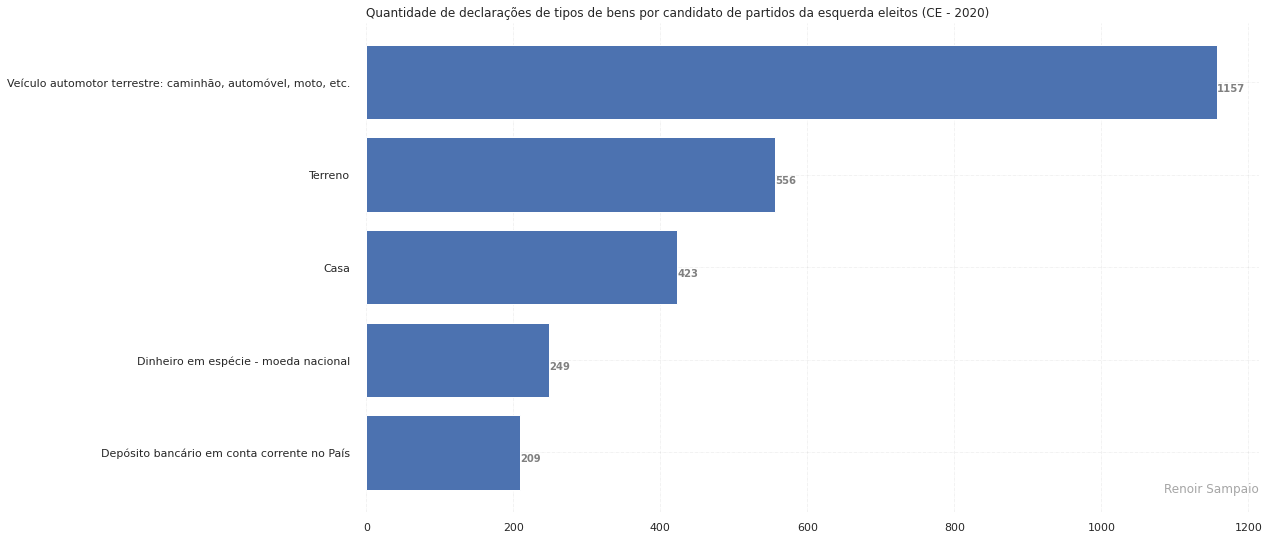

In [ ]:
tips = pd.DataFrame(bem_candidato_esquerda_eleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da esquerda eleitos (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

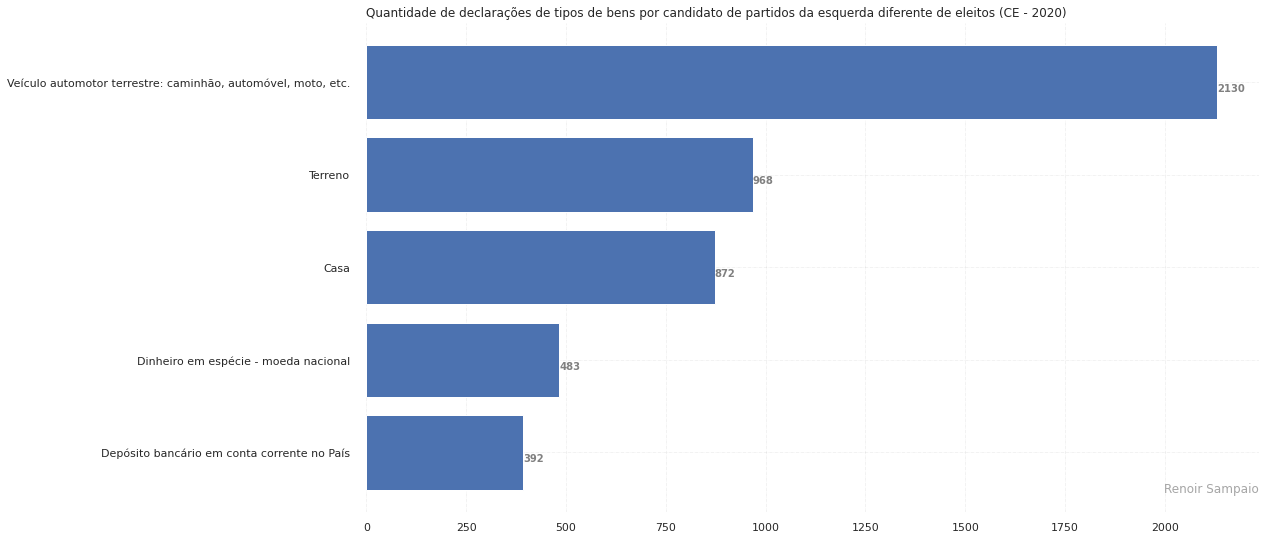

In [ ]:
tips = pd.DataFrame(bem_candidato_esquerda_neleito_2020['DS_TIPO_BEM_CANDIDATO'].value_counts().head(5))
tips_index = pd.array(tips.index)
tips_values = np.concatenate(np.array(tips.values), axis = 0)
df_tips = pd.DataFrame({"Tipo de Bem": tips_index, "Qtd de Candidatos": tips_values})
bem = df_tips['Tipo de Bem']
qtd = df_tips['Qtd de Candidatos']

fig, ax = plt.subplots(figsize = (16, 9))

ax.barh(bem, qtd)

for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

ax.set_title('Quantidade de declarações de tipos de bens por candidato de partidos da esquerda diferente de eleitos (CE - 2020)',
			loc ='left', )

fig.text(0.9, 0.15, 'Renoir Sampaio', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

plt.show()

# Média e mediana dos valores dos bens (ano, sexo, resultados eleitorais, localidade, espectro político)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.options.display.float_format = "{:,.2f}".format

### 2012

In [ ]:
print('Média do valor dos bens de TODOS os candidatos: ', bem_candidato_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens de TODOS os candidatos: ', bem_candidato_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens de TODOS os candidatos da DIREITA: ', bem_candidato_direita_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens de TODOS os candidatos da DIREITA: ', bem_candidato_direita_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens de TODOS os candidatos da ESQUERDA: ', bem_candidato_esquerda_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens de TODOS os candidatos da ESQUERDA: ', bem_candidato_esquerda_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens de TODOS os candidatos do CENTRO: ', bem_candidato_centro_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens de TODOS os candidatos do CENTRO: ', bem_candidato_centro_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL: ', bem_candidato_capital_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL: ', bem_candidato_capital_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR: ', bem_candidato_interior_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR: ', bem_candidato_interior_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS: ', bem_candidato_capital_eleito_feminino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS: ', bem_candidato_capital_eleito_feminino_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS: ', bem_candidato_interior_eleito_feminino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS: ', bem_candidato_interior_eleito_feminino_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS: ', bem_candidato_capital_neleito_feminino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS: ', bem_candidato_capital_neleito_feminino_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS: ', bem_candidato_interior_neleito_feminino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS: ', bem_candidato_interior_neleito_feminino_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_masculino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_masculino_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_masculino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_masculino_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_masculino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_masculino_2012['VALOR_BEM'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_masculino_2012['VALOR_BEM'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_masculino_2012['VALOR_BEM'].median())

l1 = ['Valor dos bens de TODOS os candidatos', bem_candidato_2012['VALOR_BEM'].mean(), bem_candidato_2012['VALOR_BEM'].median()]
l2 = ['Valor dos bens de TODOS os candidatos da DIREITA', bem_candidato_direita_2012['VALOR_BEM'].mean(), bem_candidato_direita_2012['VALOR_BEM'].median()]
l3 = ['Valor dos bens de TODOS os candidatos da ESQUERDA', bem_candidato_esquerda_2012['VALOR_BEM'].mean(), bem_candidato_esquerda_2012['VALOR_BEM'].median()]
l4 = ['Valor dos bens de TODOS os candidatos do CENTRO', bem_candidato_centro_2012['VALOR_BEM'].mean(), bem_candidato_centro_2012['VALOR_BEM'].median()]
l5 = ['Valor dos bens dos CANDIDATOS DA CAPITAL', bem_candidato_capital_2012['VALOR_BEM'].mean(), bem_candidato_capital_2012['VALOR_BEM'].median()]
l6 = ['Valor dos bens dos CANDIDATOS DO INTERIOR', bem_candidato_interior_2012['VALOR_BEM'].mean(), bem_candidato_interior_2012['VALOR_BEM'].median()]
l8 = ['Valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS', bem_candidato_capital_neleito_2012['VALOR_BEM'].mean(), bem_candidato_capital_neleito_2012['VALOR_BEM'].median()]
l9 = ['Valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS', bem_candidato_interior_eleito_2012['VALOR_BEM'].mean(), bem_candidato_interior_eleito_2012['VALOR_BEM'].median()]
l10 = ['valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS', bem_candidato_interior_neleito_2012['VALOR_BEM'].mean(), bem_candidato_interior_neleito_2012['VALOR_BEM'].median()]
l7 = ['Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS', bem_candidato_capital_eleito_2012['VALOR_BEM'].mean(), bem_candidato_capital_eleito_2012['VALOR_BEM'].median()]
l11 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS', bem_candidato_capital_eleito_feminino_2012['VALOR_BEM'].mean(), bem_candidato_capital_eleito_feminino_2012['VALOR_BEM'].median()]
l12 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS', bem_candidato_interior_eleito_feminino_2012['VALOR_BEM'].mean(), bem_candidato_interior_eleito_feminino_2012['VALOR_BEM'].median()]
l13 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS', bem_candidato_capital_neleito_feminino_2012['VALOR_BEM'].mean(), bem_candidato_capital_neleito_feminino_2012['VALOR_BEM'].median()]
l14 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS', bem_candidato_interior_neleito_feminino_2012['VALOR_BEM'].mean(), bem_candidato_interior_neleito_feminino_2012['VALOR_BEM'].median()]
l15 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS', bem_candidato_capital_eleito_masculino_2012['VALOR_BEM'].mean(), bem_candidato_capital_eleito_masculino_2012['VALOR_BEM'].median()]
l16 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS', bem_candidato_interior_eleito_masculino_2012['VALOR_BEM'].mean(), bem_candidato_interior_eleito_masculino_2012['VALOR_BEM'].median()]
l17 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS', bem_candidato_capital_neleito_masculino_2012['VALOR_BEM'].mean(), bem_candidato_capital_neleito_masculino_2012['VALOR_BEM'].median()]
l18 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS', bem_candidato_interior_neleito_masculino_2012['VALOR_BEM'].mean(), bem_candidato_interior_neleito_masculino_2012['VALOR_BEM'].median()]
MM_valores2012 = pd.DataFrame(np.array([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18]), columns=['Medida', 'Média', 'Mediana'])

Média do valor dos bens de TODOS os candidatos:  54924.039665314565
Mediana do valor dos bens de TODOS os candidatos:  21700.05

Média do valor dos bens de TODOS os candidatos da DIREITA:  56298.94892590976
Mediana do valor dos bens de TODOS os candidatos da DIREITA:  23000.0

Média do valor dos bens de TODOS os candidatos da ESQUERDA:  51073.80480040826
Mediana do valor dos bens de TODOS os candidatos da ESQUERDA:  20000.0

Média do valor dos bens de TODOS os candidatos do CENTRO:  59325.917823268464
Mediana do valor dos bens de TODOS os candidatos do CENTRO:  25000.0

Média do valor dos bens dos CANDIDATOS DA CAPITAL:  76445.58917041477
Mediana do valor dos bens dos CANDIDATOS DA CAPITAL:  30000.0

Média do valor dos bens dos CANDIDATOS DO INTERIOR:  52936.10537367869
Mediana do valor dos bens dos CANDIDATOS DO INTERIOR:  20000.0

Média do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS:  57664.54036199097
Mediana do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS:  30000.0

Média 

In [ ]:
MM_valores2012

Medida               Média  \
0               Valor dos bens de TODOS os candidatos  54924.039665314565   
1    Valor dos bens de TODOS os candidatos da DIREITA   56298.94892590976   
2   Valor dos bens de TODOS os candidatos da ESQUERDA   51073.80480040826   
3     Valor dos bens de TODOS os candidatos do CENTRO  59325.917823268464   
4            Valor dos bens dos CANDIDATOS DA CAPITAL   76445.58917041477   
5           Valor dos bens dos CANDIDATOS DO INTERIOR   52936.10537367869   
6    Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS   57664.54036199097   
7   Valor dos bens dos CANDIDATOS DA CAPITAL NÃO E...   77121.14353909466   
8   Valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS    53495.4203277959   
9   valor dos bens dos CANDIDATOS DO INTERIOR NÃO ...  63496.960412706365   
10  Valor dos bens apenas das CANDIDATAS (FEMININO...   69318.86264705882   
11  Valor dos bens apenas das CANDIDATAS (FEMININO...    50358.5387276551   
12  Valor dos bens apenas das CANDIDATAS (FEMININO...   67297.65776699029   
13  Valor dos bens apenas das CANDIDATAS (FEMININO...    55514.9836969001   
14  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   55545.57267379679   
15  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   54010.56009670175   
16  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   78737.46787539938   
17  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   64853.24244927824   

      Mediana  
0    21700.05  
1     23000.0  
2     20000.0  
3     25000.0  
4     30000.0  
5     20000.0  
6     30000.0  
7    29680.57  
8     25000.0  
9     25000.0  
10    37500.0  
11    25000.0  
12    34200.0  
13    25000.0  
14   29680.57  
15    25000.0  
16  27428.965  
17    25000.0

### 2016

In [ ]:
print('Média do valor dos bens de TODOS os candidatos: ', bem_candidato_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos: ', bem_candidato_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens de TODOS os candidatos da DIREITA: ', bem_candidato_direita_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos da DIREITA: ', bem_candidato_direita_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens de TODOS os candidatos da ESQUERDA: ', bem_candidato_esquerda_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos da ESQUERDA: ', bem_candidato_esquerda_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens de TODOS os candidatos do CENTRO: ', bem_candidato_centro_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos do CENTRO: ', bem_candidato_centro_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL: ', bem_candidato_capital_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL: ', bem_candidato_capital_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR: ', bem_candidato_interior_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR: ', bem_candidato_interior_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS: ', bem_candidato_capital_eleito_feminino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS: ', bem_candidato_capital_eleito_feminino_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS: ', bem_candidato_interior_eleito_feminino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS: ', bem_candidato_interior_eleito_feminino_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS: ', bem_candidato_capital_neleito_feminino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS: ', bem_candidato_capital_neleito_feminino_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS: ', bem_candidato_interior_neleito_feminino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS: ', bem_candidato_interior_neleito_feminino_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_masculino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_masculino_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_masculino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_masculino_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_masculino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_masculino_2016['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_masculino_2016['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_masculino_2016['VR_BEM_CANDIDATO'].median())

l1 = ['Valor dos bens de TODOS os candidatos', bem_candidato_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_2016['VR_BEM_CANDIDATO'].median()]
l2 = ['Valor dos bens de TODOS os candidatos da DIREITA', bem_candidato_direita_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_direita_2016['VR_BEM_CANDIDATO'].median()]
l3 = ['Valor dos bens de TODOS os candidatos da ESQUERDA', bem_candidato_esquerda_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_esquerda_2016['VR_BEM_CANDIDATO'].median()]
l4 = ['Valor dos bens de TODOS os candidatos do CENTRO', bem_candidato_centro_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_centro_2016['VR_BEM_CANDIDATO'].median()]
l5 = ['Valor dos bens dos CANDIDATOS DA CAPITAL', bem_candidato_capital_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_2016['VR_BEM_CANDIDATO'].median()]
l6 = ['Valor dos bens dos CANDIDATOS DO INTERIOR', bem_candidato_interior_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_2016['VR_BEM_CANDIDATO'].median()]
l8 = ['Valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS', bem_candidato_capital_neleito_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_neleito_2016['VR_BEM_CANDIDATO'].median()]
l9 = ['Valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS', bem_candidato_interior_eleito_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_eleito_2016['VR_BEM_CANDIDATO'].median()]
l10 = ['valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS', bem_candidato_interior_neleito_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_neleito_2016['VR_BEM_CANDIDATO'].median()]
l7 = ['Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS', bem_candidato_capital_eleito_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_eleito_2016['VR_BEM_CANDIDATO'].median()]
l11 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS', bem_candidato_capital_eleito_feminino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_eleito_feminino_2016['VR_BEM_CANDIDATO'].median()]
l12 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS', bem_candidato_interior_eleito_feminino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_eleito_feminino_2016['VR_BEM_CANDIDATO'].median()]
l13 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS', bem_candidato_capital_neleito_feminino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_neleito_feminino_2016['VR_BEM_CANDIDATO'].median()]
l14 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS', bem_candidato_interior_neleito_feminino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_neleito_feminino_2016['VR_BEM_CANDIDATO'].median()]
l15 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS', bem_candidato_capital_eleito_masculino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_eleito_masculino_2016['VR_BEM_CANDIDATO'].median()]
l16 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS', bem_candidato_interior_eleito_masculino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_eleito_masculino_2016['VR_BEM_CANDIDATO'].median()]
l17 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS', bem_candidato_capital_neleito_masculino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_neleito_masculino_2016['VR_BEM_CANDIDATO'].median()]
l18 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS', bem_candidato_interior_neleito_masculino_2016['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_neleito_masculino_2016['VR_BEM_CANDIDATO'].median()]
MM_valores2016 = pd.DataFrame(np.array([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18]), columns=['Medida', 'Média', 'Mediana'])

Média do valor dos bens de TODOS os candidatos:  64953.33905817384
Mediana do valor dos bens de TODOS os candidatos:  20000.0

Média do valor dos bens de TODOS os candidatos da DIREITA:  60935.02197487507
Mediana do valor dos bens de TODOS os candidatos da DIREITA:  20000.0

Média do valor dos bens de TODOS os candidatos da ESQUERDA:  58393.287661046255
Mediana do valor dos bens de TODOS os candidatos da ESQUERDA:  20000.0

Média do valor dos bens de TODOS os candidatos do CENTRO:  70983.11421607377
Mediana do valor dos bens de TODOS os candidatos do CENTRO:  20000.0

Média do valor dos bens dos CANDIDATOS DA CAPITAL:  88562.67697770862
Mediana do valor dos bens dos CANDIDATOS DA CAPITAL:  25500.0

Média do valor dos bens dos CANDIDATOS DO INTERIOR:  63095.147665347446
Mediana do valor dos bens dos CANDIDATOS DO INTERIOR:  20000.0

Média do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS:  152510.8255471699
Mediana do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS:  42000.0

Média d

In [ ]:
MM_valores2016

Medida               Média  \
0               Valor dos bens de TODOS os candidatos   64953.33905817384   
1    Valor dos bens de TODOS os candidatos da DIREITA   60935.02197487507   
2   Valor dos bens de TODOS os candidatos da ESQUERDA  58393.287661046255   
3     Valor dos bens de TODOS os candidatos do CENTRO   70983.11421607377   
4            Valor dos bens dos CANDIDATOS DA CAPITAL   88562.67697770862   
5           Valor dos bens dos CANDIDATOS DO INTERIOR  63095.147665347446   
6    Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS   152510.8255471699   
7   Valor dos bens dos CANDIDATOS DA CAPITAL NÃO E...   121050.0408122744   
8   Valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS    71824.5949188514   
9   valor dos bens dos CANDIDATOS DO INTERIOR NÃO ...    78361.9459179441   
10  Valor dos bens apenas das CANDIDATAS (FEMININO...   74589.63304347826   
11  Valor dos bens apenas das CANDIDATAS (FEMININO...   52556.18223076924   
12  Valor dos bens apenas das CANDIDATAS (FEMININO...   82212.91990196078   
13  Valor dos bens apenas das CANDIDATAS (FEMININO...   67943.03973427333   
14  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  159916.55871900835   
15  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   74294.20837605633   
16  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  129814.16986725667   
17  Valor dos bens apenas dos CANDIDATOS (MASCULIN...    80009.8113440261   

      Mediana  
0     20000.0  
1     20000.0  
2     20000.0  
3     20000.0  
4     25500.0  
5     20000.0  
6     42000.0  
7     36977.0  
8     25000.0  
9     25000.0  
10    37775.0  
11   21969.78  
12  33582.185  
13    20000.0  
14   42005.36  
15    25000.0  
16  38286.695  
17    25000.0

### 2020

In [ ]:
print('Média do valor dos bens de TODOS os candidatos: ', bem_candidato_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos: ', bem_candidato_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens de TODOS os candidatos da DIREITA: ', bem_candidato_direita_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos da DIREITA: ', bem_candidato_direita_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens de TODOS os candidatos da ESQUERDA: ', bem_candidato_esquerda_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos da ESQUERDA: ', bem_candidato_esquerda_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens de TODOS os candidatos do CENTRO: ', bem_candidato_centro_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens de TODOS os candidatos do CENTRO: ', bem_candidato_centro_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL: ', bem_candidato_capital_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL: ', bem_candidato_capital_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR: ', bem_candidato_interior_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR: ', bem_candidato_interior_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS: ', bem_candidato_capital_eleito_feminino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS: ', bem_candidato_capital_eleito_feminino_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS: ', bem_candidato_interior_eleito_feminino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS: ', bem_candidato_interior_eleito_feminino_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS: ', bem_candidato_capital_neleito_feminino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS: ', bem_candidato_capital_neleito_feminino_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS: ', bem_candidato_interior_neleito_feminino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS: ', bem_candidato_interior_neleito_feminino_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_masculino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS: ', bem_candidato_capital_eleito_masculino_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_masculino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS: ', bem_candidato_interior_eleito_masculino_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_masculino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS: ', bem_candidato_capital_neleito_masculino_2020['VR_BEM_CANDIDATO'].median())
print()
print('Média do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_masculino_2020['VR_BEM_CANDIDATO'].mean())
print('Mediana do valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS: ', bem_candidato_interior_neleito_masculino_2020['VR_BEM_CANDIDATO'].median())

l1 = ['Valor dos bens de TODOS os candidatos', bem_candidato_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_2020['VR_BEM_CANDIDATO'].median()]
l2 = ['Valor dos bens de TODOS os candidatos da DIREITA', bem_candidato_direita_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_direita_2020['VR_BEM_CANDIDATO'].median()]
l3 = ['Valor dos bens de TODOS os candidatos da ESQUERDA', bem_candidato_esquerda_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_esquerda_2020['VR_BEM_CANDIDATO'].median()]
l4 = ['Valor dos bens de TODOS os candidatos do CENTRO', bem_candidato_centro_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_centro_2020['VR_BEM_CANDIDATO'].median()]
l5 = ['Valor dos bens dos CANDIDATOS DA CAPITAL', bem_candidato_capital_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_2020['VR_BEM_CANDIDATO'].median()]
l6 = ['Valor dos bens dos CANDIDATOS DO INTERIOR', bem_candidato_interior_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_2020['VR_BEM_CANDIDATO'].median()]
l7 = ['Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS', bem_candidato_capital_eleito_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_eleito_2020['VR_BEM_CANDIDATO'].median()]
l8 = ['Valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS', bem_candidato_capital_neleito_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_neleito_2020['VR_BEM_CANDIDATO'].median()]
l9 = ['Valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS', bem_candidato_interior_eleito_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_eleito_2020['VR_BEM_CANDIDATO'].median()]
l10 = ['Valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS', bem_candidato_interior_neleito_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_neleito_2020['VR_BEM_CANDIDATO'].median()]
l11 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS', bem_candidato_capital_eleito_feminino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_eleito_feminino_2020['VR_BEM_CANDIDATO'].median()]
l12 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS', bem_candidato_interior_eleito_feminino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_eleito_feminino_2020['VR_BEM_CANDIDATO'].median()]
l13 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS', bem_candidato_capital_neleito_feminino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_neleito_feminino_2020['VR_BEM_CANDIDATO'].median()]
l14 = ['Valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR NÃO ELEITAS', bem_candidato_interior_neleito_feminino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_neleito_feminino_2020['VR_BEM_CANDIDATO'].median()]
l15 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS', bem_candidato_capital_eleito_masculino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_eleito_masculino_2020['VR_BEM_CANDIDATO'].median()]
l16 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR ELEITOS', bem_candidato_interior_eleito_masculino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_eleito_masculino_2020['VR_BEM_CANDIDATO'].median()]
l17 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS', bem_candidato_capital_neleito_masculino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_capital_neleito_masculino_2020['VR_BEM_CANDIDATO'].median()]
l18 = ['Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS', bem_candidato_interior_neleito_masculino_2020['VR_BEM_CANDIDATO'].mean(), bem_candidato_interior_neleito_masculino_2020['VR_BEM_CANDIDATO'].median()]
MM_valores2020 = pd.DataFrame(np.array([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18]), columns=['Medida', 'Média', 'Mediana'])

Média do valor dos bens de TODOS os candidatos:  75957.84520523551
Mediana do valor dos bens de TODOS os candidatos:  22000.0

Média do valor dos bens de TODOS os candidatos da DIREITA:  70550.2917204782
Mediana do valor dos bens de TODOS os candidatos da DIREITA:  22000.0

Média do valor dos bens de TODOS os candidatos da ESQUERDA:  74323.19681900795
Mediana do valor dos bens de TODOS os candidatos da ESQUERDA:  20000.0

Média do valor dos bens de TODOS os candidatos do CENTRO:  81517.65207563115
Mediana do valor dos bens de TODOS os candidatos do CENTRO:  23330.0

Média do valor dos bens dos CANDIDATOS DA CAPITAL:  98375.67024293504
Mediana do valor dos bens dos CANDIDATOS DA CAPITAL:  30470.4

Média do valor dos bens dos CANDIDATOS DO INTERIOR:  74058.5402486664
Mediana do valor dos bens dos CANDIDATOS DO INTERIOR:  20302.0

Média do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS:  109933.06193717282
Mediana do valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS:  40000.0

Média do v

In [ ]:
MM_valores2020

Medida               Média  \
0               Valor dos bens de TODOS os candidatos   75957.84520523551   
1    Valor dos bens de TODOS os candidatos da DIREITA    70550.2917204782   
2   Valor dos bens de TODOS os candidatos da ESQUERDA   74323.19681900795   
3     Valor dos bens de TODOS os candidatos do CENTRO   81517.65207563115   
4            Valor dos bens dos CANDIDATOS DA CAPITAL   98375.67024293504   
5           Valor dos bens dos CANDIDATOS DO INTERIOR    74058.5402486664   
6    Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS  109933.06193717282   
7   Valor dos bens dos CANDIDATOS DA CAPITAL NÃO E...   87259.06140197154   
8   Valor dos bens dos CANDIDATOS DO INTERIOR ELEITOS    80917.0687314981   
9   Valor dos bens dos CANDIDATOS DO INTERIOR NÃO ...   81166.44246645001   
10  Valor dos bens apenas das CANDIDATAS (FEMININO...           182808.34   
11  Valor dos bens apenas das CANDIDATAS (FEMININO...   94613.84135163667   
12  Valor dos bens apenas das CANDIDATAS (FEMININO...   109298.8004848485   
13  Valor dos bens apenas das CANDIDATAS (FEMININO...   75699.88207385136   
14  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  101882.88587209303   
15  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   78852.30533269649   
16  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   82397.35425133692   
17  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   82242.74808436888   

     Mediana  
0    22000.0  
1    22000.0  
2    20000.0  
3    23330.0  
4    30470.4  
5    20302.0  
6    40000.0  
7    30000.0  
8   26733.49  
9    25000.0  
10   85000.0  
11   25000.0  
12   30000.0  
13  20248.02  
14   36000.0  
15   27000.0  
16   30000.0  
17   25403.0

## Maiores médias (por periodos de anos)

In [ ]:
# 2012
MM_valores2012.sort_values(by=['Média'], ascending=False).head(5)

Medida              Média  \
16  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  78737.46787539938   
7   Valor dos bens dos CANDIDATOS DA CAPITAL NÃO E...  77121.14353909466   
4            Valor dos bens dos CANDIDATOS DA CAPITAL  76445.58917041477   
10  Valor dos bens apenas das CANDIDATAS (FEMININO...  69318.86264705882   
12  Valor dos bens apenas das CANDIDATAS (FEMININO...  67297.65776699029   

      Mediana  
16  27428.965  
7    29680.57  
4     30000.0  
10    37500.0  
12    34200.0

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS

Valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS

Valor dos bens dos CANDIDATOS DA CAPITAL

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS

In [ ]:
# 2016
MM_valores2016.sort_values(by=['Média'], ascending=False).head(5)

Medida              Média  \
4            Valor dos bens dos CANDIDATOS DA CAPITAL  88562.67697770862   
12  Valor dos bens apenas das CANDIDATAS (FEMININO...  82212.91990196078   
17  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   80009.8113440261   
9   valor dos bens dos CANDIDATOS DO INTERIOR NÃO ...   78361.9459179441   
10  Valor dos bens apenas das CANDIDATAS (FEMININO...  74589.63304347826   

      Mediana  
4     25500.0  
12  33582.185  
17    25000.0  
9     25000.0  
10    37775.0

Valor dos bens dos CANDIDATOS DA CAPITAL

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS

Valor dos bens dos CANDIDATOS DO INTERIOR NÃO ELEITOS

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS

In [ ]:
# 2020
MM_valores2020.sort_values(by=['Média'], ascending=False).head(5)

Medida              Média  \
4            Valor dos bens dos CANDIDATOS DA CAPITAL  98375.67024293504   
11  Valor dos bens apenas das CANDIDATAS (FEMININO...  94613.84135163667   
7   Valor dos bens dos CANDIDATOS DA CAPITAL NÃO E...  87259.06140197154   
16  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  82397.35425133692   
17  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  82242.74808436888   

    Mediana  
4   30470.4  
11  25000.0  
7   30000.0  
16  30000.0  
17  25403.0

Valor dos bens dos CANDIDATOS DA CAPITAL

Valor dos bens apenas das CANDIDATAS (FEMININO) DO INTERIOR ELEITAS

Valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DO INTERIOR NÃO ELEITOS

## Maiores medianas (por periodos de anos)

In [ ]:
MM_valores2012.sort_values(by=['Mediana'], ascending=False).head(5)

Medida              Média  \
10  Valor dos bens apenas das CANDIDATAS (FEMININO...  69318.86264705882   
12  Valor dos bens apenas das CANDIDATAS (FEMININO...  67297.65776699029   
4            Valor dos bens dos CANDIDATOS DA CAPITAL  76445.58917041477   
6    Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS  57664.54036199097   
14  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  55545.57267379679   

     Mediana  
10   37500.0  
12   34200.0  
4    30000.0  
6    30000.0  
14  29680.57

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL NÃO ELEITAS

Valor dos bens dos CANDIDATOS DA CAPITAL

Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS

In [ ]:
MM_valores2016.sort_values(by=['Mediana'], ascending=False).head(5)

Medida               Média  \
14  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  159916.55871900835   
6    Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS   152510.8255471699   
16  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  129814.16986725667   
10  Valor dos bens apenas das CANDIDATAS (FEMININO...   74589.63304347826   
7   Valor dos bens dos CANDIDATOS DA CAPITAL NÃO E...   121050.0408122744   

      Mediana  
14   42005.36  
6     42000.0  
16  38286.695  
10    37775.0  
7     36977.0

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS

Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS

Valor dos bens dos CANDIDATOS DA CAPITAL NÃO ELEITOS

In [ ]:
MM_valores2020.sort_values(by=['Mediana'], ascending=False).head(5)

Medida               Média  \
10  Valor dos bens apenas das CANDIDATAS (FEMININO...           182808.34   
6    Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS  109933.06193717282   
14  Valor dos bens apenas dos CANDIDATOS (MASCULIN...  101882.88587209303   
4            Valor dos bens dos CANDIDATOS DA CAPITAL   98375.67024293504   
16  Valor dos bens apenas dos CANDIDATOS (MASCULIN...   82397.35425133692   

    Mediana  
10  85000.0  
6   40000.0  
14  36000.0  
4   30470.4  
16  30000.0

Valor dos bens apenas das CANDIDATAS (FEMININO) DA CAPITAL ELEITAS

Valor dos bens dos CANDIDATOS DA CAPITAL ELEITOS

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL ELEITOS

Valor dos bens dos CANDIDATOS DA CAPITAL

Valor dos bens apenas dos CANDIDATOS (MASCULINO) DA CAPITAL NÃO ELEITOS

# Criação de datasets

### Prefeito

In [ ]:
k = ['SARTO', 'FORTALEZA', 'PDT', 9860800.0, 0.0, 2760800.0, 7100000.0, 0.0, 'ELEITO', '2020']
j = ['SAMUEL BRAGA', 'FORTALEZA', 'PATRIOTA', 350000.0, 0.0, 0.0, 350000.0, 0.0, 'NÃO ELEITO', '2020']
i = ['RENATO ROSENO', 'FORTALEZA', 'PSOL', 258130.92, 0.0, 43041.02, 183705.21, 31384.69, 'NÃO ELEITO', '2020']
h = ['PAULA COLARES', 'FORTALEZA', 'UP', 37889.00, 100.0, 19409.00, 17770.00, 610.00, 'NÃO ELEITO', '2020']
g = ['LUIZIANNE LINS', 'FORTALEZA', 'PT', 2625600.74, 0.0, 13950.00, 2611650.74, 0.00, 'NÃO ELEITO', '2020']
f = ['JOSÉ LOURETO', 'FORTALEZA', 'PCO', 0.0, 0.0, 0.0, 0.0, 0.0, 'NÃO ELEITO', '2020']
e = ['HEITOR FREIRE', 'FORTALEZA', 'PSL', 5046698.75, 10000.0, 0.0, 5036698.75, 0.00, 'NÃO ELEITO', '2020']
d = ['HEITOR FÉRRER', 'FORTALEZA', 'SOLIDARIEDADE', 762600.00, 18500.00, 15000.00, 729100.00, 0.00, 'NÃO ELEITO', '2020']
c = ['CELIO STUDART', 'FORTALEZA', 'PV', 732518.80, 11400.00, 14000.00, 707118.80, 0.0, 'NÃO ELEITO', '2020']
b = ['CAPITÃO WAGNER', 'FORTALEZA', 'PROS', 4712647.88, 50000.00, 2623400.00, 1976409.88, 62838.0, 'NÃO ELEITO', '2020']
a = ['ANIZIO', 'FORTALEZA', 'PC do B', 319464.49, 2500.00, 11000.00, 305964.49, 0.00, 'NÃO ELEITO', '2020']

In [ ]:
df_prefeito = pd.DataFrame(np.array([a, b, c, d, e, f, g, h, i, j, k]), columns=['Nome', 'Cidade', 'Partido', 'Recursos Recebidos', 'Recursos Próprios', 'D. de Pessoas Físicas', 'D. de Partidos', 'Outros Recursos', 'Resultado', 'Ano'])

In [ ]:
df_prefeito

Nome     Cidade        Partido Recursos Recebidos  \
0           ANIZIO  FORTALEZA        PC do B          319464.49   
1   CAPITÃO WAGNER  FORTALEZA           PROS         4712647.88   
2    CELIO STUDART  FORTALEZA             PV           732518.8   
3    HEITOR FÉRRER  FORTALEZA  SOLIDARIEDADE           762600.0   
4    HEITOR FREIRE  FORTALEZA            PSL         5046698.75   
5     JOSÉ LOURETO  FORTALEZA            PCO                0.0   
6   LUIZIANNE LINS  FORTALEZA             PT         2625600.74   
7    PAULA COLARES  FORTALEZA             UP            37889.0   
8    RENATO ROSENO  FORTALEZA           PSOL          258130.92   
9     SAMUEL BRAGA  FORTALEZA       PATRIOTA           350000.0   
10           SARTO  FORTALEZA            PDT          9860800.0   

   Recursos Próprios D. de Pessoas Físicas D. de Partidos Outros Recursos  \
0             2500.0               11000.0      305964.49             0.0   
1            50000.0             2623400.0     1976409.88         62838.0   
2            11400.0               14000.0       707118.8             0.0   
3            18500.0               15000.0       729100.0             0.0   
4            10000.0                   0.0     5036698.75             0.0   
5                0.0                   0.0            0.0             0.0   
6                0.0               13950.0     2611650.74             0.0   
7              100.0               19409.0        17770.0           610.0   
8                0.0              43041.02      183705.21        31384.69   
9                0.0                   0.0       350000.0             0.0   
10               0.0             2760800.0      7100000.0             0.0   

     Resultado   Ano  
0   NÃO ELEITO  2020  
1   NÃO ELEITO  2020  
2   NÃO ELEITO  2020  
3   NÃO ELEITO  2020  
4   NÃO ELEITO  2020  
5   NÃO ELEITO  2020  
6   NÃO ELEITO  2020  
7   NÃO ELEITO  2020  
8   NÃO ELEITO  2020  
9   NÃO ELEITO  2020  
10      ELEITO  2020

### Vereadores

In [ ]:
l1 = ['RONALDO MARTINS', 'FORTALEZA', 'REPUBLICANOS', 253938.57, 11000.00, 0.0, 242938.57, 0.0, 'ELEITO', '2020']
l2 = ['LUCIO BRUNO', 'FORTALEZA', 'PDT', 169135.29, 52400.00, 116000.00, 0.0, 735.29, 'ELEITO', '2020']
l3 = ['JULIO BRIZZI', 'FORTALEZA', 'PDT', 98240.74, 31994.44, 56801.01, 8710.00, 735.29, 'ELEITO', '2020']
l4 = ['ANTÔNIO HENRIQUE', 'FORTALEZA', 'PDT', 172093.71, 45308.42, 126050.00, 0.0, 735.29, 'ELEITO', '2020']
l5 = ['PRISCILA COSTA', 'FORTALEZA', 'PSC', 226520.00, 8000.00, 218520.00, 0.0, 0.0, 'ELEITO', '2020']
l6 = ['ADAIL JR', 'FORTALEZA', 'PDT', 94941.74, 51500.00, 42706.45, 0.0, 735.29, 'ELEITO', '2020']
l7 = ['GARDEL ROLIM', 'FORTALEZA', 'PDT', 100050.00, 5000.00, 95050.00, 0.0, 0.0, 'ELEITO', '2020']
l8 = ['EMANUEL ACRIZIO', 'FORTALEZA', 'PP', 50994.00, 31551.35, 0.0, 18707.36, 735.29, 'ELEITO', '2020']
l9 = ['PAULO MARTINS', 'FORTALEZA', 'PDT', 75735.29, 45000.00, 30000.00, 0.0, 735.29, 'ELEITO', '2020']
l10 = ['ENFERMEIRA ANA PAULA', 'FORTALEZA', 'PDT', 76757.24, 50021.95, 26000.00, 0.0, 735.29, 'ELEITO', '2020']
l11 = ['GABRIEL AGUIAR', 'FORTALEZA', 'PSOL', 63226.12, 7942.00, 21878.64, 6194.48, 27211.0, 'ELEITO', '2020']
l12 = ['DR LUCIANO GIRÃO', 'FORTALEZA', 'PP', 55442.65, 20000.00, 30000.00, 5442.65, 0.0, 'ELEITO', '2020']
l13 = ['ADRIANA DO NOSSA CARA', 'FORTALEZA', 'PSOL', 103785.33, 0.0, 8985.51, 84473.17, 10326.65, 'ELEITO', '2020']
l14 = ['DR. ELPIDIO', 'FORTALEZA', 'PDT', 248215.29, 50000.00, 197480.00, 0.0, 735.29, 'ELEITO', '2020']
l15 = ['RENAN COLARES', 'FORTALEZA', 'PDT', 122935.29, 41500.00, 80700.00, 0.0, 735.29, 'ELEITO', '2020']
l16 = ['CARLOS MESQUITA', 'FORTALEZA', 'PDT', 60035.29, 44000.00, 15300.00, 0.0, 735.29, 'SUPLENTE', '2020']
l17 = ['IRAGUASSU FILHO', 'FORTALEZA', 'PDT', 137435.29, 52000.00, 84700.00, 0.0, 735.29, 'SUPLENTE', '2020']
l18 = ['AILTON LOPES', 'FORTALEZA', 'PSOL', 133068.15, 3034.95, 51391.01, 39320.59, 39321.60, 'SUPLENTE', '2020']
l19 = ['DIDI MANGUEIRA', 'FORTALEZA', 'PDT', 88635.29, 45000.00, 42900.00, 0.0, 735.29, 'SUPLENTE', '2020']
l20 = ['JOAQUIM ROCHA', 'FORTALEZA', 'PSDB', 79600.00, 1500.00, 43100.00, 35000.00, 0.0, 'SUPLENTE', '2020']
l21 = ['BÁ', 'FORTALEZA', 'PP', 66471.09, 14000.00, 12650.00, 39085.80, 735.29, 'SUPLENTE', '2020']
l22 = ['ADAMS GOMES', 'FORTALEZA', 'DEM', 189737.21, 10000.00, 179001.92, 0.0, 735.29, 'SUPLENTE', '2020']
l23 = ['JONH MONTEIRO', 'FORTALEZA', 'PDT', 126035.28, 9000.00, 116299.99, 0.0, 735.29, 'SUPLENTE', '2020']
l24 = ['BENIGNO JUNIOR', 'FORTALEZA', 'PP', 150054.61, 3000.00, 126602.50, 20452.11, 0.0, 'SUPLENTE', '2020']
l25 = ['MARCEL GIRÃO', 'FORTALEZA', 'PDT', 127035.28, 0.0, 126299.99, 0.0, 735.29, 'SUPLENTE', '2020']
l26 = ['LUIZ SÉRGIO', 'FORTALEZA', 'PSD', 14950.00, 0.0, 14950.00, 0.0, 0.0, 'SUPLENTE', '2020']
l27 = ['FROTA CAVALCANTE', 'FORTALEZA', 'PSD', 154838.02, 52046.50, 102791.52, 0.0, 0.0, 'SUPLENTE', '2020']
l28 = ['EVALDO COSTA', 'FORTALEZA', 'PDT', 22685.00, 19500.00, 2450.00, 0.0, 735.00, 'SUPLENTE', '2020']
l29 = ['MARTA GONÇALVES', 'FORTALEZA', 'PL', 89000.00, 29000.00, 0.0, 60000.00, 0.0, 'SUPLENTE', '2020']
l30 = ['DR ERON MOREIRA', 'FORTALEZA', 'PDT', 43135.29, 10000.00, 32400.00, 0.0, 735.29, 'SUPLENTE', '2020']

In [ ]:
df_vereador = pd.DataFrame(np.array([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18, l19, l20, l21, l22, l23, l24, l25, l26, l27, l28, l29, l30]), columns=['Nome', 'Cidade', 'Partido', 'Recursos Recebidos', 'Recursos Próprios', 'D. de Pessoas Físicas', 'D. de Partidos', 'Outros Recursos', 'Resultado', 'Ano'])

In [ ]:
df_vereador.sort_values(by=['Recursos Próprios'], ascending=False)

Nome     Cidade       Partido Recursos Recebidos  \
22          JONH MONTEIRO  FORTALEZA           PDT          126035.28   
4          PRISCILA COSTA  FORTALEZA           PSC           226520.0   
10         GABRIEL AGUIAR  FORTALEZA          PSOL           63226.12   
1             LUCIO BRUNO  FORTALEZA           PDT          169135.29   
26       FROTA CAVALCANTE  FORTALEZA           PSD          154838.02   
16        IRAGUASSU FILHO  FORTALEZA           PDT          137435.29   
5                ADAIL JR  FORTALEZA           PDT           94941.74   
9    ENFERMEIRA ANA PAULA  FORTALEZA           PDT           76757.24   
13            DR. ELPIDIO  FORTALEZA           PDT          248215.29   
6            GARDEL ROLIM  FORTALEZA           PDT           100050.0   
3        ANTÔNIO HENRIQUE  FORTALEZA           PDT          172093.71   
8           PAULO MARTINS  FORTALEZA           PDT           75735.29   
18         DIDI MANGUEIRA  FORTALEZA           PDT           88635.29   
15        CARLOS MESQUITA  FORTALEZA           PDT           60035.29   
14          RENAN COLARES  FORTALEZA           PDT          122935.29   
2            JULIO BRIZZI  FORTALEZA           PDT           98240.74   
7         EMANUEL ACRIZIO  FORTALEZA            PP            50994.0   
17           AILTON LOPES  FORTALEZA          PSOL          133068.15   
23         BENIGNO JUNIOR  FORTALEZA            PP          150054.61   
28        MARTA GONÇALVES  FORTALEZA            PL            89000.0   
11       DR LUCIANO GIRÃO  FORTALEZA            PP           55442.65   
27           EVALDO COSTA  FORTALEZA           PDT            22685.0   
19          JOAQUIM ROCHA  FORTALEZA          PSDB            79600.0   
20                     BÁ  FORTALEZA            PP           66471.09   
0         RONALDO MARTINS  FORTALEZA  REPUBLICANOS          253938.57   
21            ADAMS GOMES  FORTALEZA           DEM          189737.21   
29        DR ERON MOREIRA  FORTALEZA           PDT           43135.29   
25            LUIZ SÉRGIO  FORTALEZA           PSD            14950.0   
24           MARCEL GIRÃO  FORTALEZA           PDT          127035.28   
12  ADRIANA DO NOSSA CARA  FORTALEZA          PSOL          103785.33   

   Recursos Próprios D. de Pessoas Físicas D. de Partidos Outros Recursos  \
22            9000.0             116299.99            0.0          735.29   
4             8000.0              218520.0            0.0             0.0   
10            7942.0              21878.64        6194.48         27211.0   
1            52400.0              116000.0            0.0          735.29   
26           52046.5             102791.52            0.0             0.0   
16           52000.0               84700.0            0.0          735.29   
5            51500.0              42706.45            0.0          735.29   
9           50021.95               26000.0            0.0          735.29   
13           50000.0              197480.0            0.0          735.29   
6             5000.0               95050.0            0.0             0.0   
3           45308.42              126050.0            0.0          735.29   
8            45000.0               30000.0            0.0          735.29   
18           45000.0               42900.0            0.0          735.29   
15           44000.0               15300.0            0.0          735.29   
14           41500.0               80700.0            0.0          735.29   
2           31994.44              56801.01         8710.0          735.29   
7           31551.35                   0.0       18707.36          735.29   
17           3034.95              51391.01       39320.59         39321.6   
23            3000.0              126602.5       20452.11             0.0   
28           29000.0                   0.0        60000.0             0.0   
11           20000.0               30000.0        5442.65             0.0   
27           19500.0                2450.0            0.0      